# SQUAD Datathon

# Import Libraries

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np
from sklearn.preprocessing import LabelBinarizer, StandardScaler

from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

# EDA

In [106]:
# this is how you can comment in python and from here on, you'll mostly see comments in the code
# first step is to read the datasets
train = pd.read_csv("train.csv") # make sure you use the absolute path to the file

train.head() # this is how you print the first 5 rows of the dataset

sex  age address     family_size parents_together mother_job father_job  \
0  Female   18   Urban  Greater than 3            Apart    at_home    teacher   
1    Male   16   Urban  Greater than 3         Together     health      other   
2    Male   15   Urban  Greater than 3         Together      other    teacher   
3    Male   16   Urban     Less than 3         Together      other      other   
4  Female   17   Urban     Less than 3         Together   services   services   

  guardian  travel_time  study_time  ...  want_higher internet romantic_rel  \
0   mother           25           2  ...          yes       no           no   
1   father           10           2  ...          yes      yes           no   
2   father           25           2  ...          yes       no           no   
3   mother           10           2  ...          yes      yes          yes   
4   father           10           4  ...          yes      yes          yes   

  family_rel free_time go_out  workday_alcohol  weekend_alcohol  absences  \
0          4         3      4                1                1         6   
1          4         2      4                2                4         2   
2          4         4      3                1                1         2   
3          4         2      3                1                2         0   
4          3         4      1                1                1         0   

   grade  
0   0.30  
1   0.65  
2   0.70  
3   0.80  
4   0.00  

[5 rows x 23 columns]

# 1. Analyse and visualise the dataset 

## 1.1. Get information about the dataset in DataFrame format

In [107]:
# Read csv file
df = pd.read_csv('train.csv')

In [108]:
# Visualise how the dataset looks like in DataFrame format
df.head()

sex  age address     family_size parents_together mother_job father_job  \
0  Female   18   Urban  Greater than 3            Apart    at_home    teacher   
1    Male   16   Urban  Greater than 3         Together     health      other   
2    Male   15   Urban  Greater than 3         Together      other    teacher   
3    Male   16   Urban     Less than 3         Together      other      other   
4  Female   17   Urban     Less than 3         Together   services   services   

  guardian  travel_time  study_time  ...  want_higher internet romantic_rel  \
0   mother           25           2  ...          yes       no           no   
1   father           10           2  ...          yes      yes           no   
2   father           25           2  ...          yes       no           no   
3   mother           10           2  ...          yes      yes          yes   
4   father           10           4  ...          yes      yes          yes   

  family_rel free_time go_out  workday_alcohol  weekend_alcohol  absences  \
0          4         3      4                1                1         6   
1          4         2      4                2                4         2   
2          4         4      3                1                1         2   
3          4         2      3                1                2         0   
4          3         4      1                1                1         0   

   grade  
0   0.30  
1   0.65  
2   0.70  
3   0.80  
4   0.00  

[5 rows x 23 columns]

In [109]:
# Get number of samples and features
num_samples, num_features = df.shape
print(f"Number of samples: {num_samples}")
print(f"Number of features of each sample: {num_features}")

Number of samples: 835
Number of features of each sample: 23


In [110]:
# Get information about the dataset in DataFrame format
df.info()
# There are numerical and categorical data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               835 non-null    object 
 1   age               835 non-null    int64  
 2   address           835 non-null    object 
 3   family_size       835 non-null    object 
 4   parents_together  835 non-null    object 
 5   mother_job        835 non-null    object 
 6   father_job        835 non-null    object 
 7   guardian          835 non-null    object 
 8   travel_time       835 non-null    int64  
 9   study_time        835 non-null    int64  
 10  failed_classes    835 non-null    int64  
 11  school_support    835 non-null    object 
 12  extra_curricular  835 non-null    object 
 13  want_higher       835 non-null    object 
 14  internet          835 non-null    object 
 15  romantic_rel      835 non-null    object 
 16  family_rel        835 non-null    int64  
 1

In [111]:
categorical_data = df.select_dtypes(include = ['object'])
print(f"Features using object value {categorical_data.columns}")

numeric_data = df.select_dtypes(include = ['int64'])
print(f"Features using int64 value {numeric_data.columns}")

target_data = df.select_dtypes(include = ['float64'])
print(f"Features using object value {target_data.columns}")

Features using object value Index(['sex', 'address', 'family_size', 'parents_together', 'mother_job',
       'father_job', 'guardian', 'school_support', 'extra_curricular',
       'want_higher', 'internet', 'romantic_rel'],
      dtype='object')
Features using int64 value Index(['age', 'travel_time', 'study_time', 'failed_classes', 'family_rel',
       'free_time', 'go_out', 'workday_alcohol', 'weekend_alcohol',
       'absences'],
      dtype='object')
Features using object value Index(['grade'], dtype='object')


In [112]:
num_values_obj = df.select_dtypes(include=['object']).nunique()
num_values_int = df.select_dtypes(include=['int64']).nunique()
num_values_float = df.select_dtypes(include=['float64']).nunique()

print(num_values_obj, "\n")
print(num_values_int, "\n")
print(num_values_float, "\n")

sex                 2
address             2
family_size         2
parents_together    2
mother_job          5
father_job          5
guardian            3
school_support      2
extra_curricular    2
want_higher         2
internet            2
romantic_rel        2
dtype: int64 

age                 8
travel_time         4
study_time          4
failed_classes      4
family_rel          5
free_time           5
go_out              5
workday_alcohol     5
weekend_alcohol     5
absences           32
dtype: int64 

grade    17
dtype: int64 



In [113]:
# Value of each categorical features (which has value type is object)
def get_value_counts(dataframe, feature_name):
    value_count = dataframe[feature_name].value_counts()
    return value_count

In [114]:
for feat in target_data:
    value = get_value_counts(df, feat)
    print(value, "\n")

grade
0.50    119
0.55    118
0.65     88
0.60     80
0.70     71
0.75     68
0.40     52
0.45     51
0.00     48
0.80     39
0.85     31
0.90     25
0.35     16
0.30     15
0.25      7
0.95      6
0.20      1
Name: count, dtype: int64 



In [115]:
for feat in categorical_data:
    value = get_value_counts(df, feat)
    print(value, "\n")

sex
Female    471
Male      364
Name: count, dtype: int64 

address
Urban    608
Rural    227
Name: count, dtype: int64 

family_size
Greater than 3    594
Less than 3       241
Name: count, dtype: int64 

parents_together
Together    742
Apart        93
Name: count, dtype: int64 

mother_job
other       309
services    196
at_home     159
teacher     106
health       65
Name: count, dtype: int64 

father_job
other       465
services    229
teacher      55
at_home      54
health       32
Name: count, dtype: int64 

guardian
mother    578
father    196
other      61
Name: count, dtype: int64 

school_support
no     741
yes     94
Name: count, dtype: int64 

extra_curricular
no     418
yes    417
Name: count, dtype: int64 

want_higher
yes    763
no      72
Name: count, dtype: int64 

internet
yes    659
no     176
Name: count, dtype: int64 

romantic_rel
no     545
yes    290
Name: count, dtype: int64 



In [116]:
for feat in numeric_data:
    value = get_value_counts(df, feat)
    print(value, "\n")

age
16    221
17    220
18    178
15    157
19     47
20      7
21      3
22      2
Name: count, dtype: int64 

travel_time
10    507
25    244
45     65
65     19
Name: count, dtype: int64 

study_time
2    403
1    253
3    131
4     48
Name: count, dtype: int64 

failed_classes
0    691
1     96
2     26
3     22
Name: count, dtype: int64 

family_rel
4    408
5    230
3    132
2     42
1     23
Name: count, dtype: int64 

free_time
3    332
4    233
2    133
5     89
1     48
Name: count, dtype: int64 

go_out
3    269
2    197
4    181
5    131
1     57
Name: count, dtype: int64 

workday_alcohol
1    577
2    158
3     56
5     23
4     21
Name: count, dtype: int64 

weekend_alcohol
1    318
2    182
3    161
4    110
5     64
Name: count, dtype: int64 

absences
0     305
2     137
4     112
6      58
8      52
10     31
12     20
14     13
5      13
16     13
3      12
9       9
1       9
7       8
18      6
11      5
15      5
22      5
13      4
21      3
20      2
24      2


## 1.2. Visualize data

In [117]:
# To avoid repeating calculation and effective executation
class EDA:
    def __init__(self, dataframe):
        self.df = dataframe

    def run(self, metric, figsize=None):
        if metric in numeric_data.keys():
            self.visual_numeric(metric)
        else:
            value_list = self.df[metric].value_counts().keys()
            value_list = sorted(value_list)
            self.visual_category(metric, value_list, figsize)

    def visual_numeric(self, metric):
        _, ax = plt.subplots(figsize=(18, 8))
        sns.distplot(self.df[metric], fit=norm, ax=ax)
        plt.title(f'Distribution of {metric}')
        plt.xlabel(f'Value of {metric}')
        plt.show()

    def visual_category(self, metric, order, figsize):
        if figsize is not None:
            _ ,ax = plt.subplots(1,2,figsize=(25,8))
        else:
            _ ,ax = plt.subplots(1,2,figsize=(18,8))

        ax[0] = self.df[metric].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
        ax[0].set_title(f"Distribution of {metric}")

        ax[1] = sns.countplot(x=metric, data=self.df, palette = "Set1", order=order)
        for p in ax[1].patches:
            percentage = f"{p.get_height()}"
            x = p.get_x() + 0.4
            y = p.get_height()
            ax[1].annotate(percentage, (x, y), ha="center", va="top")
        ax[1].set_title(f"Number of samples in {metric}")

        plt.show()

In [118]:
eda = EDA(df)

### 1.2.1. Category data

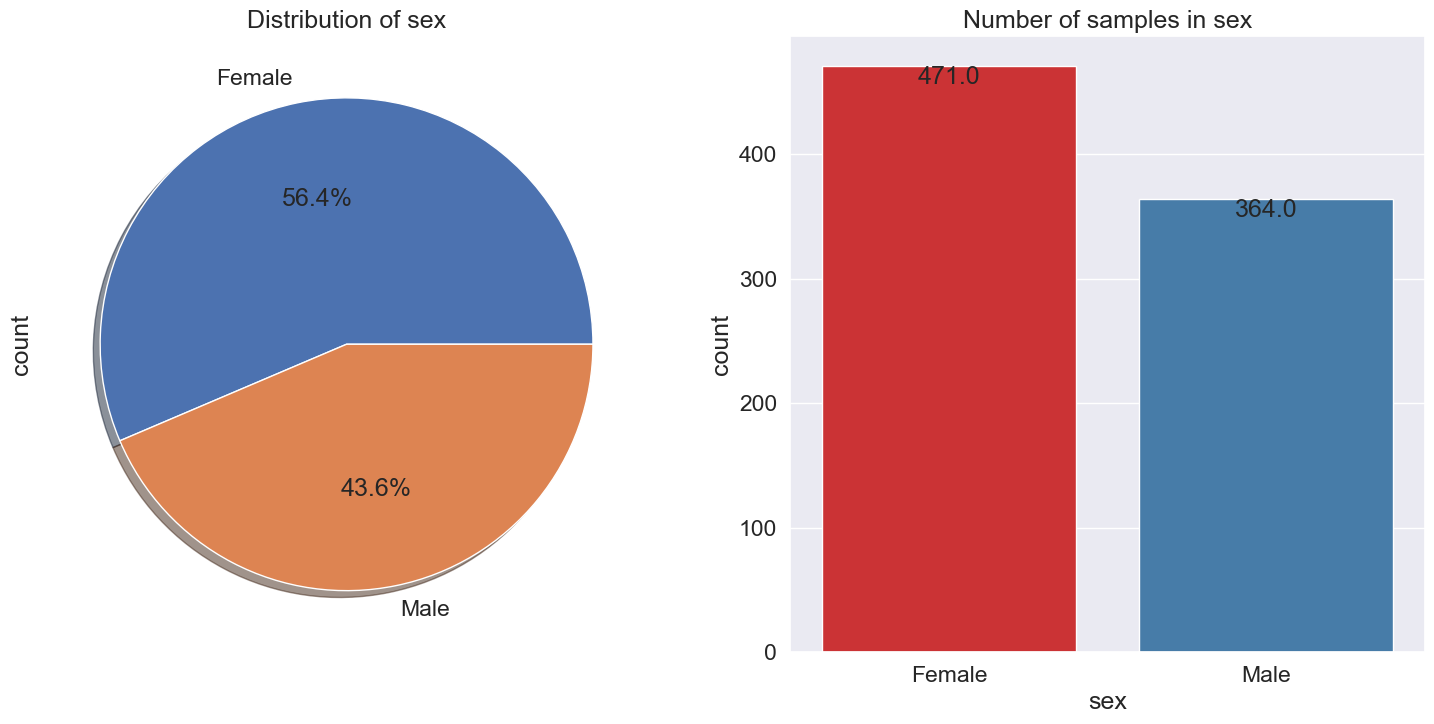

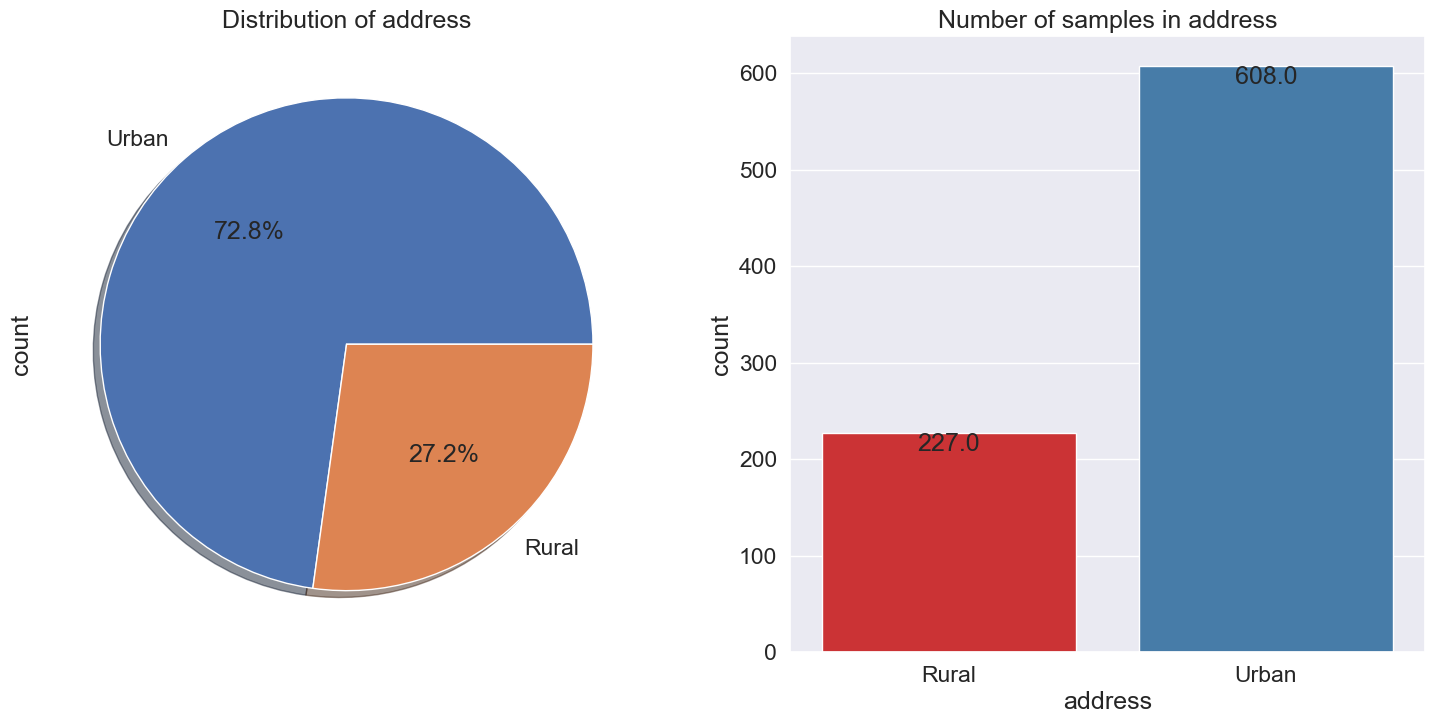

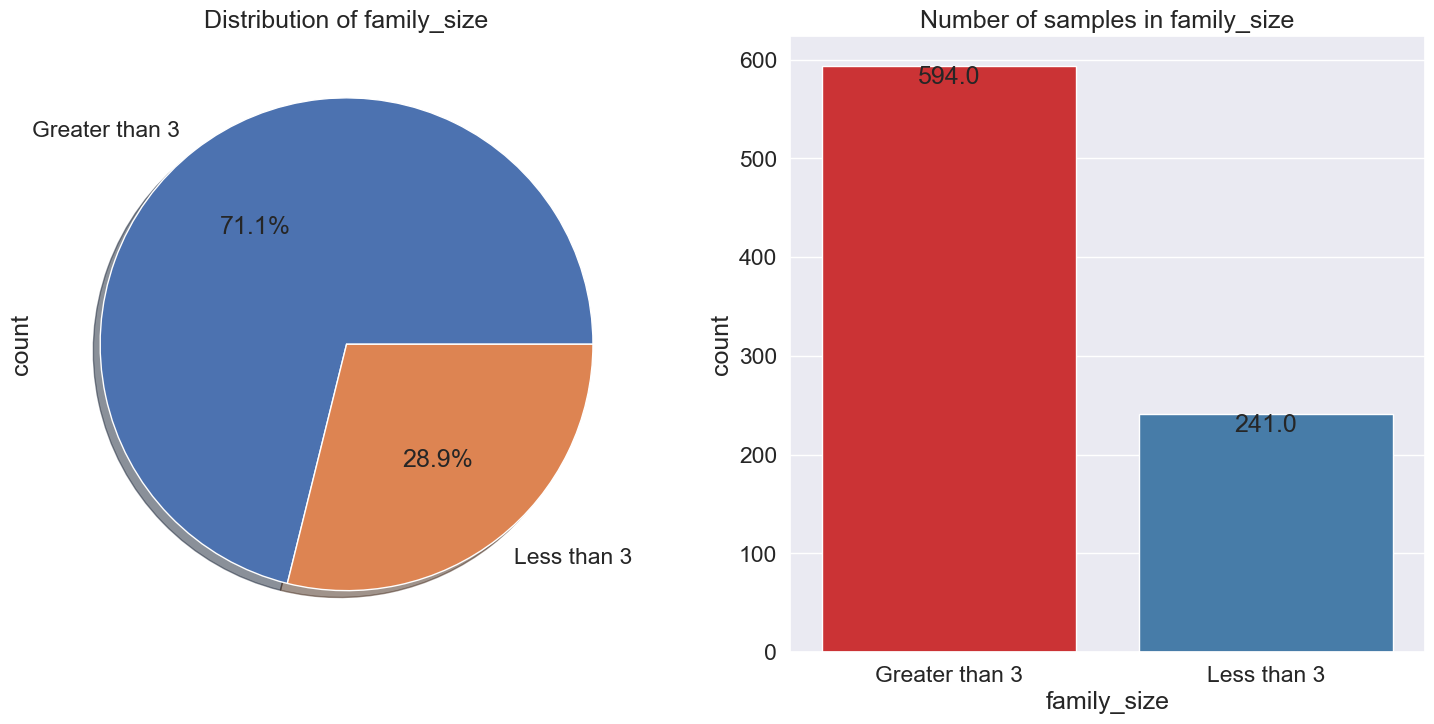

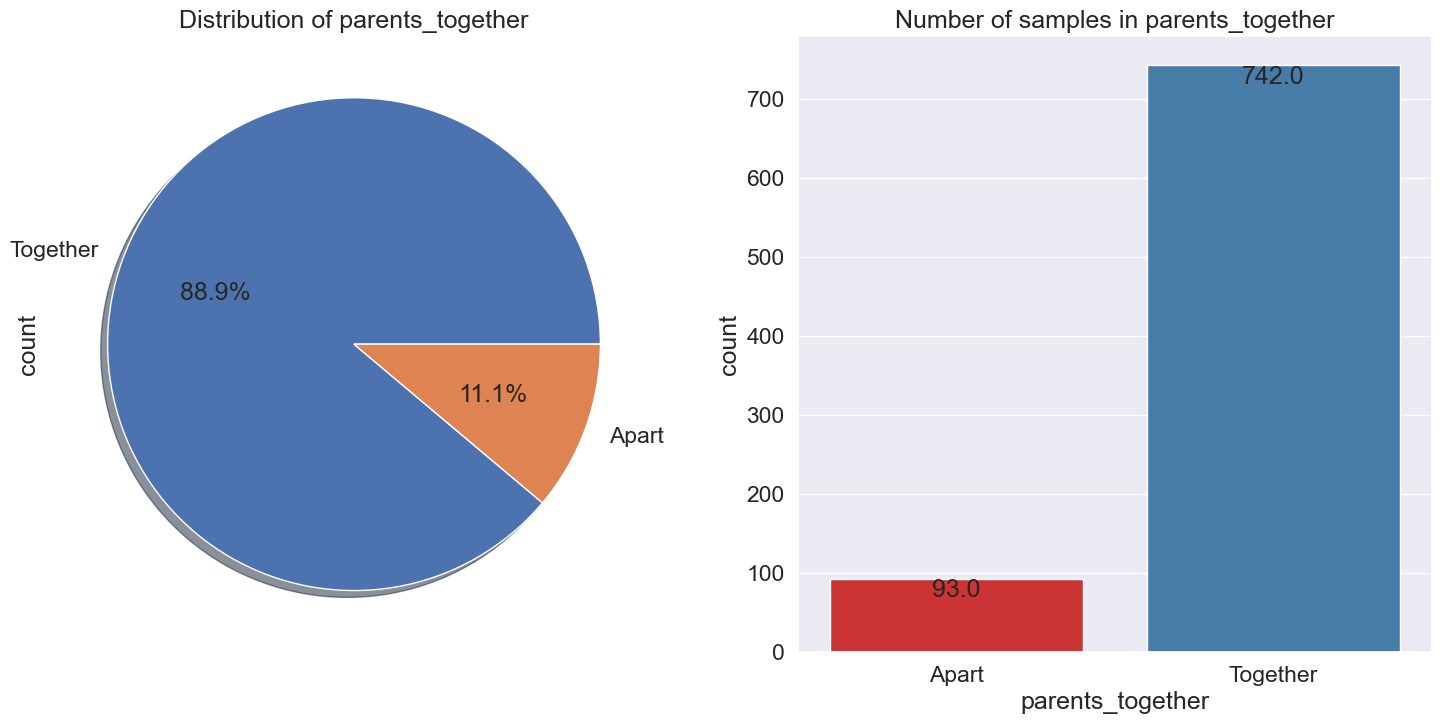

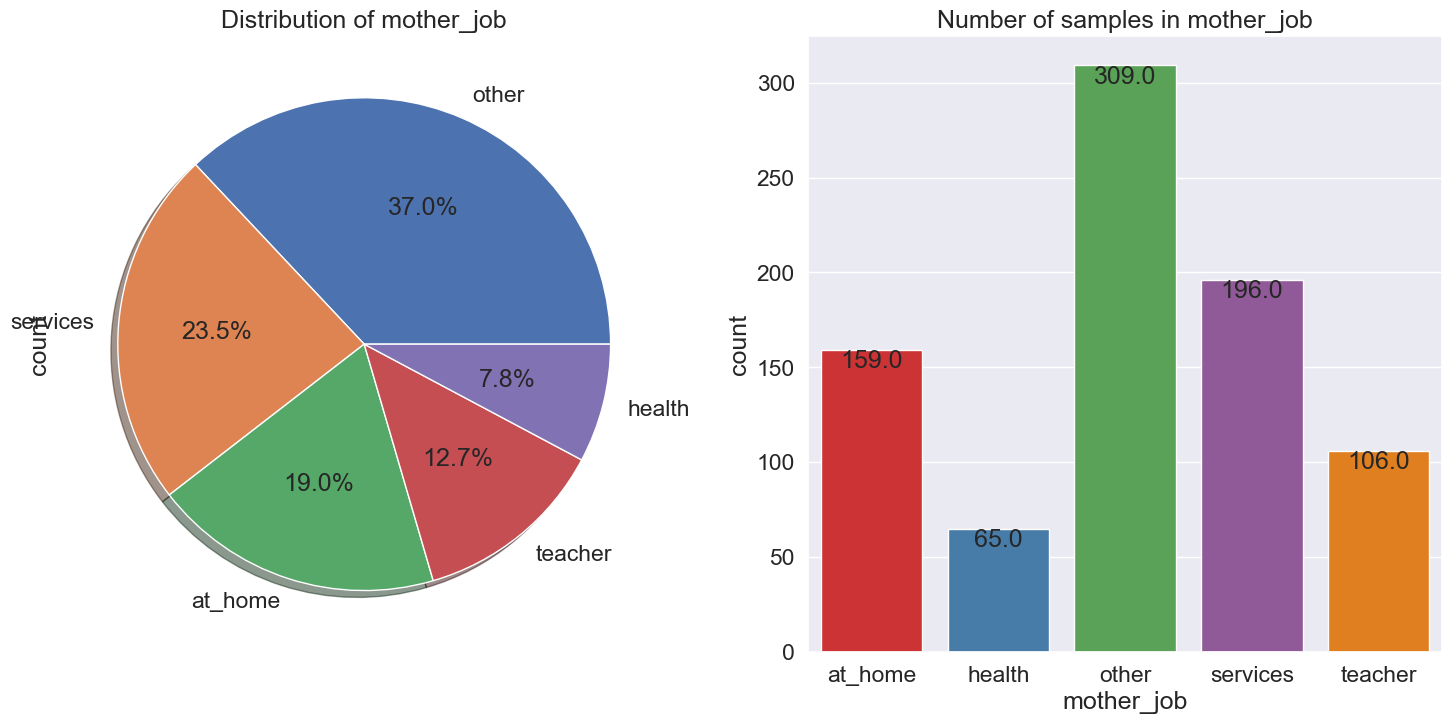

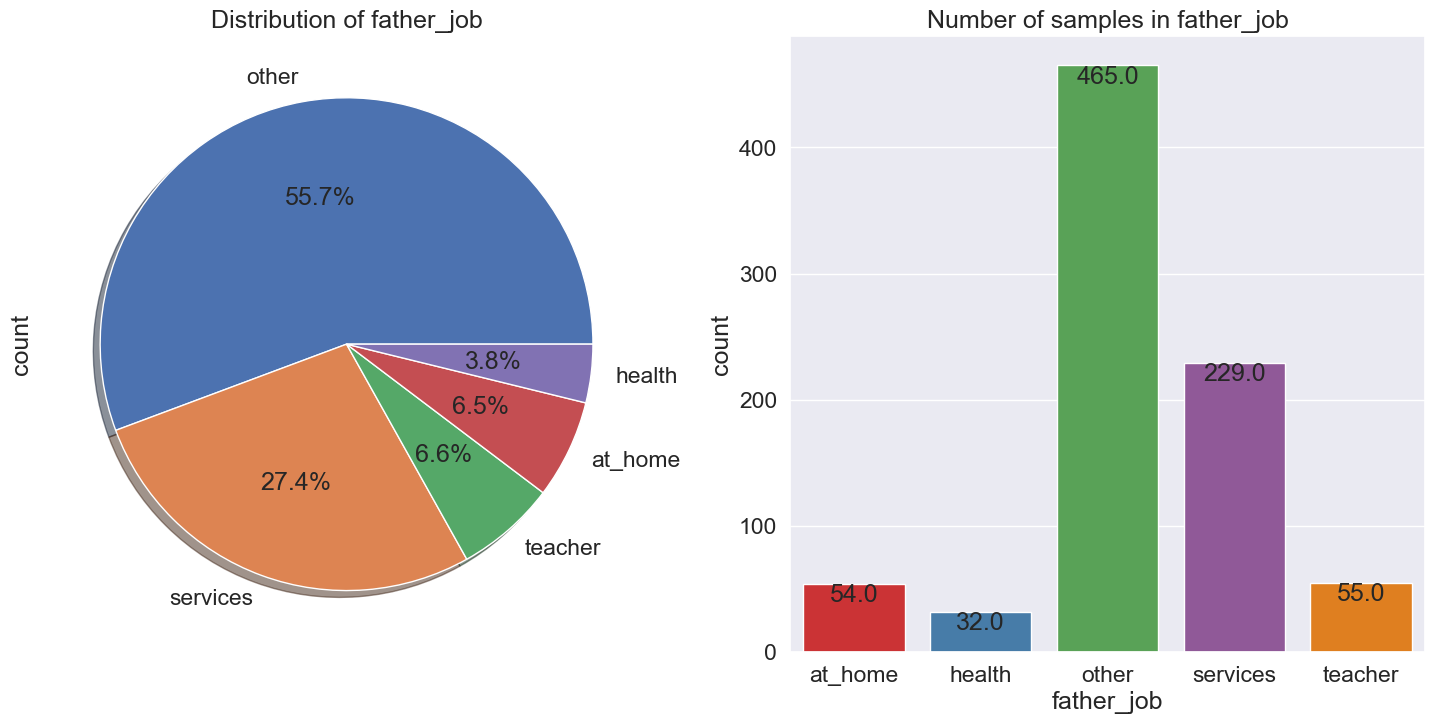

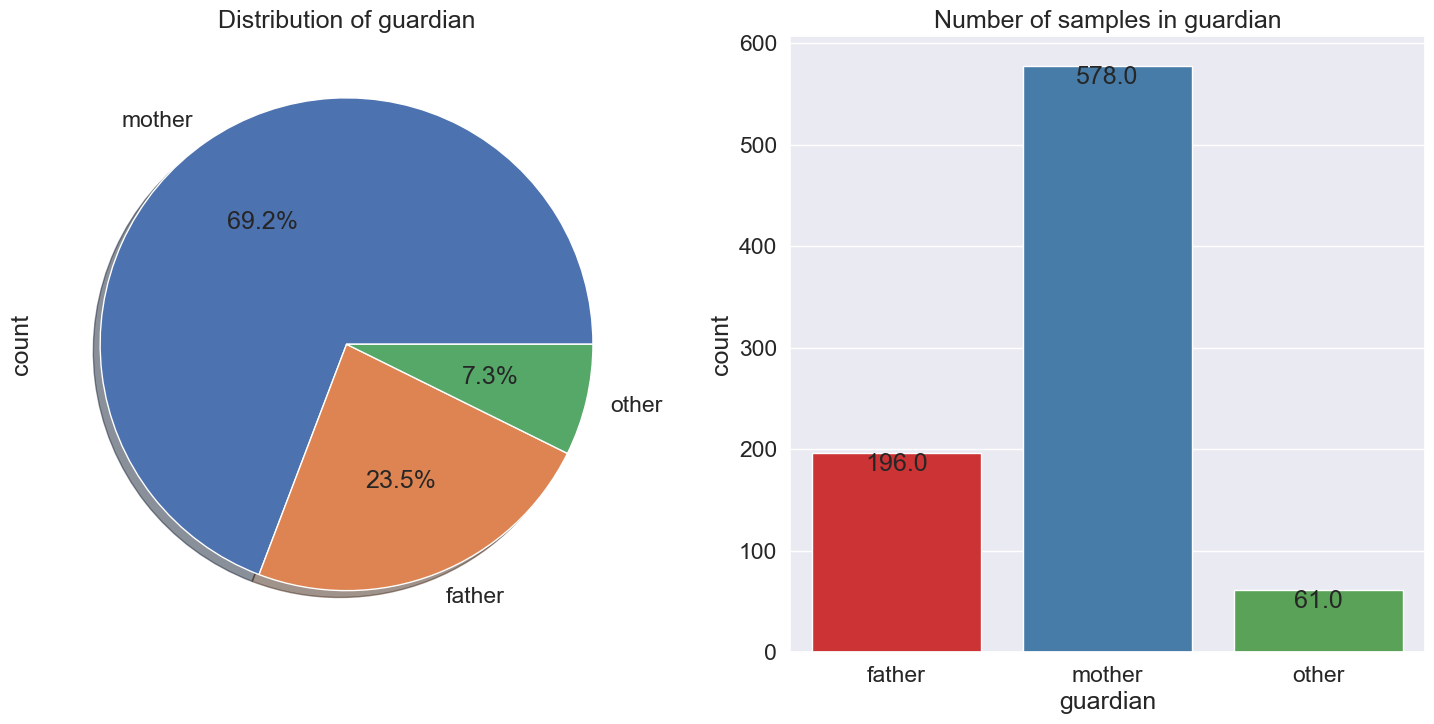

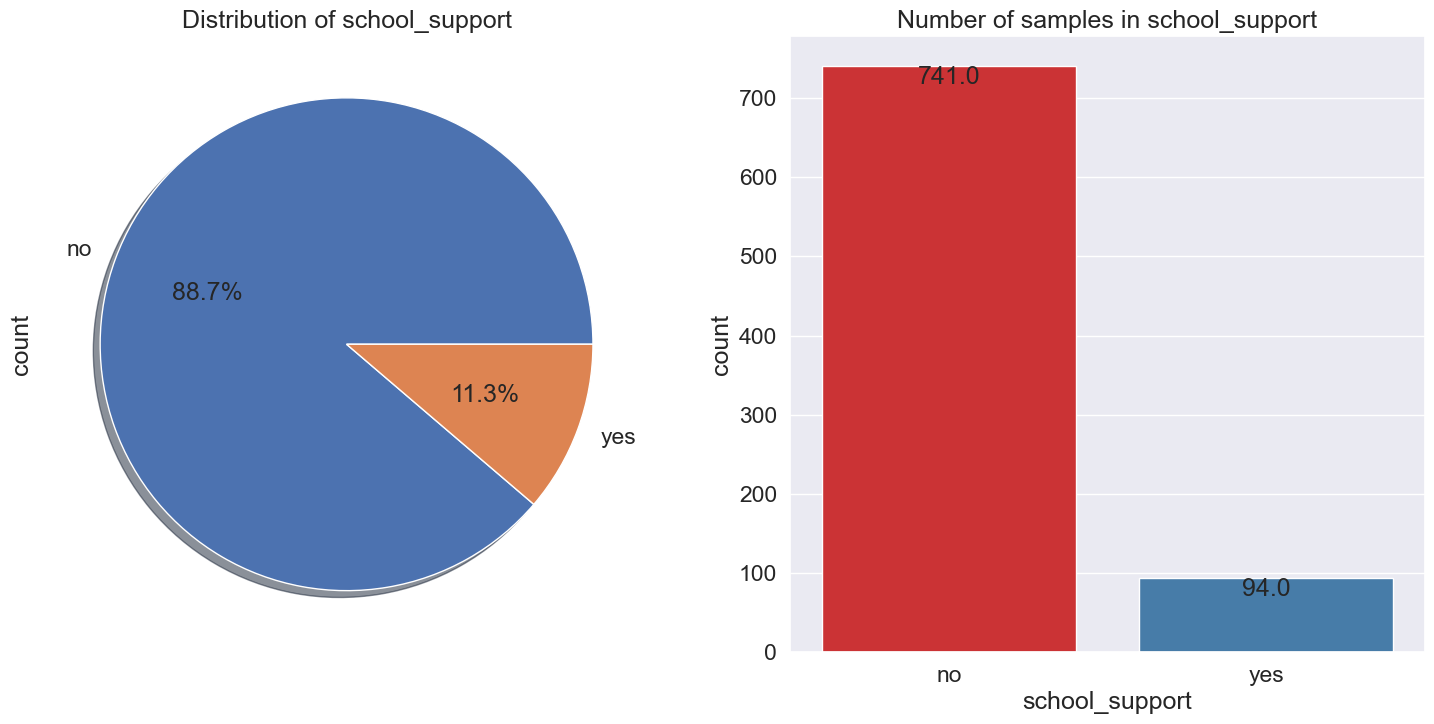

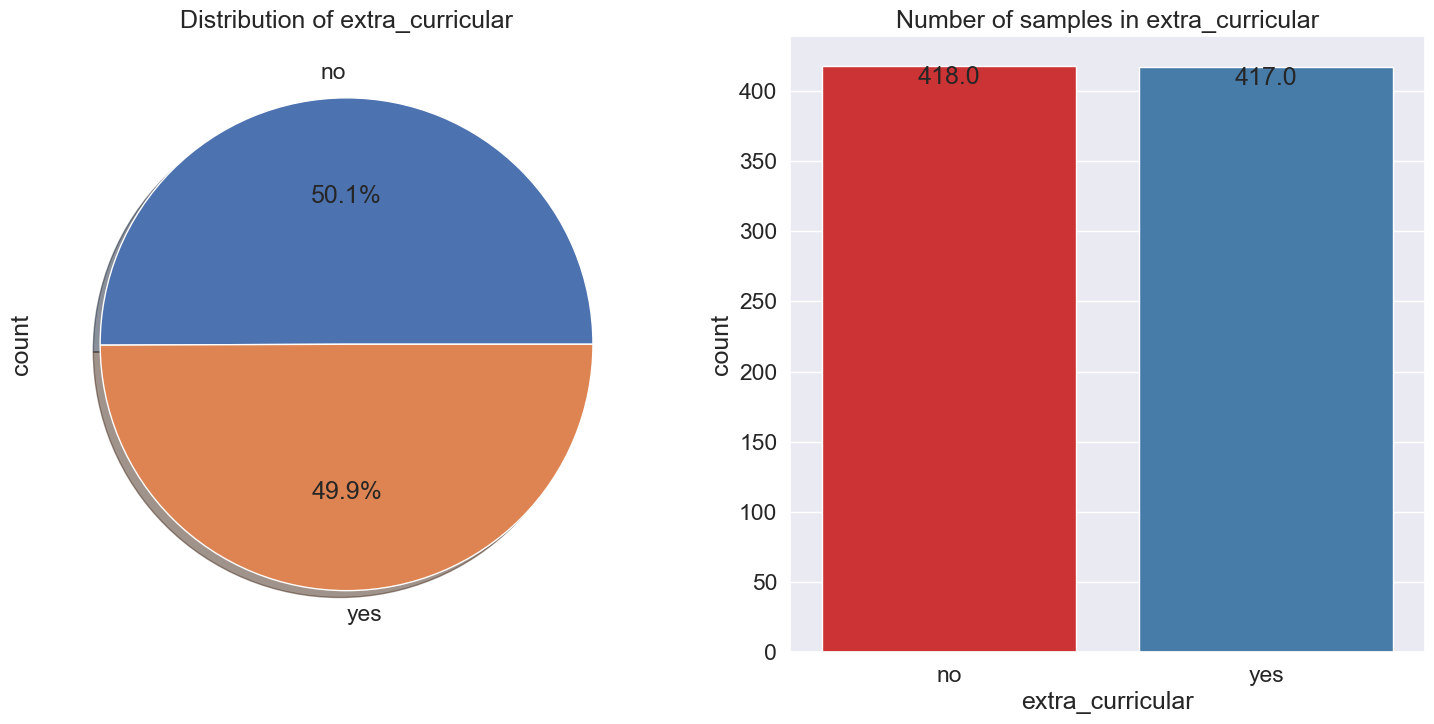

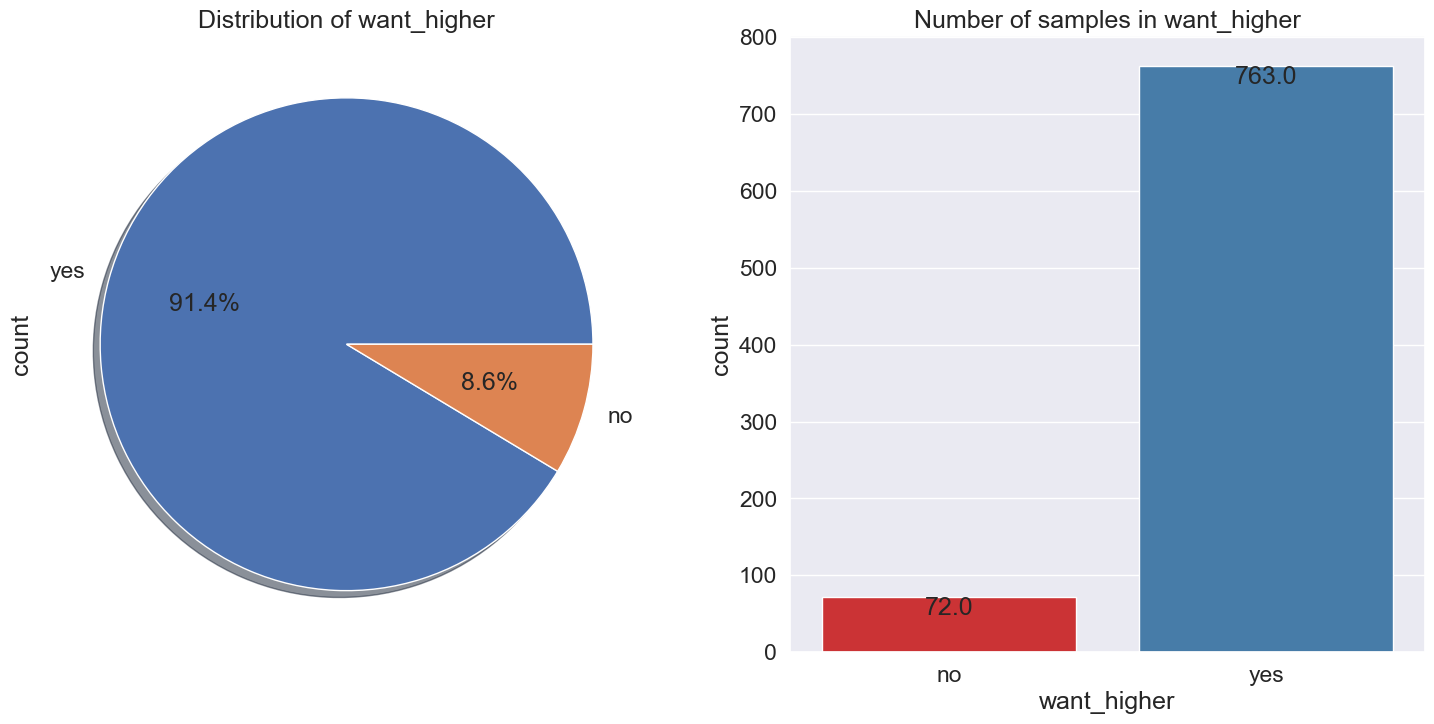

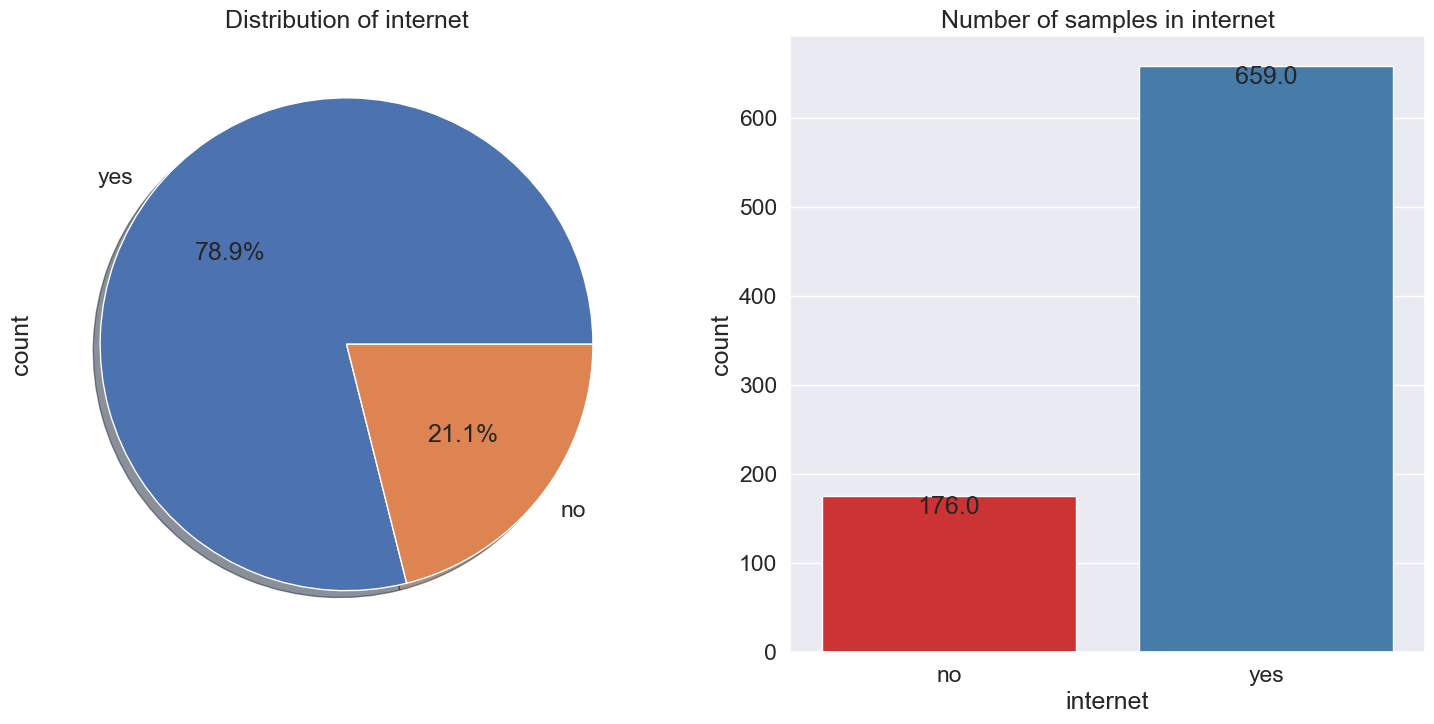

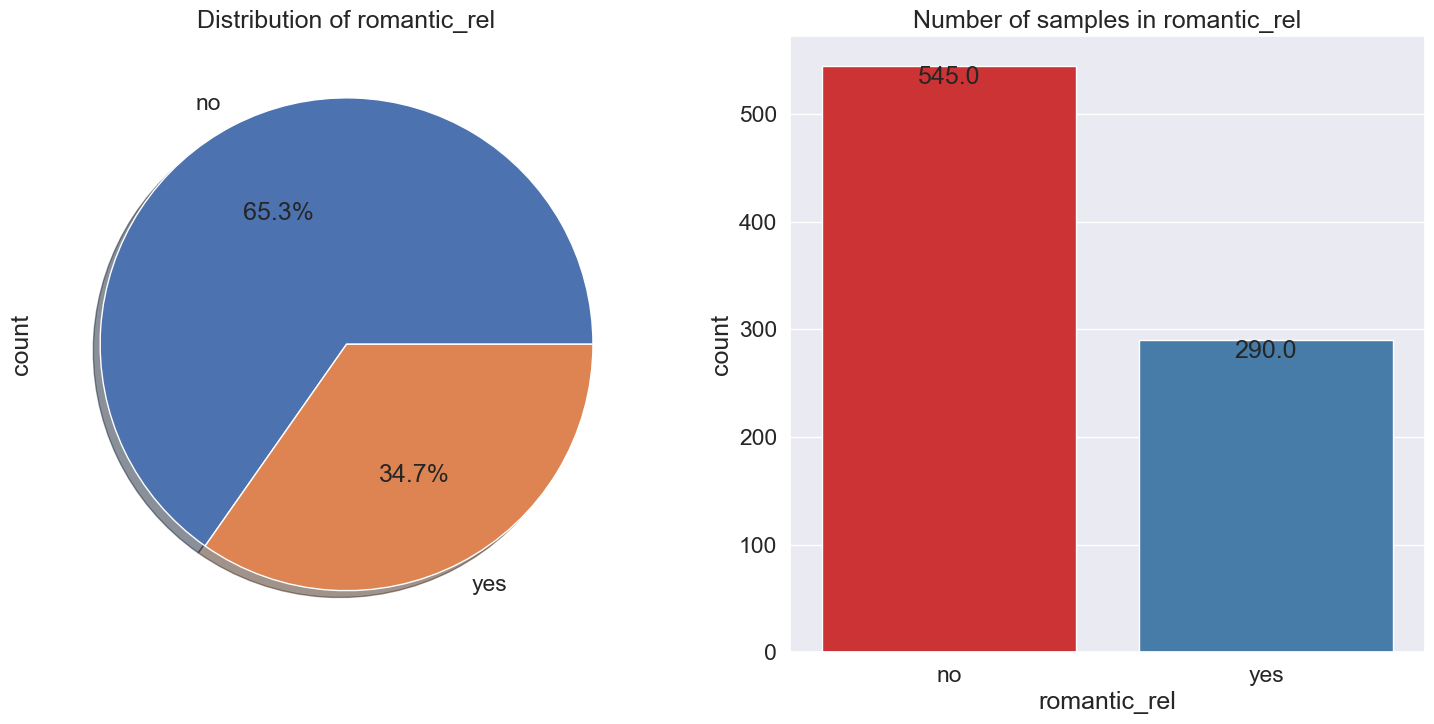

In [119]:
for feat in categorical_data:
    eda.run(feat)

### 1.2.2. Numeric data

C:\Windows\Temp\ipykernel_27408\2617676845.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.df[metric], fit=norm, ax=ax)


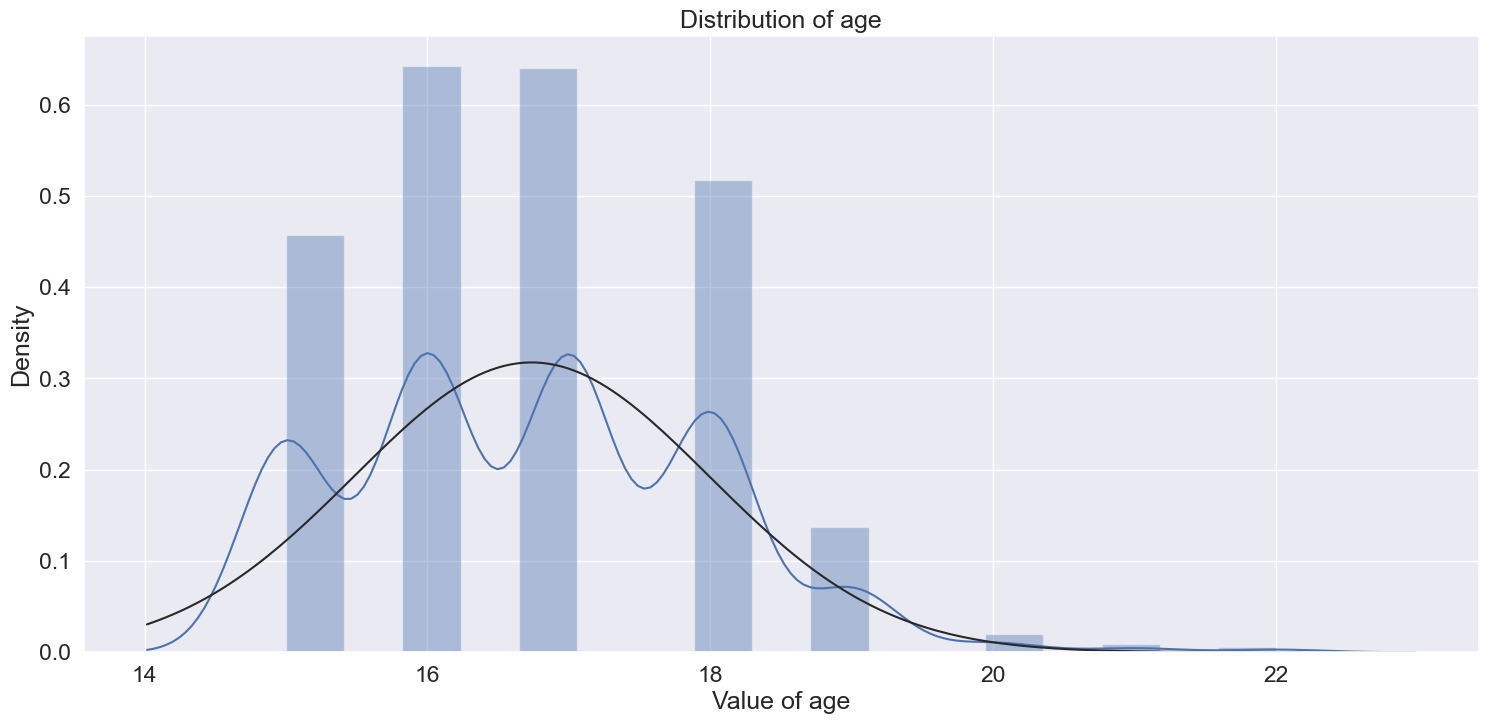

C:\Windows\Temp\ipykernel_27408\2617676845.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.df[metric], fit=norm, ax=ax)


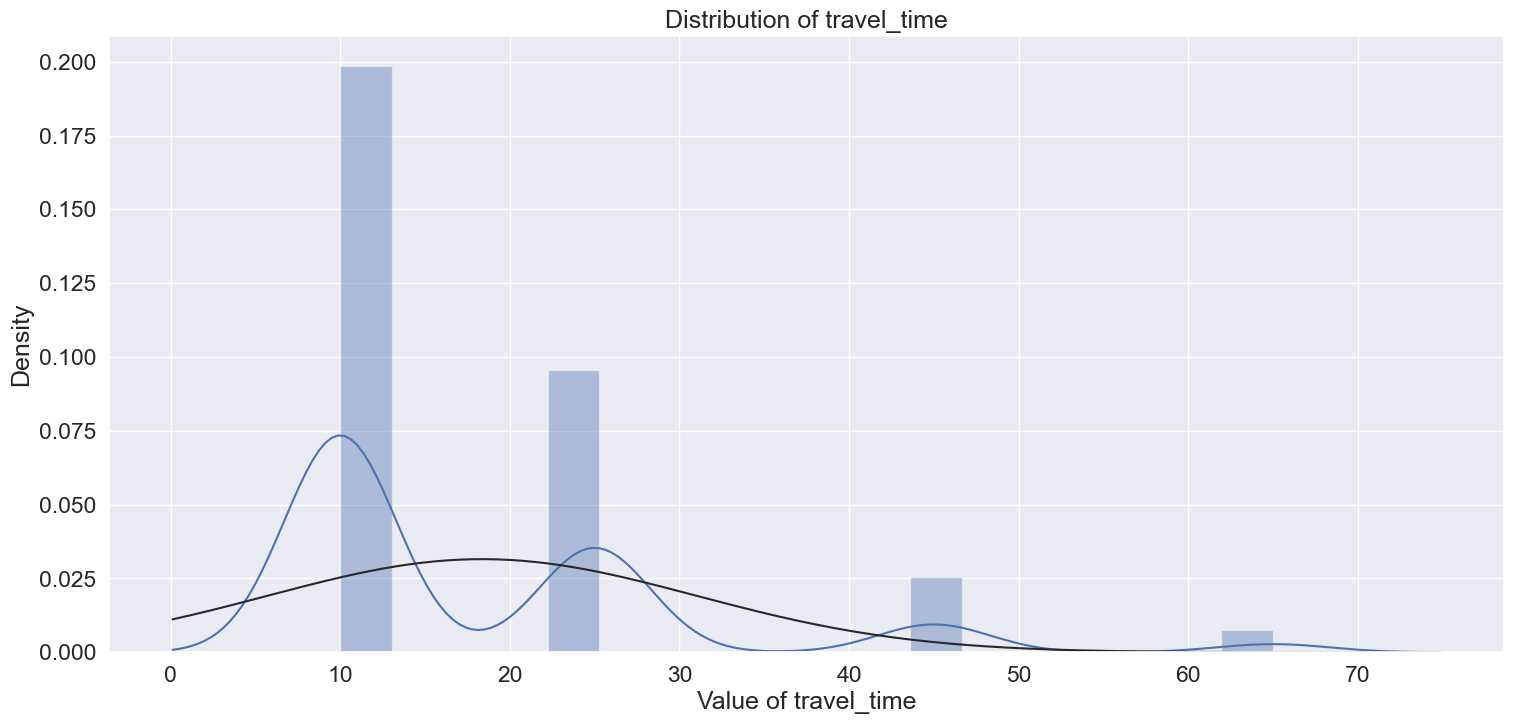

C:\Windows\Temp\ipykernel_27408\2617676845.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.df[metric], fit=norm, ax=ax)


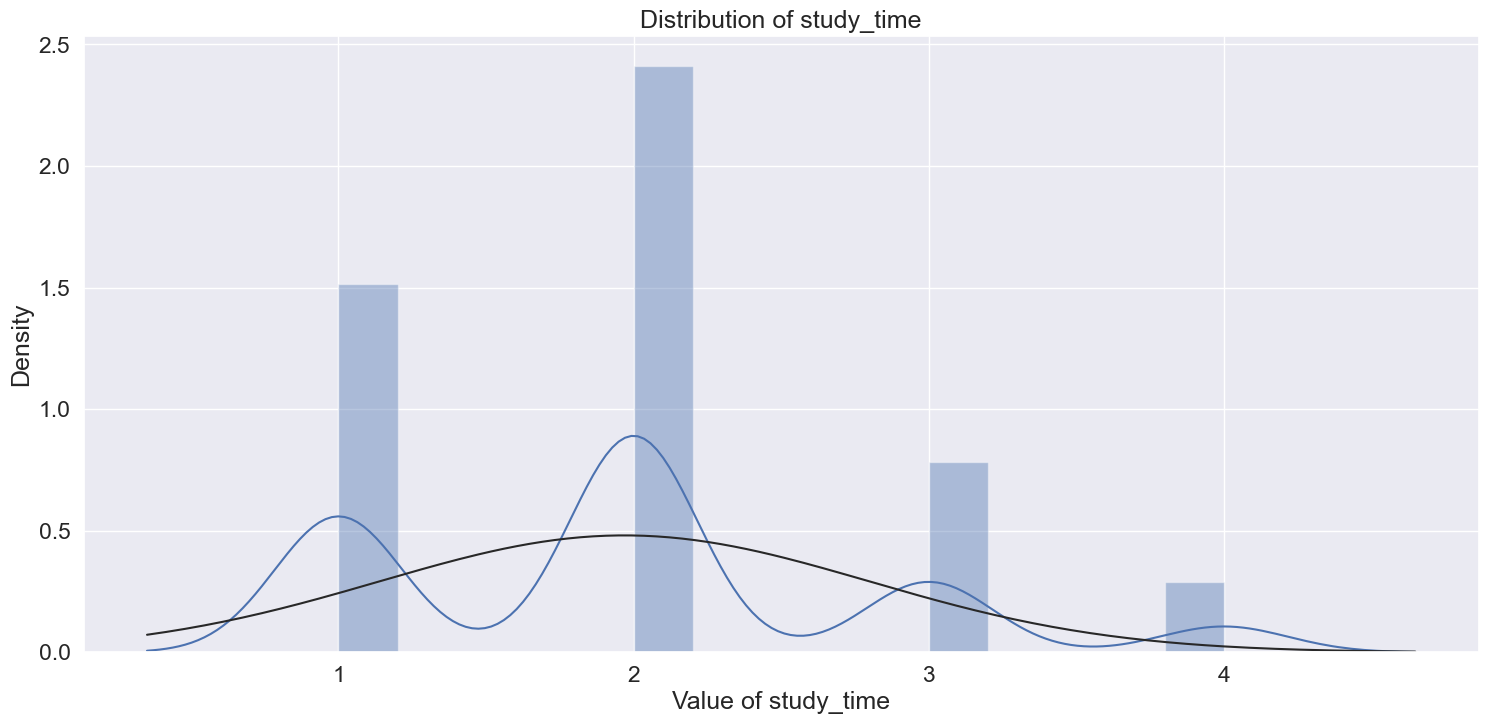

C:\Windows\Temp\ipykernel_27408\2617676845.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.df[metric], fit=norm, ax=ax)


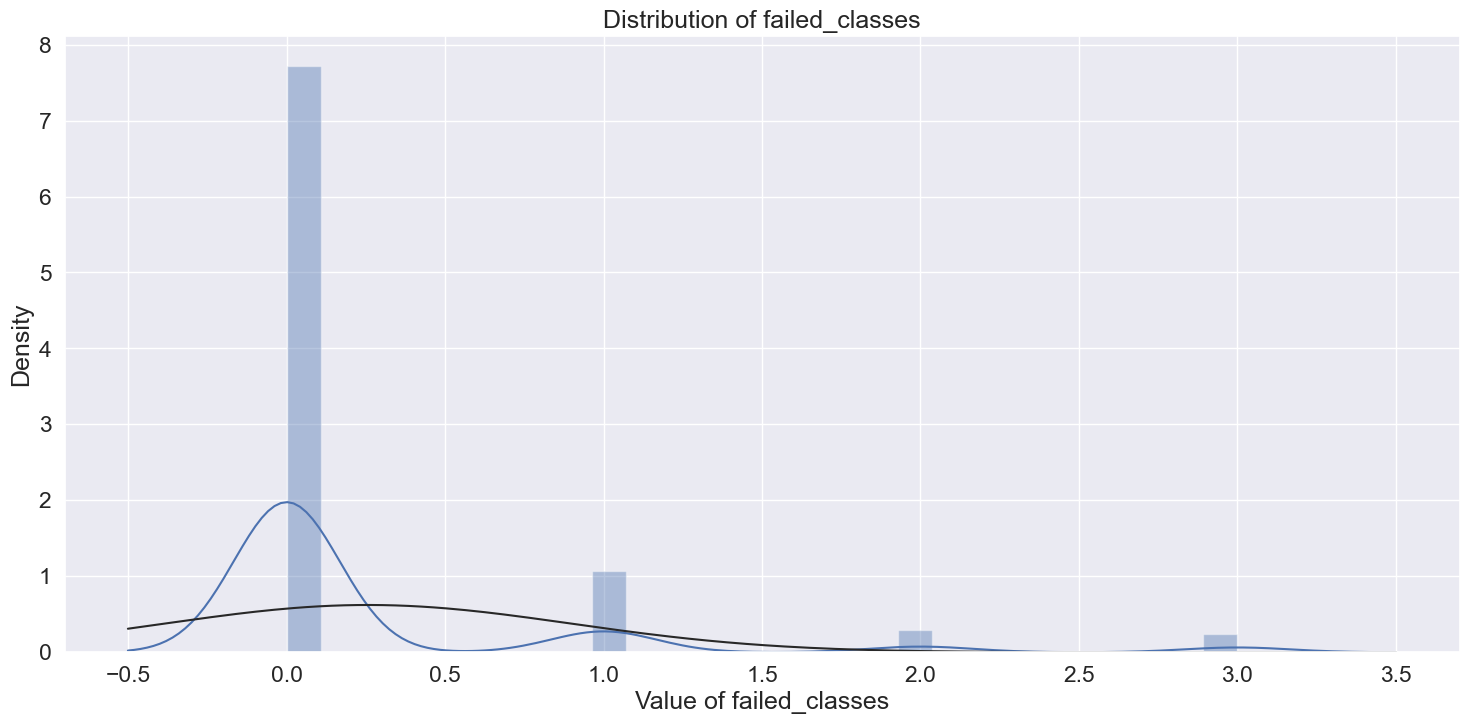

C:\Windows\Temp\ipykernel_27408\2617676845.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.df[metric], fit=norm, ax=ax)


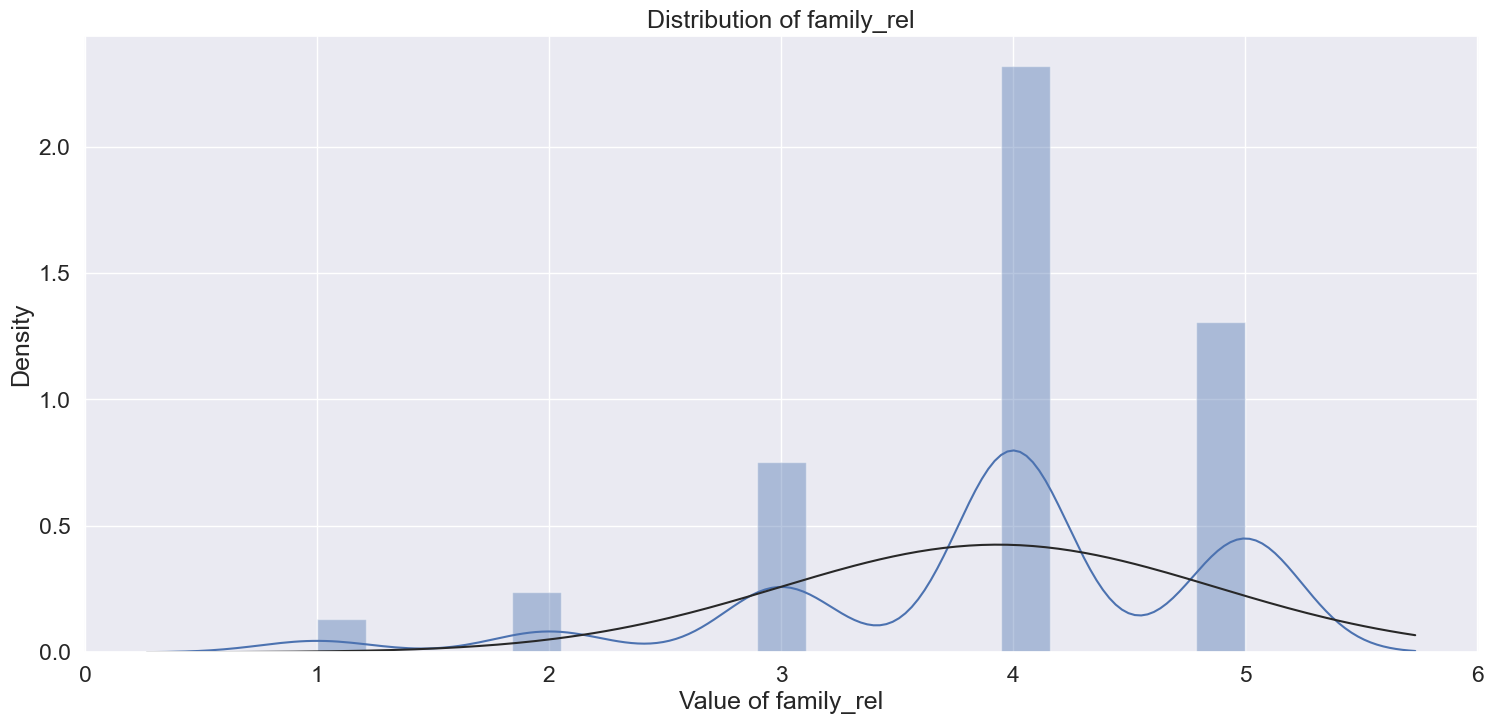

C:\Windows\Temp\ipykernel_27408\2617676845.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.df[metric], fit=norm, ax=ax)


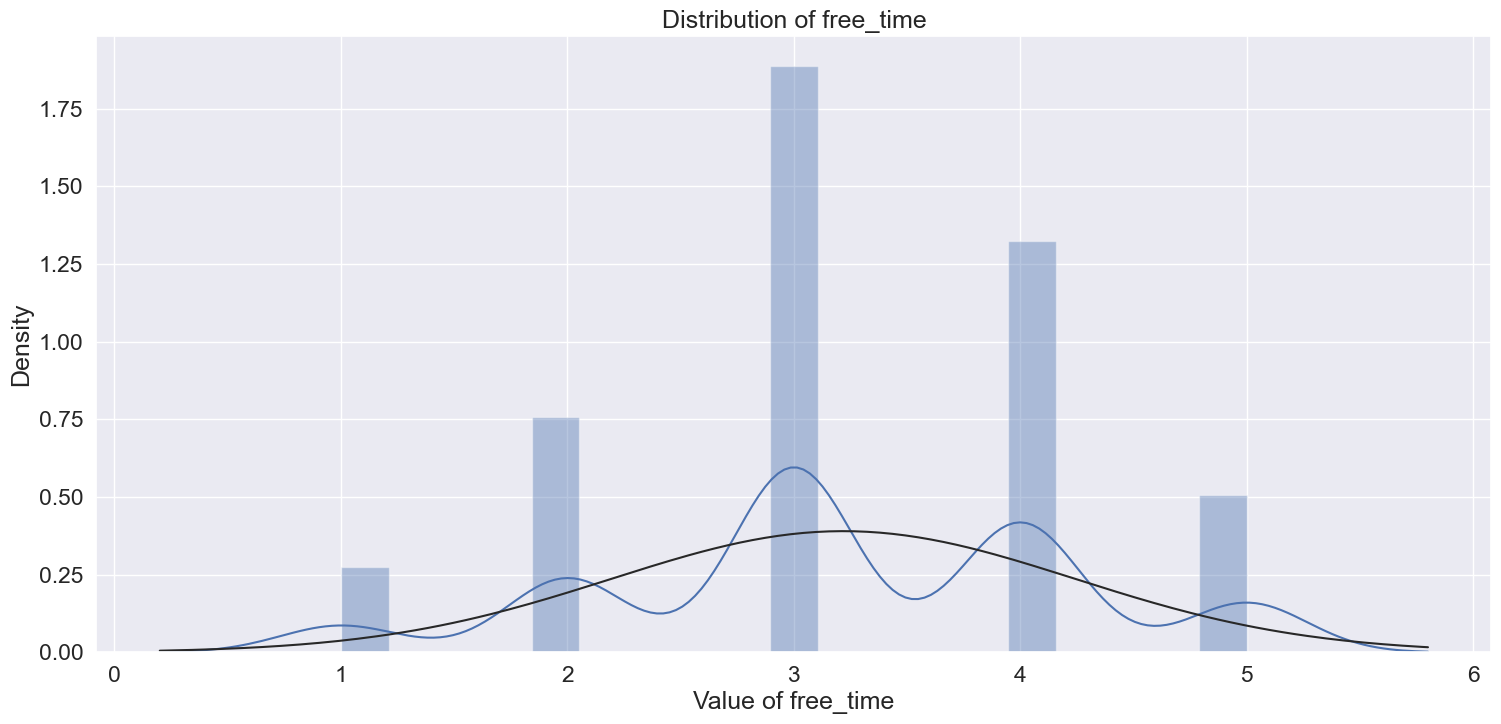

C:\Windows\Temp\ipykernel_27408\2617676845.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.df[metric], fit=norm, ax=ax)


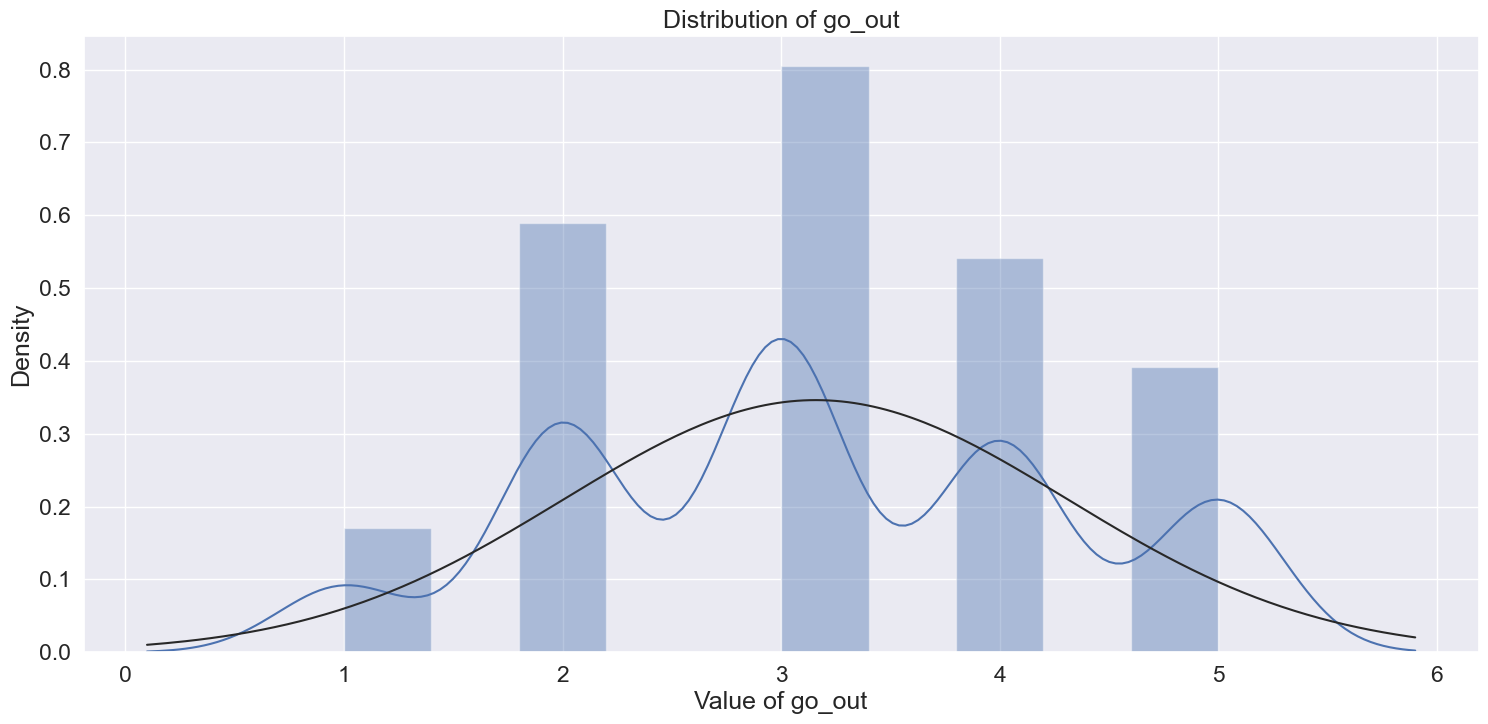

C:\Windows\Temp\ipykernel_27408\2617676845.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.df[metric], fit=norm, ax=ax)


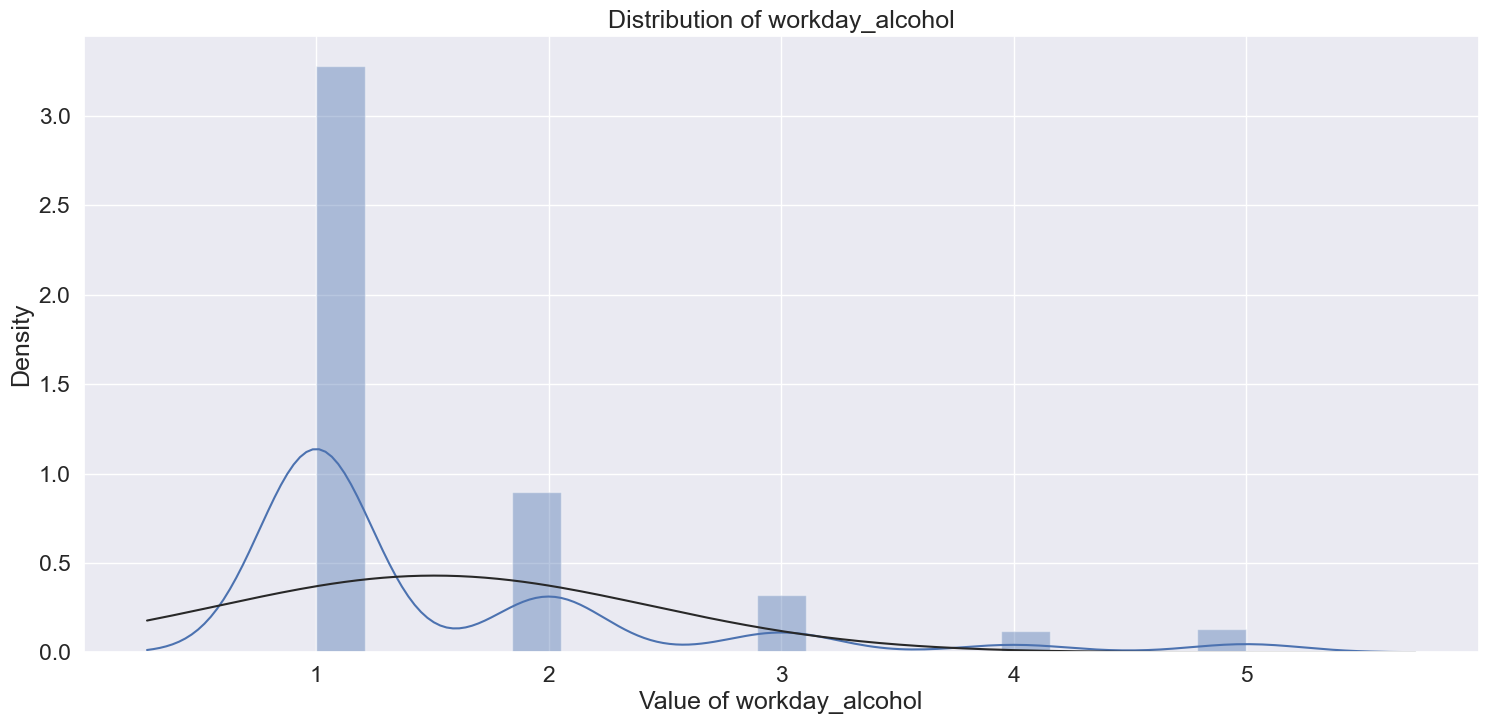

C:\Windows\Temp\ipykernel_27408\2617676845.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.df[metric], fit=norm, ax=ax)


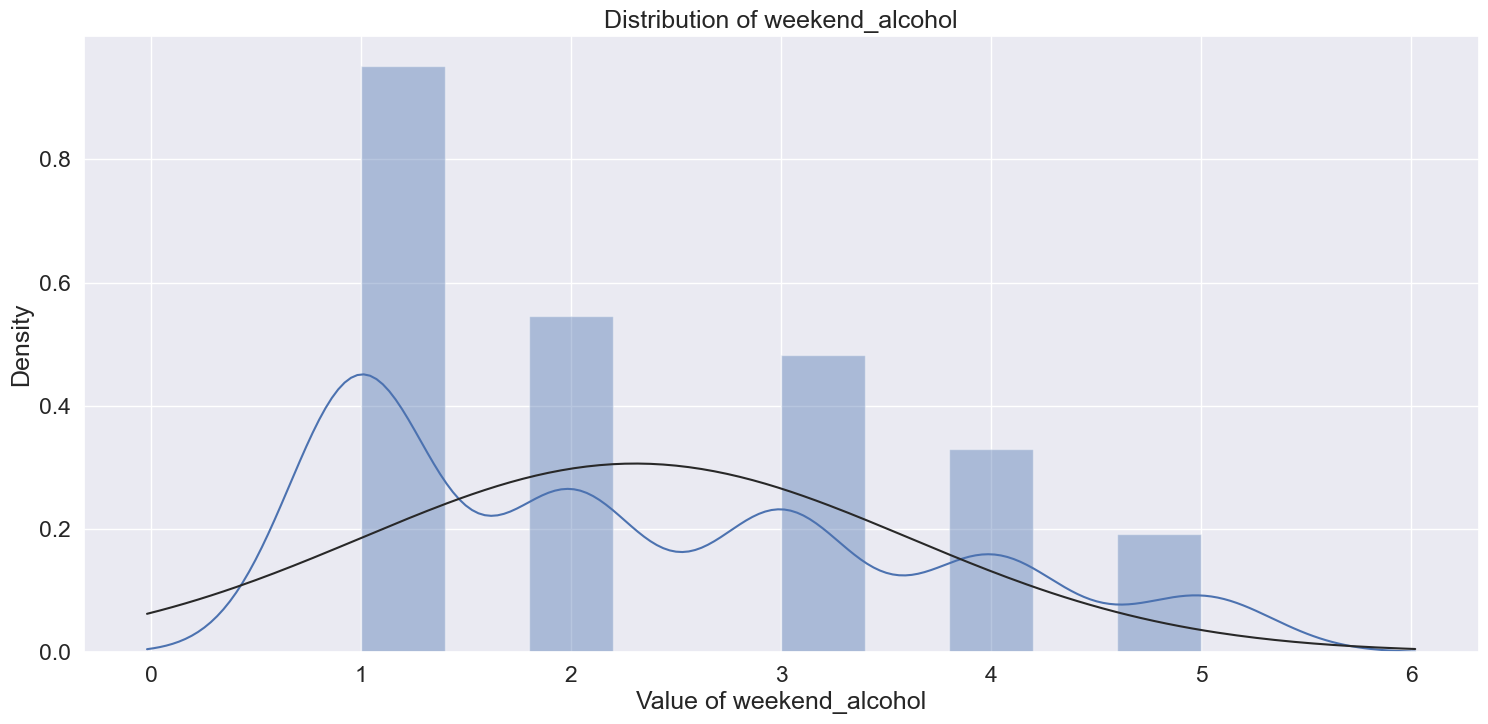

C:\Windows\Temp\ipykernel_27408\2617676845.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.df[metric], fit=norm, ax=ax)


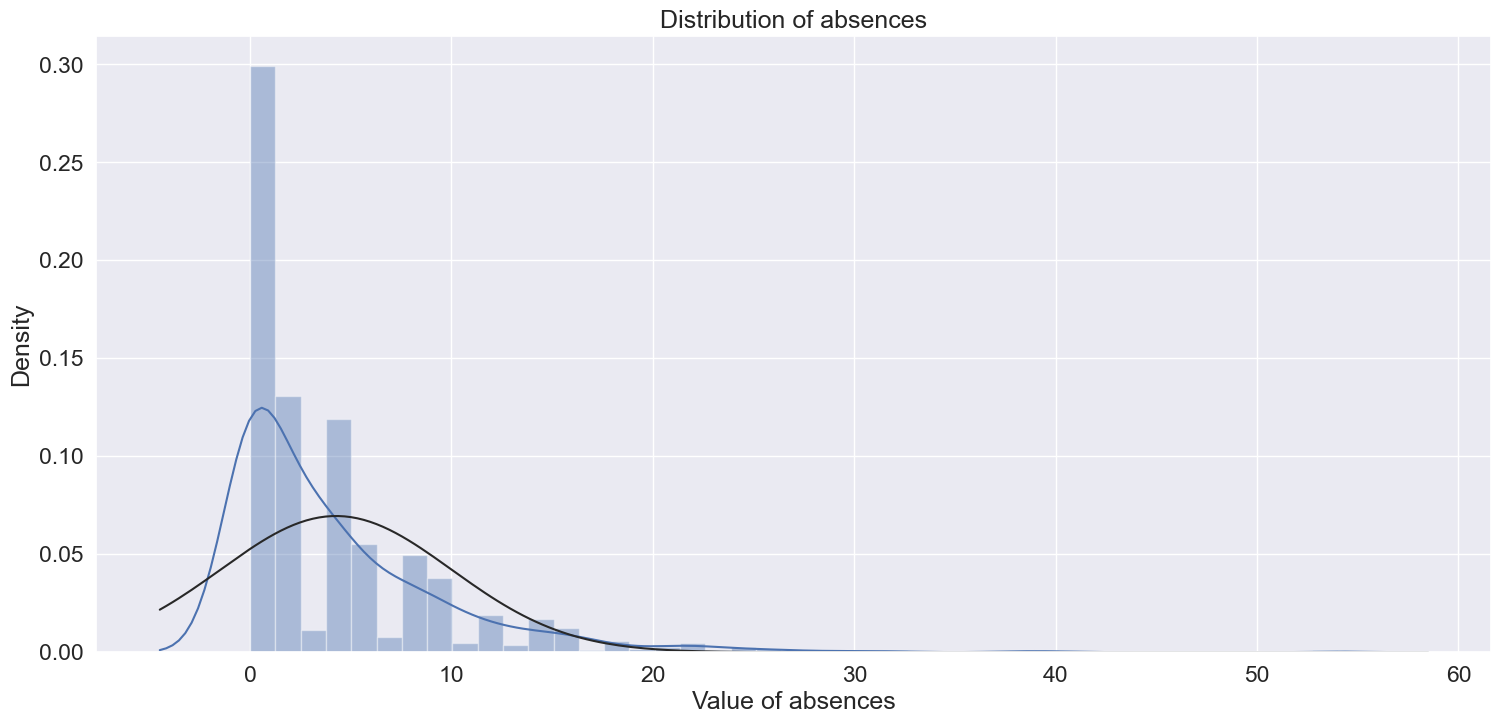

In [120]:
for feat in numeric_data:
    eda.run(feat)

### 1.2.3 Distribution

In [121]:
def plot_distribution(dataset, feature):
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

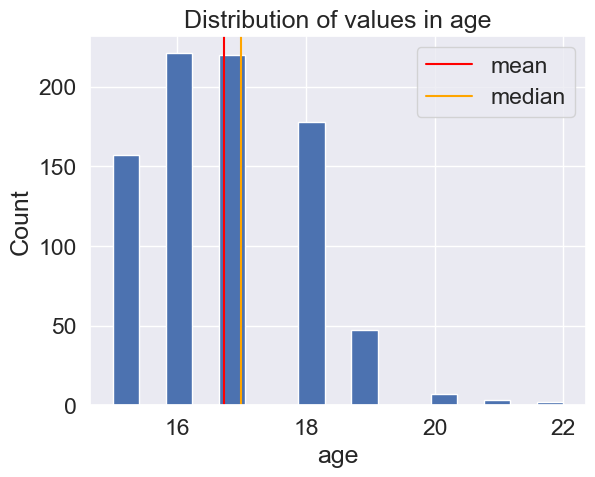

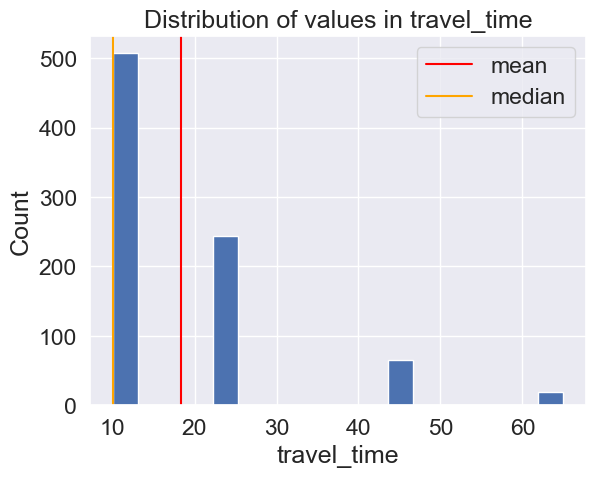

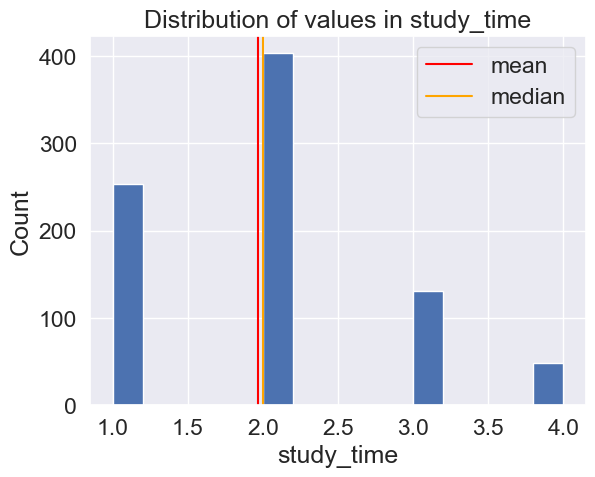

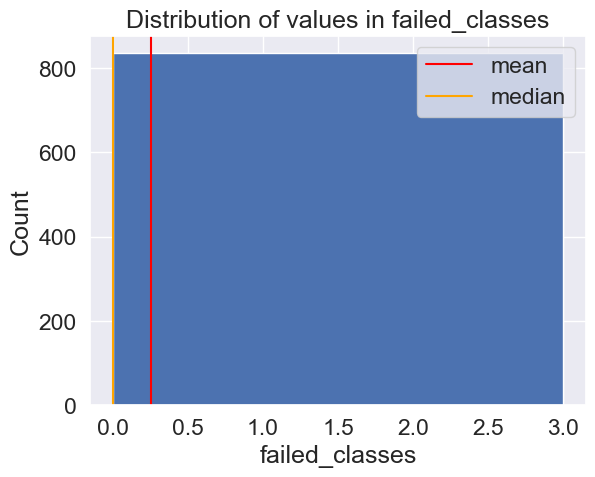

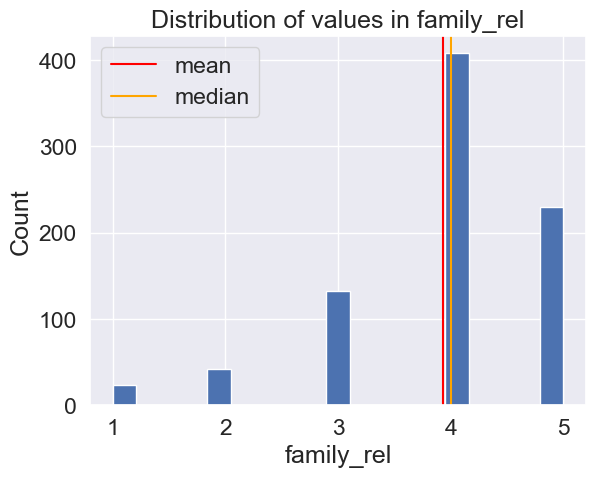

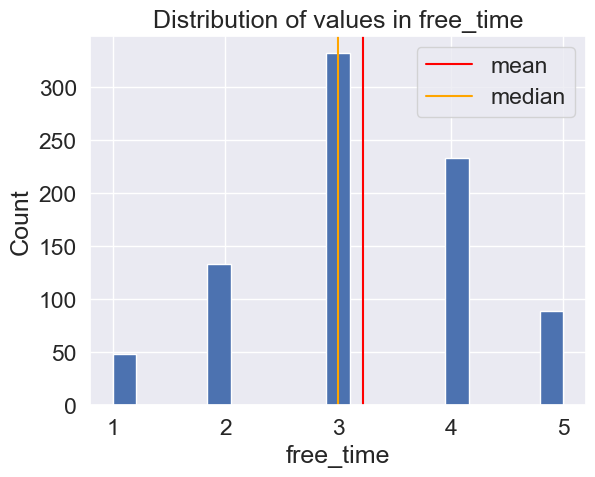

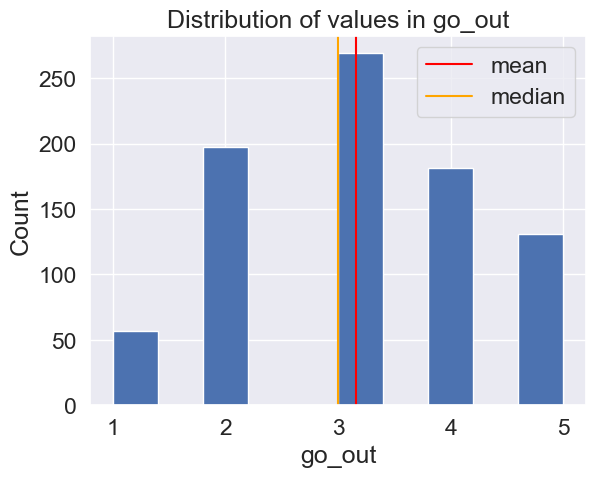

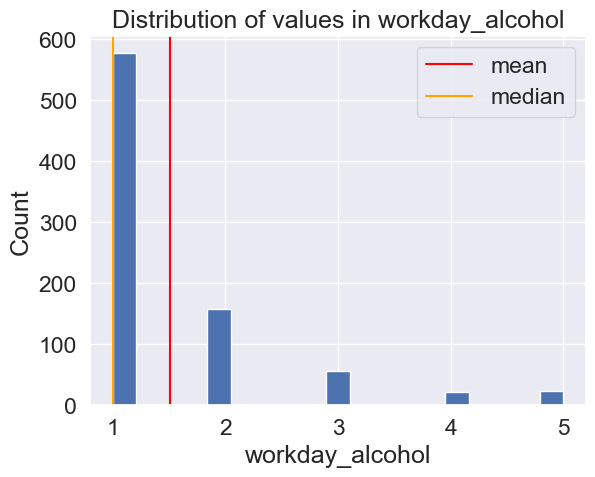

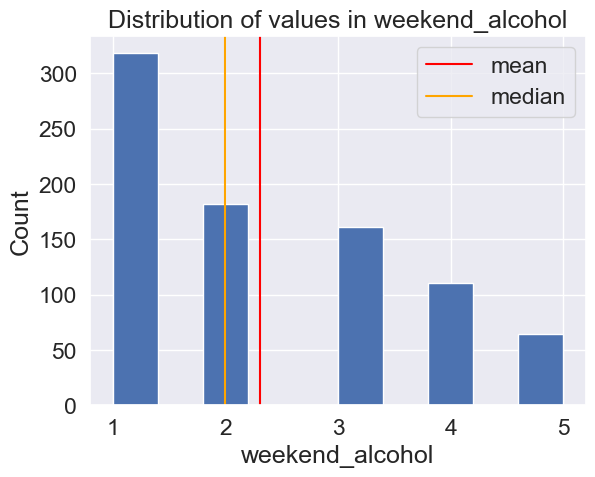

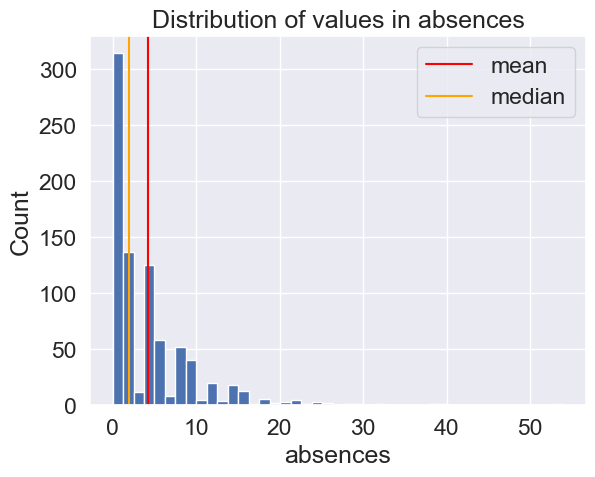

In [122]:
for feat in numeric_data:
    plot_distribution(df, feat)

### 1.2.4 Correlation with Grade metric

In [123]:
def get_relation(dataframe, metric_target, metric_compare, order = None):
    plt.figure(figsize = (20, 8))
    sns.countplot(x=metric_target, 
                  hue=metric_compare, 
                  data=dataframe,
                  order=order,
                  palette = "Set1")
    plt.title(f"Relation between {metric_target} and {metric_compare}")
    plt.show()

#### 1.2.4.1 Grade metrics vs. Category data

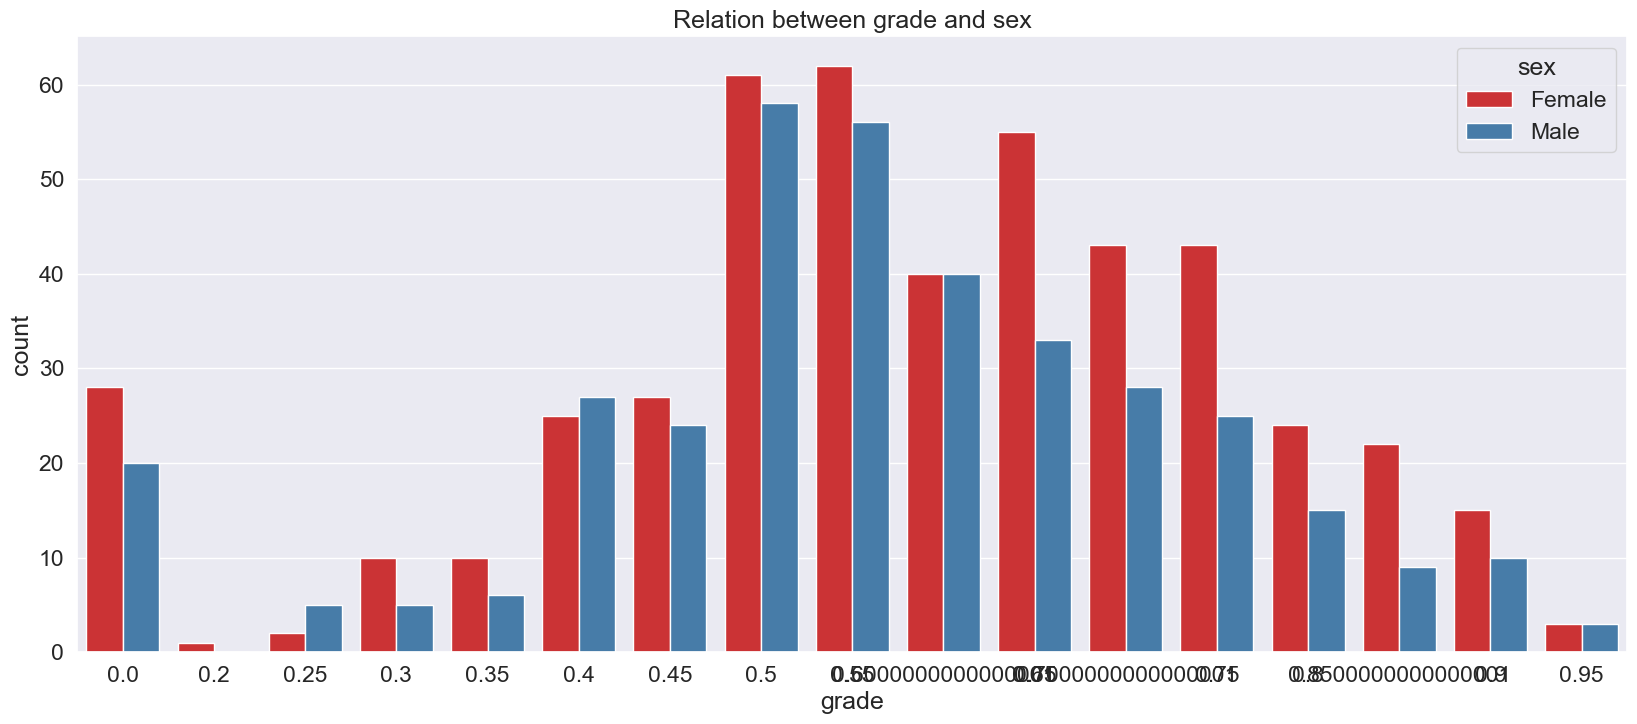

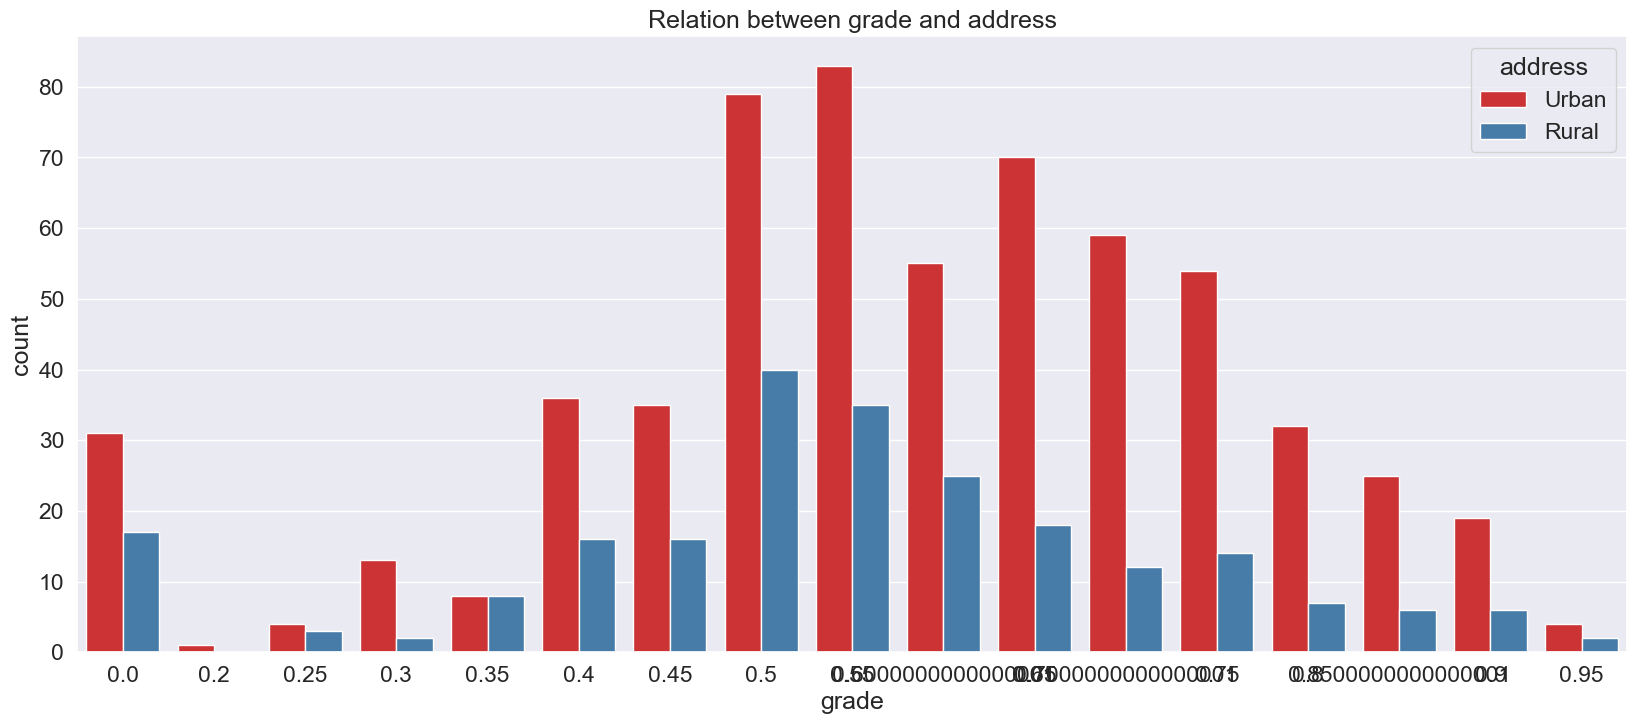

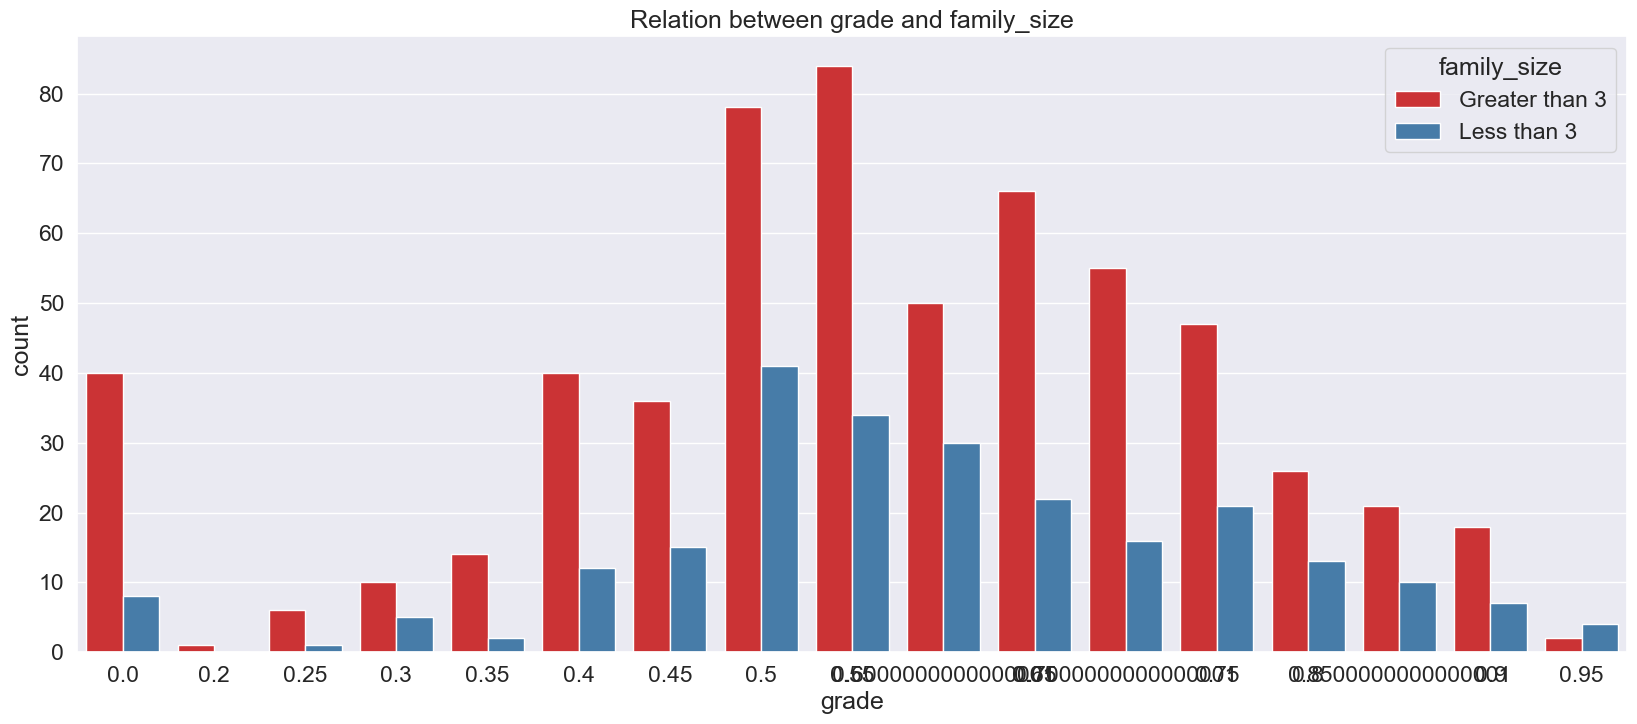

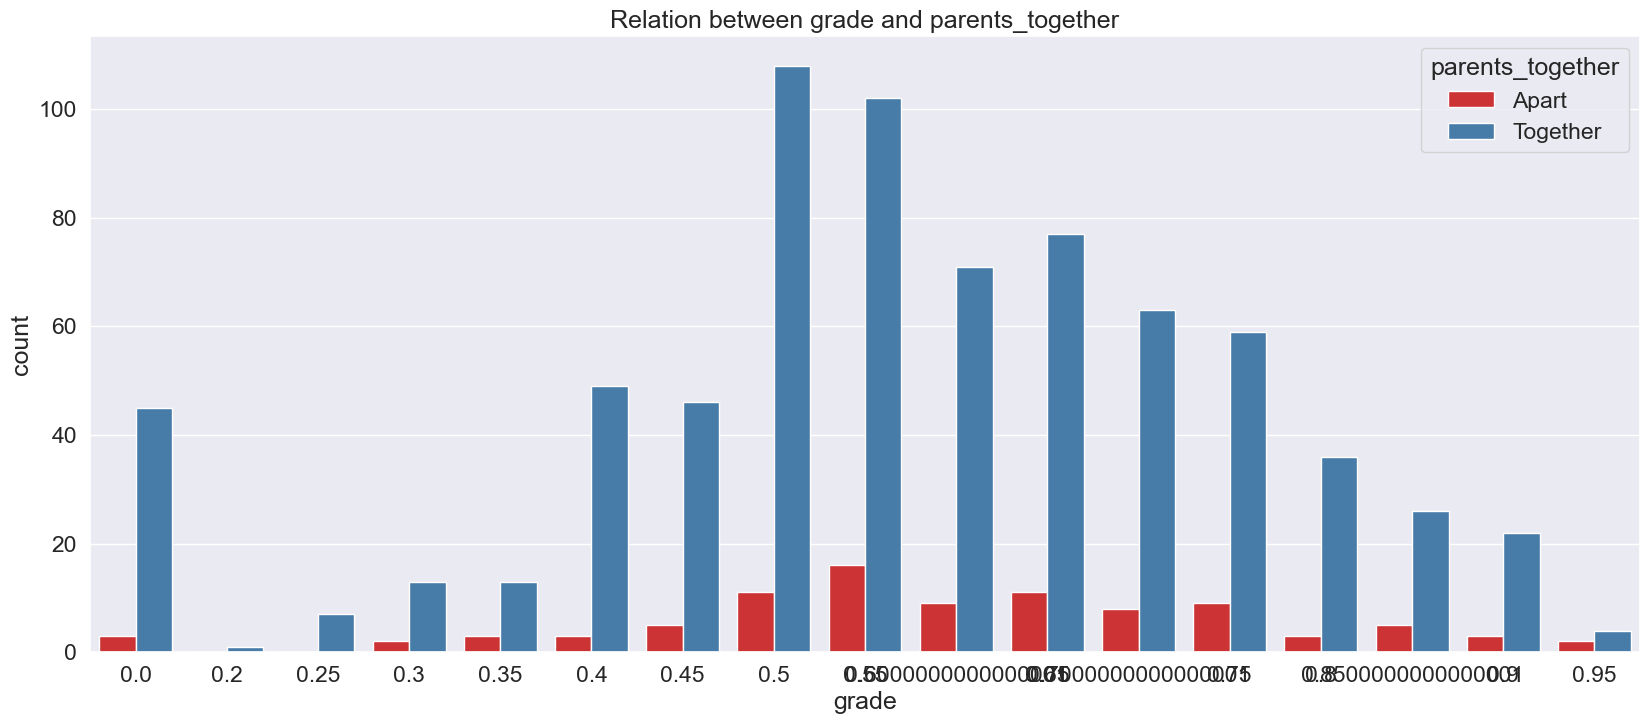

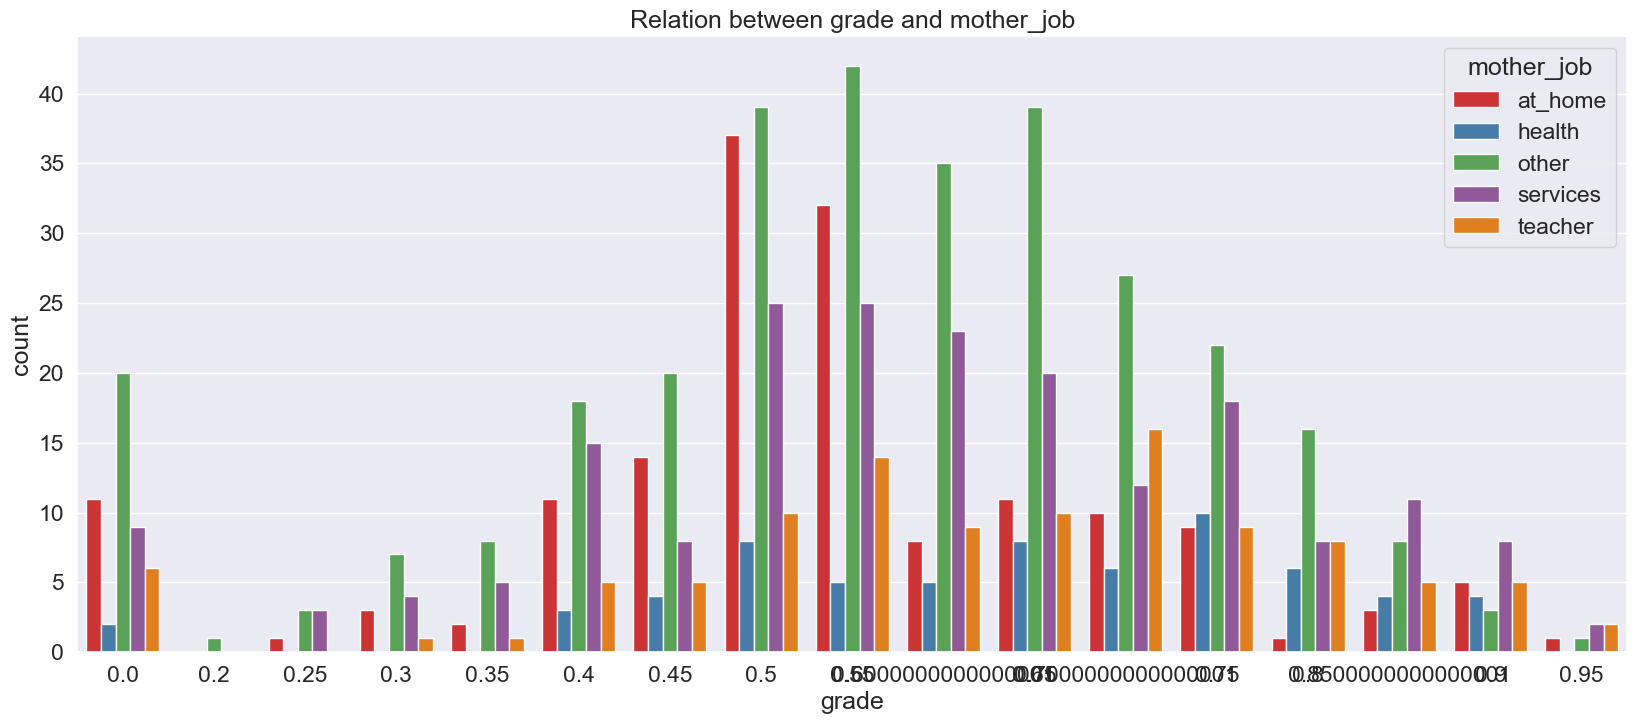

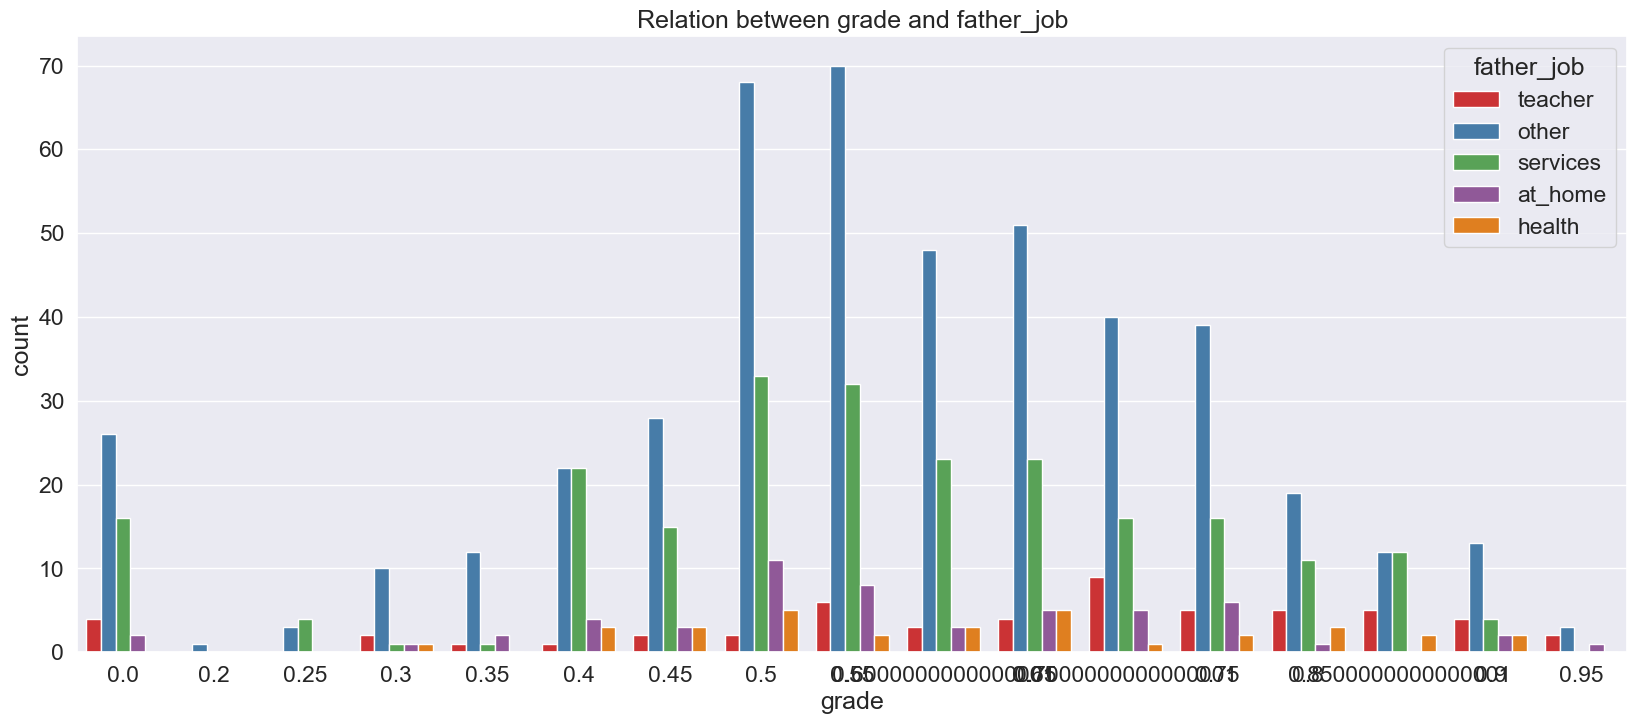

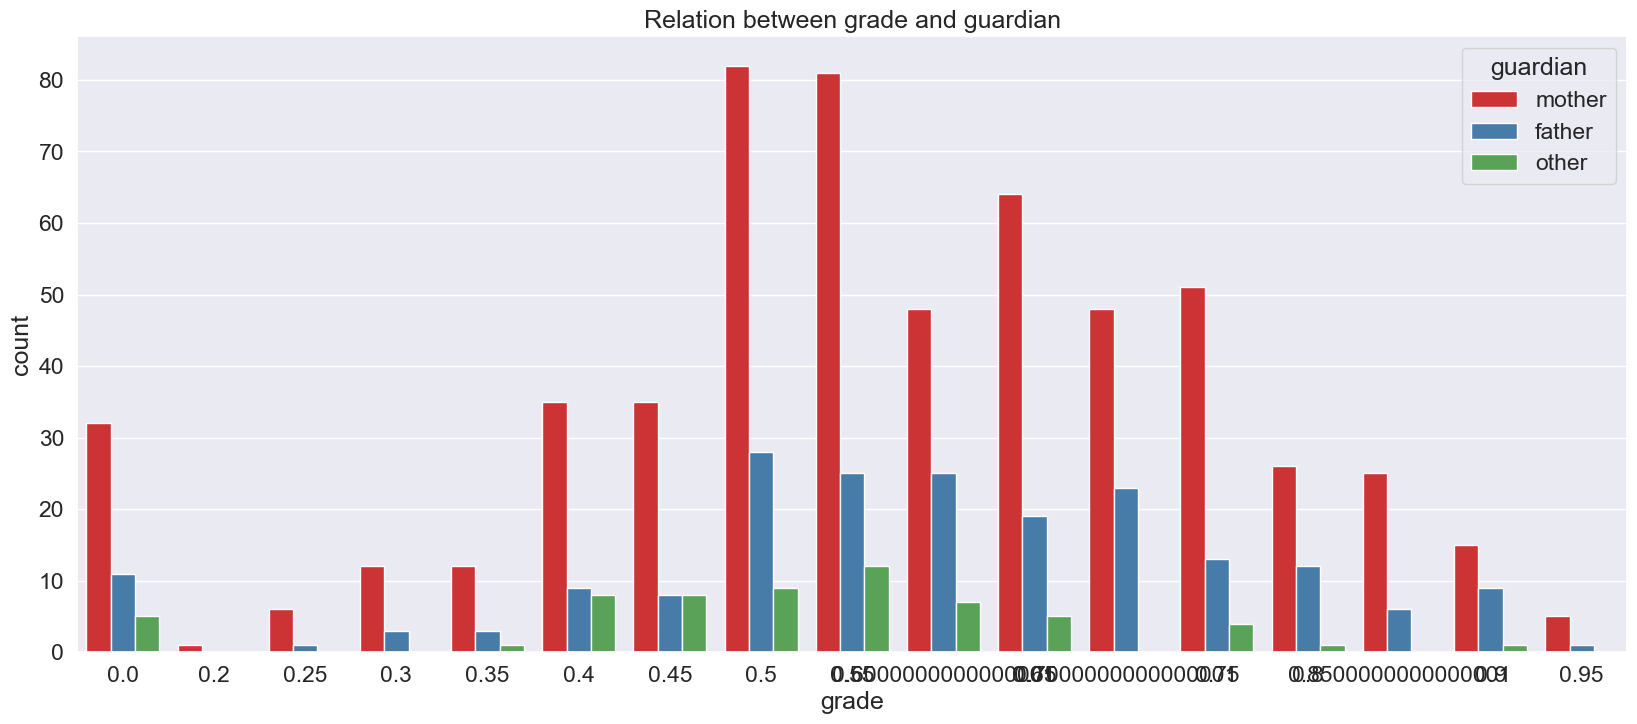

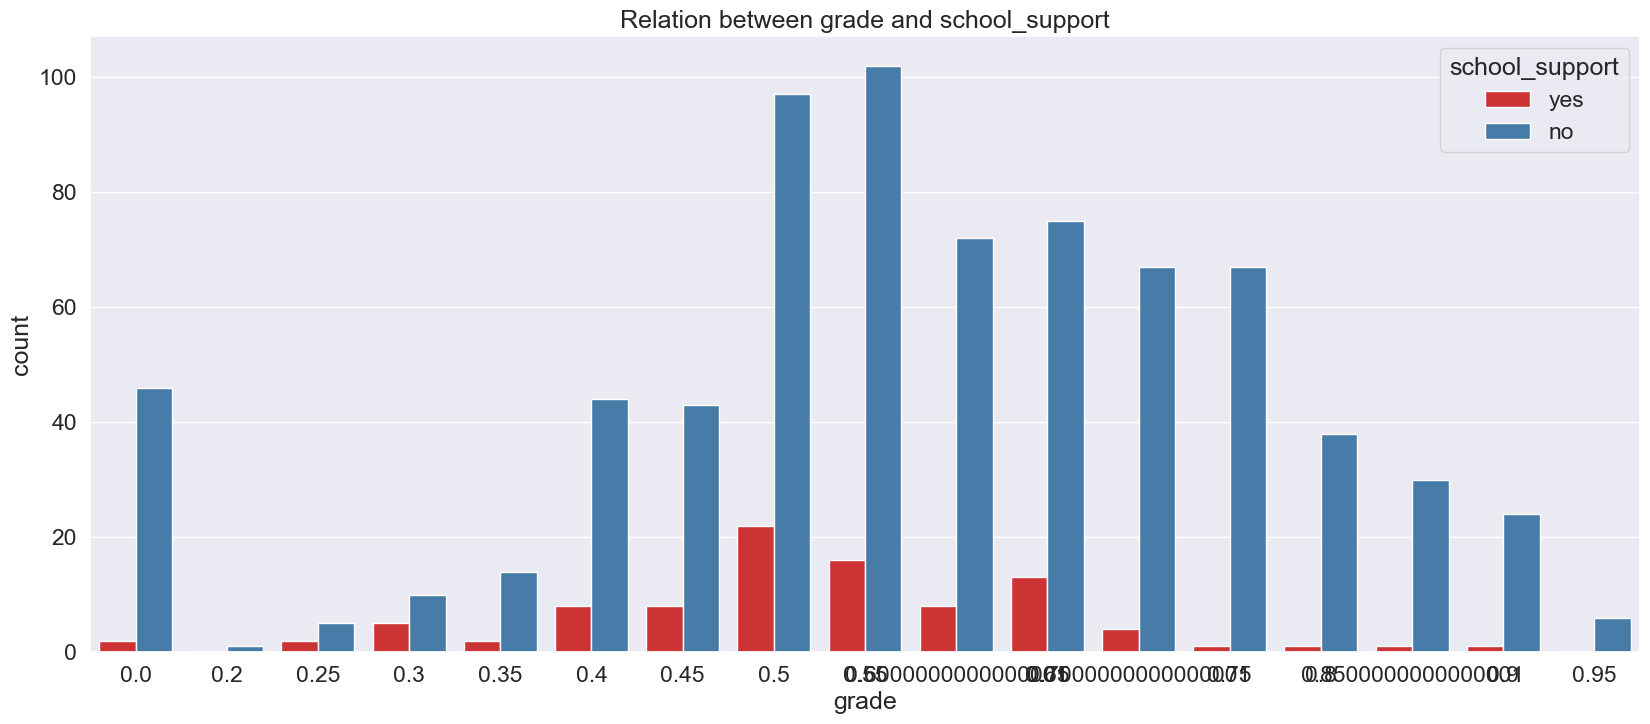

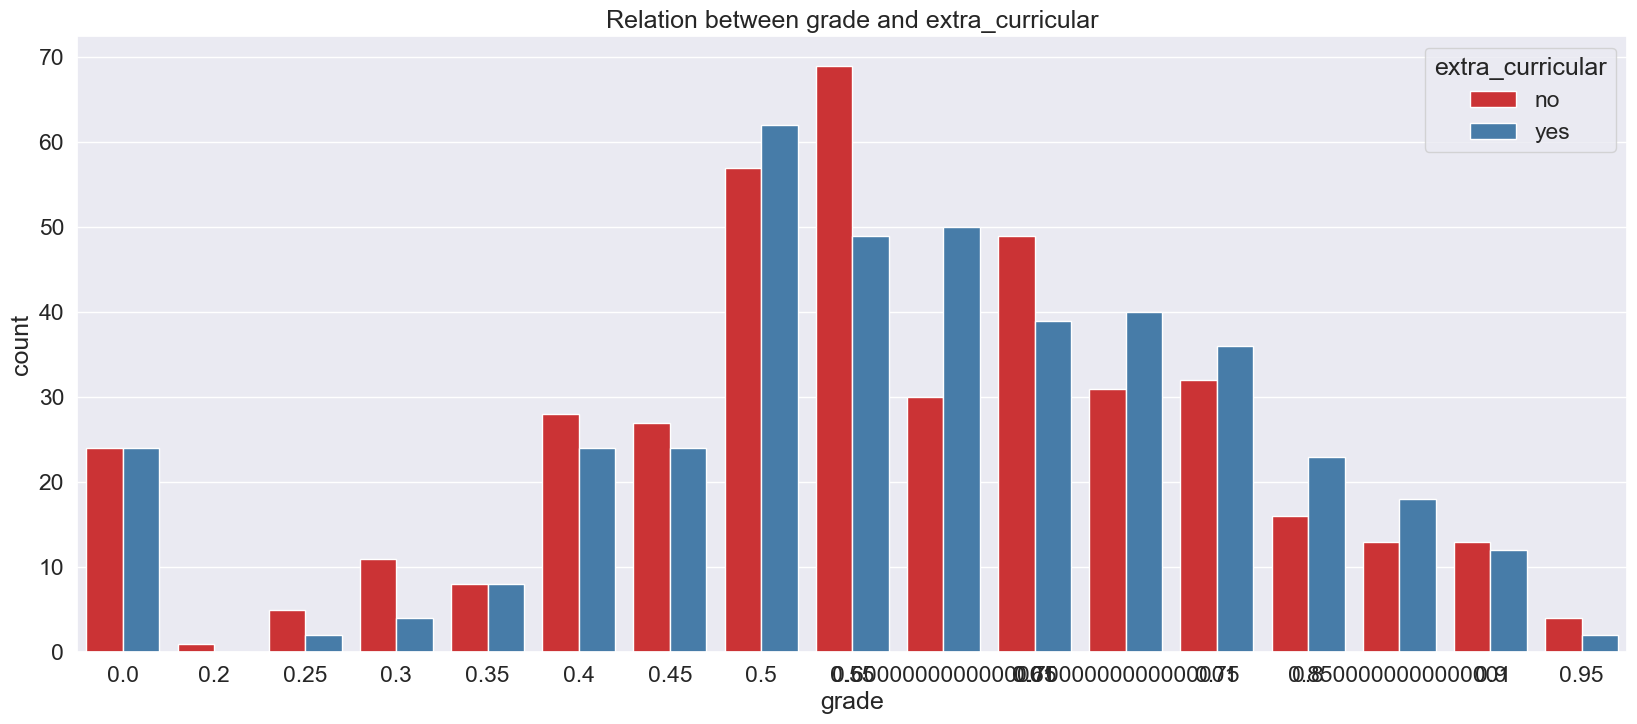

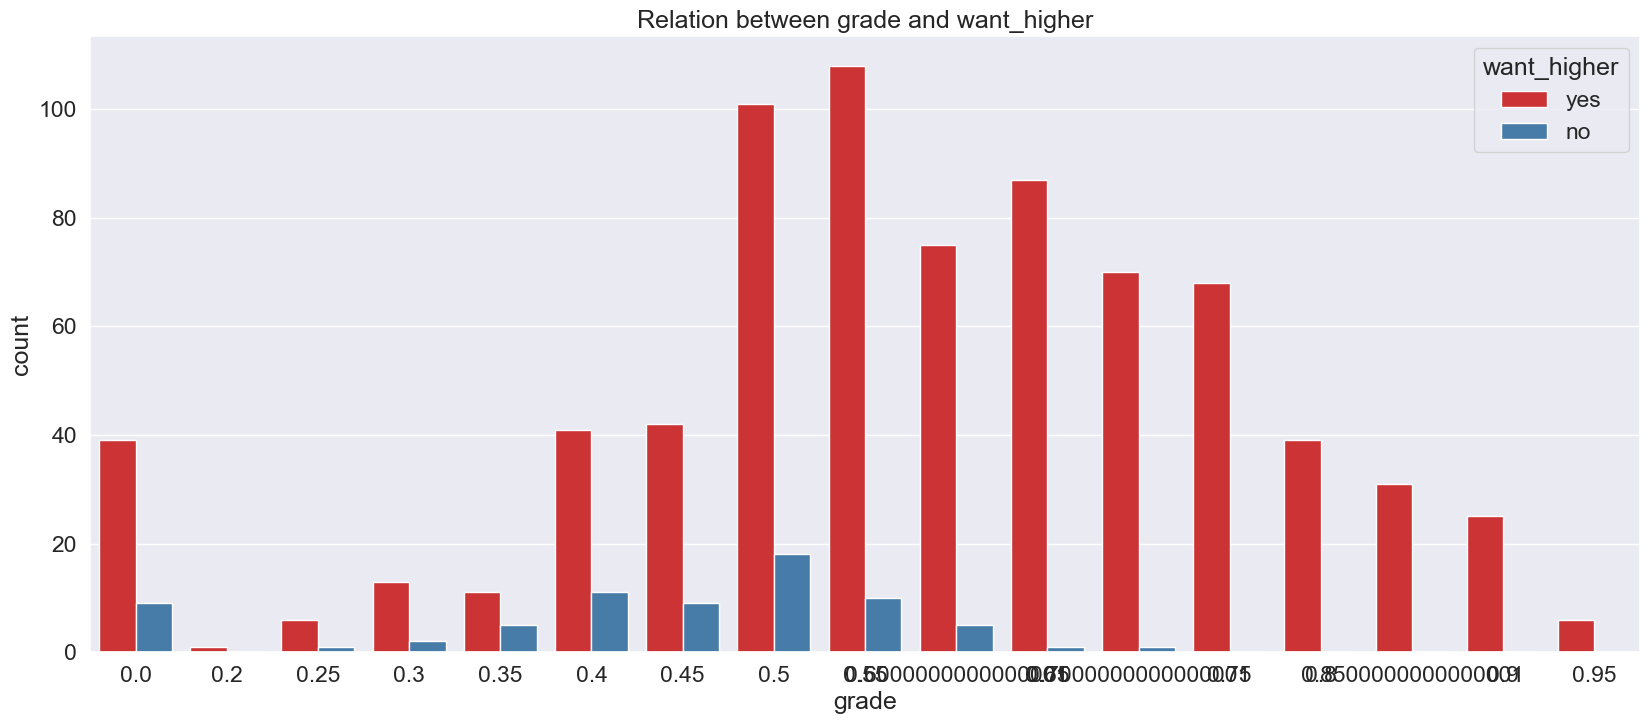

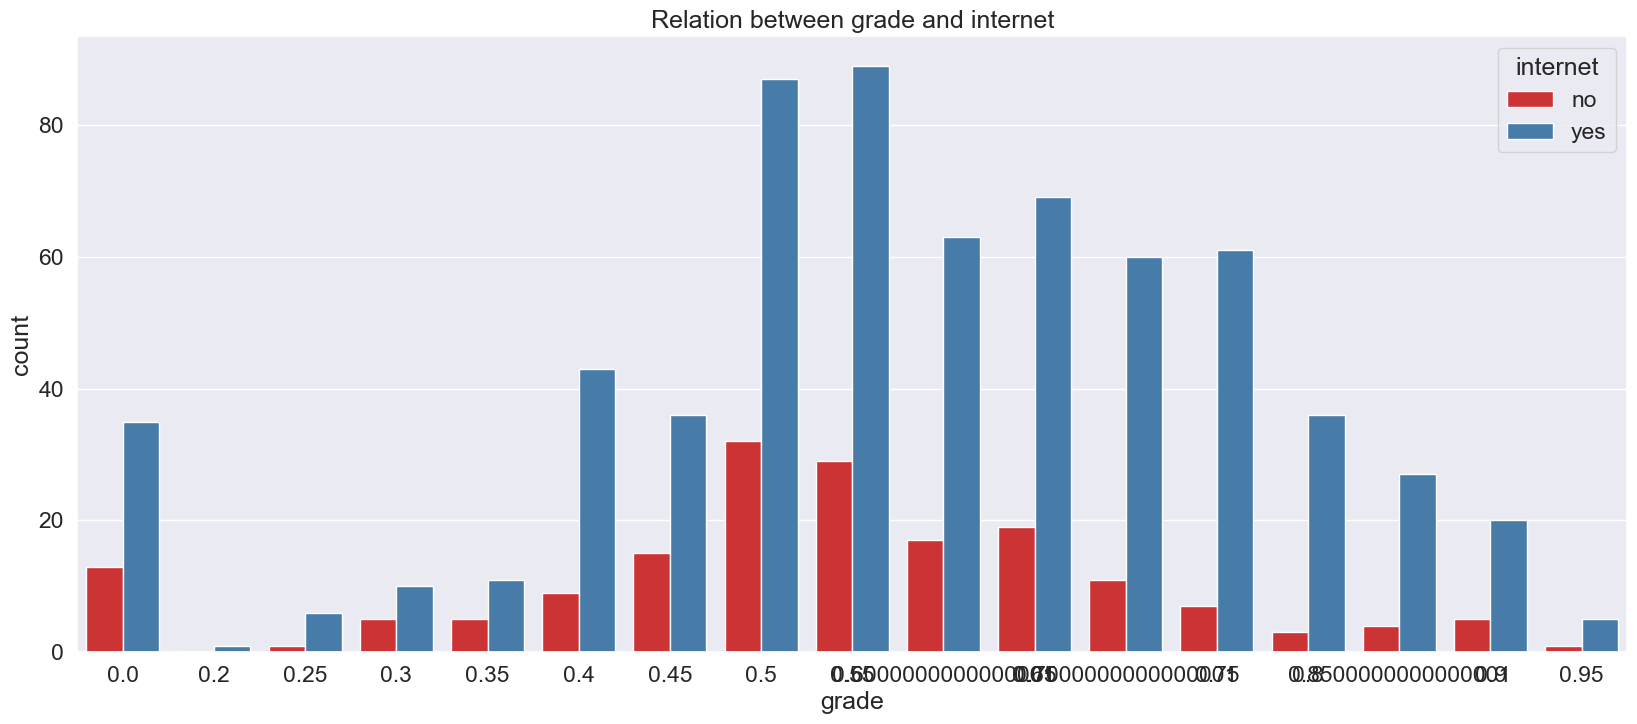

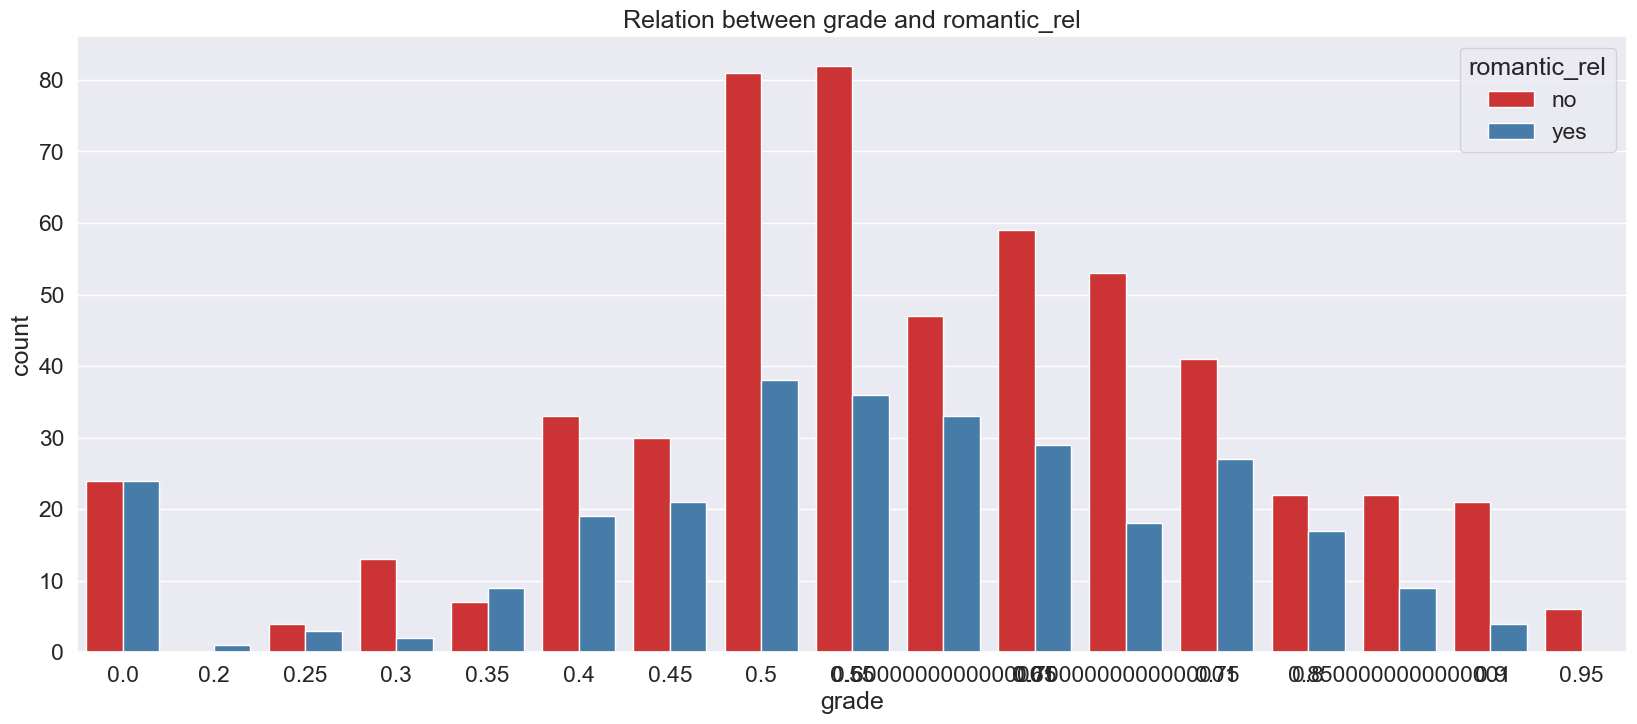

In [124]:
for metric in categorical_data.keys():
    if metric != "grade":
        get_relation(df, "grade", metric)

#### 1.2.4.2 Grade metrics vs. Numeric data

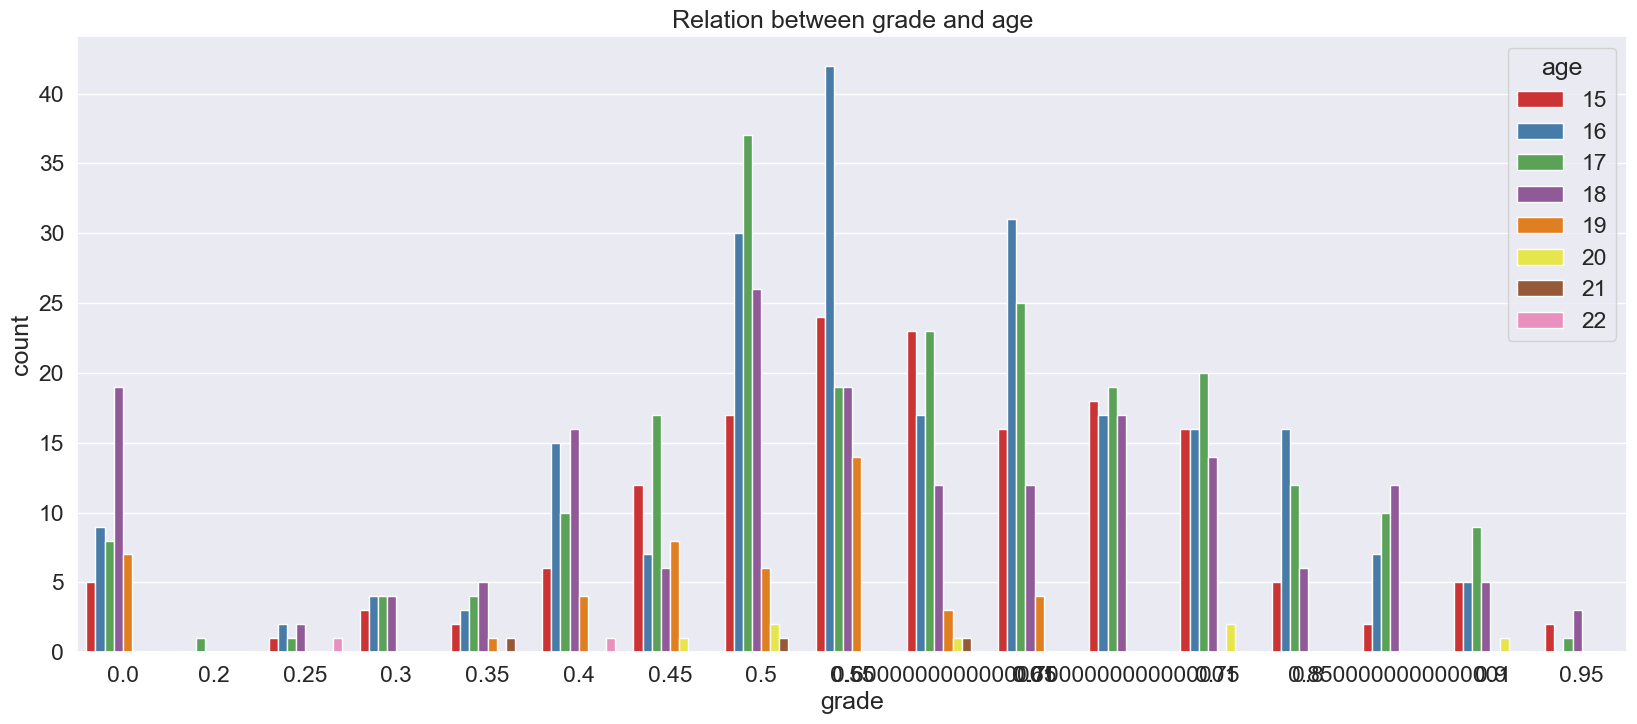

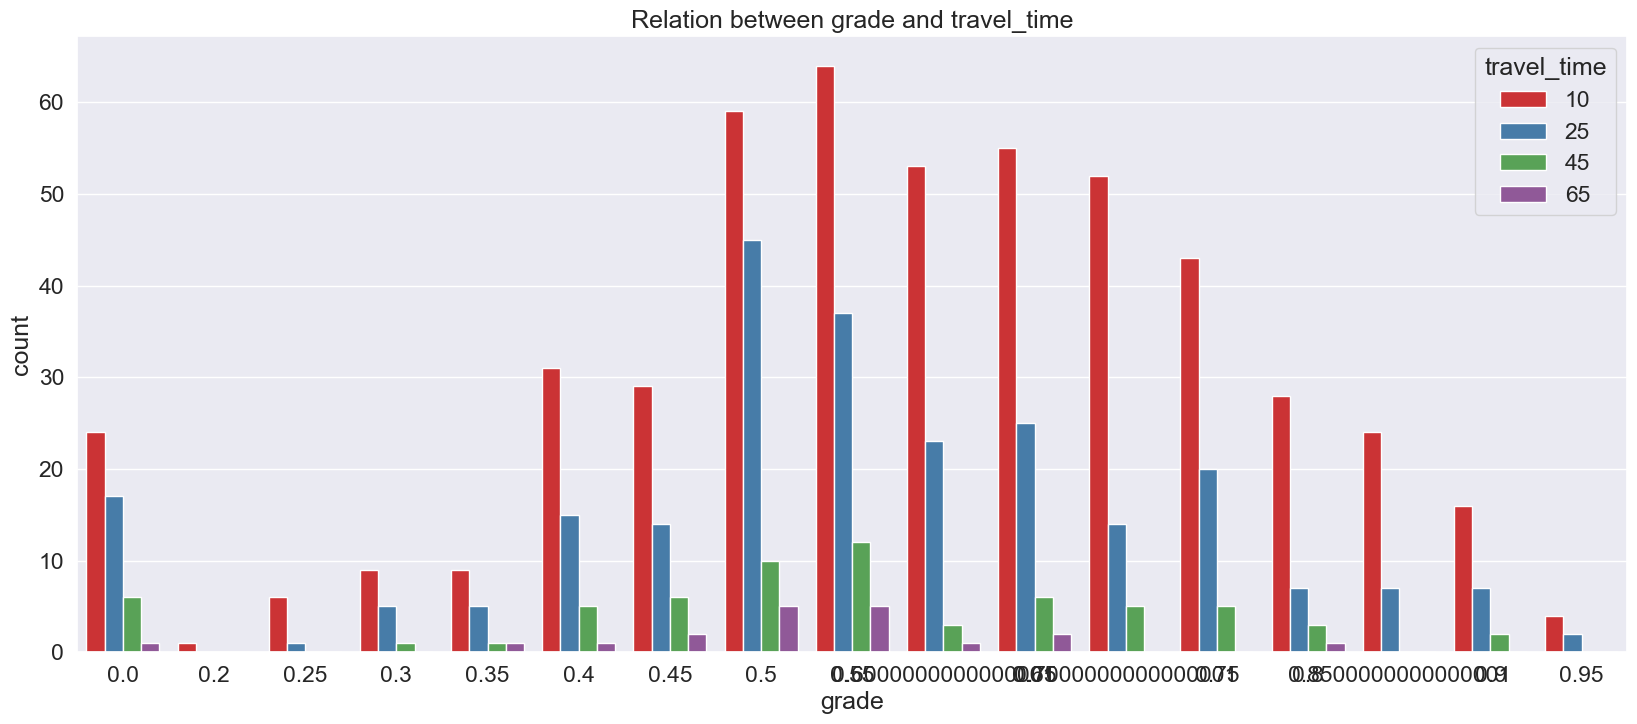

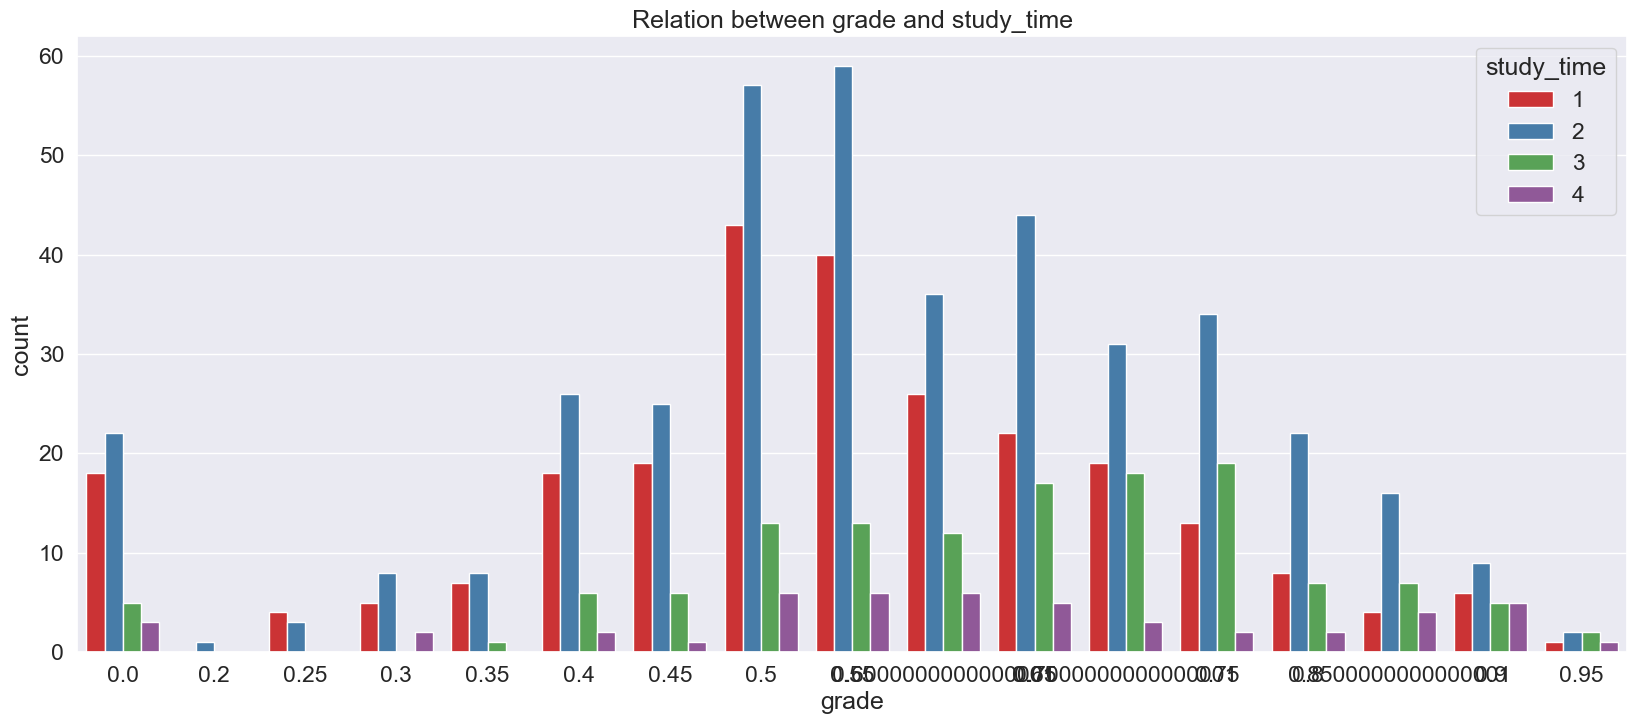

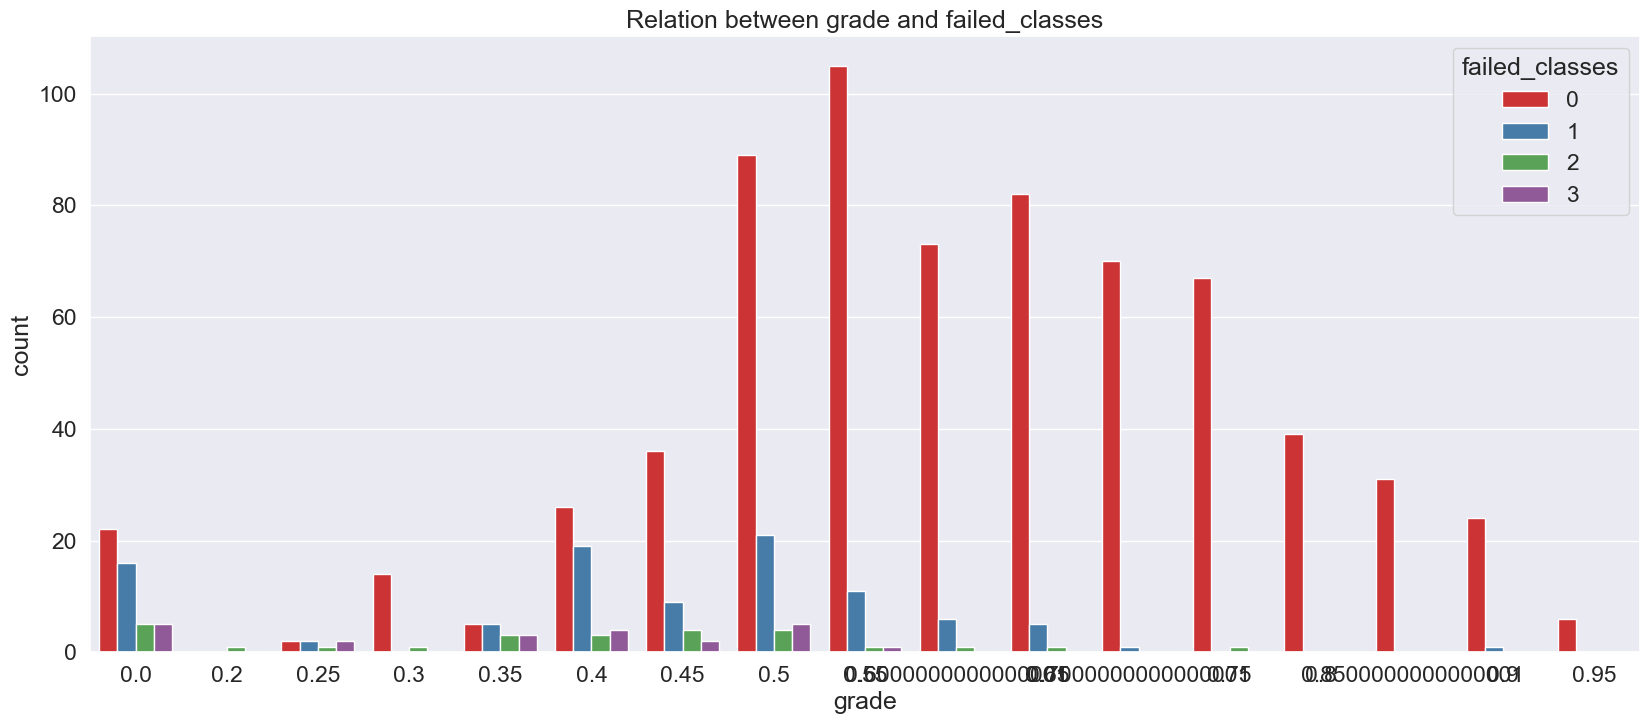

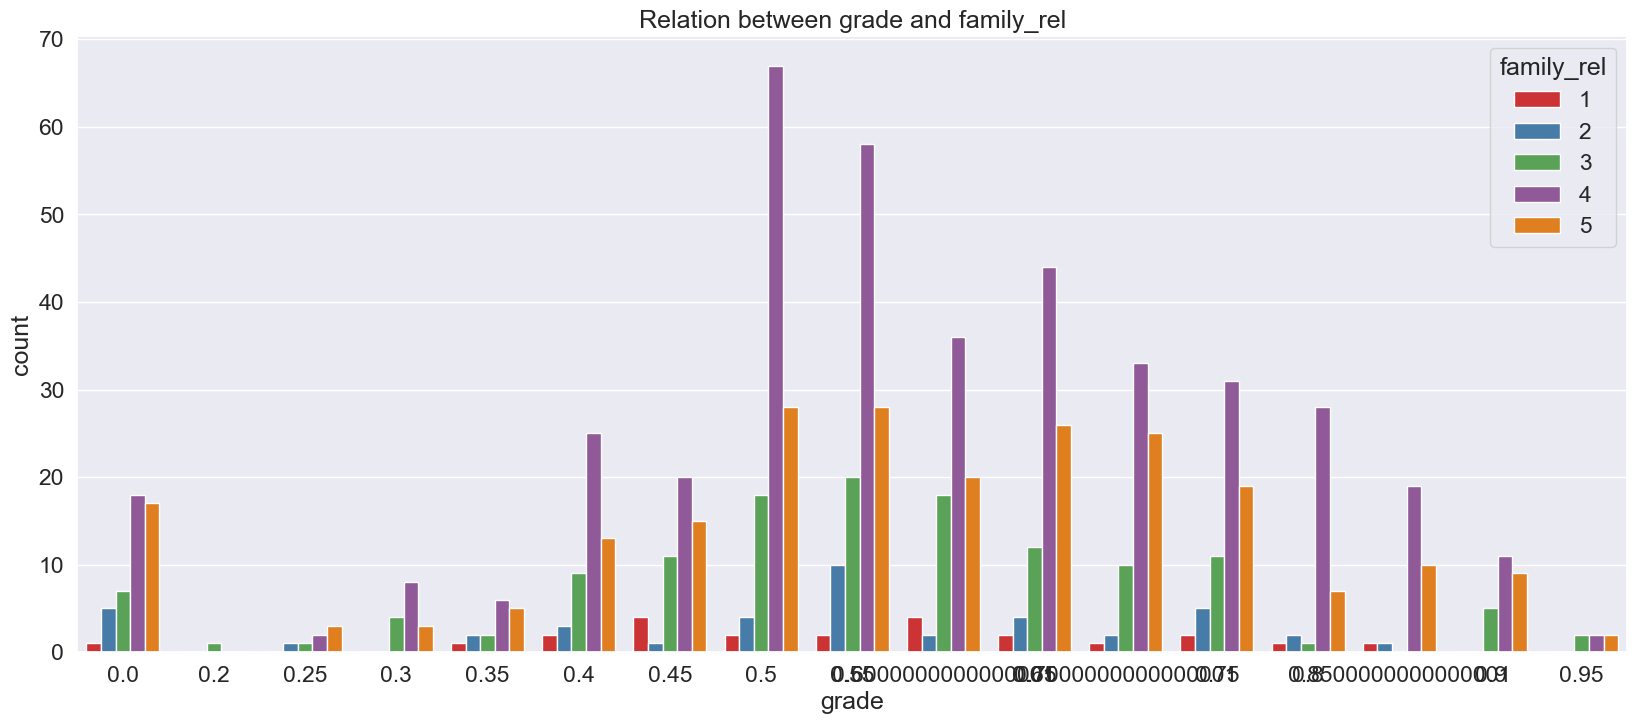

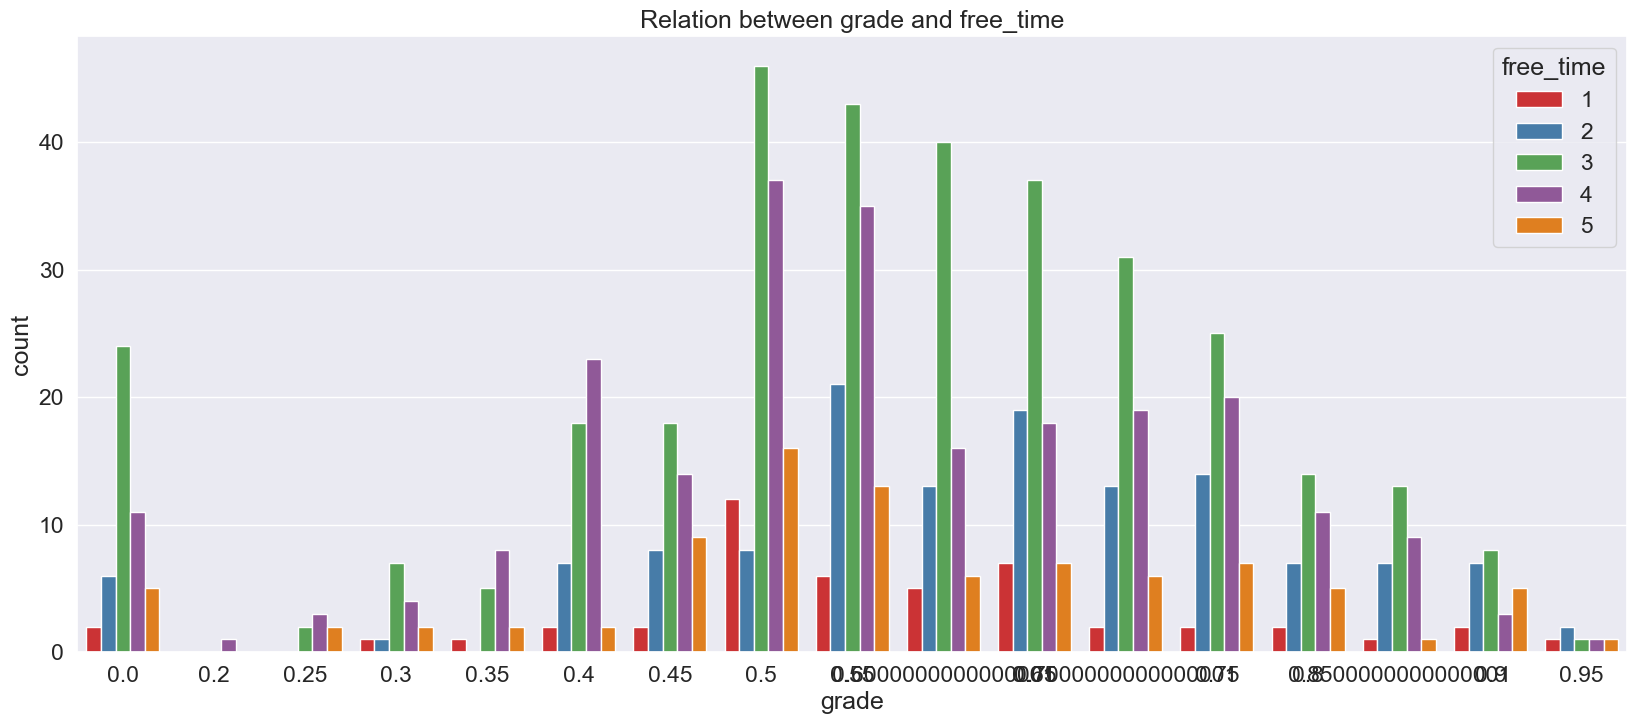

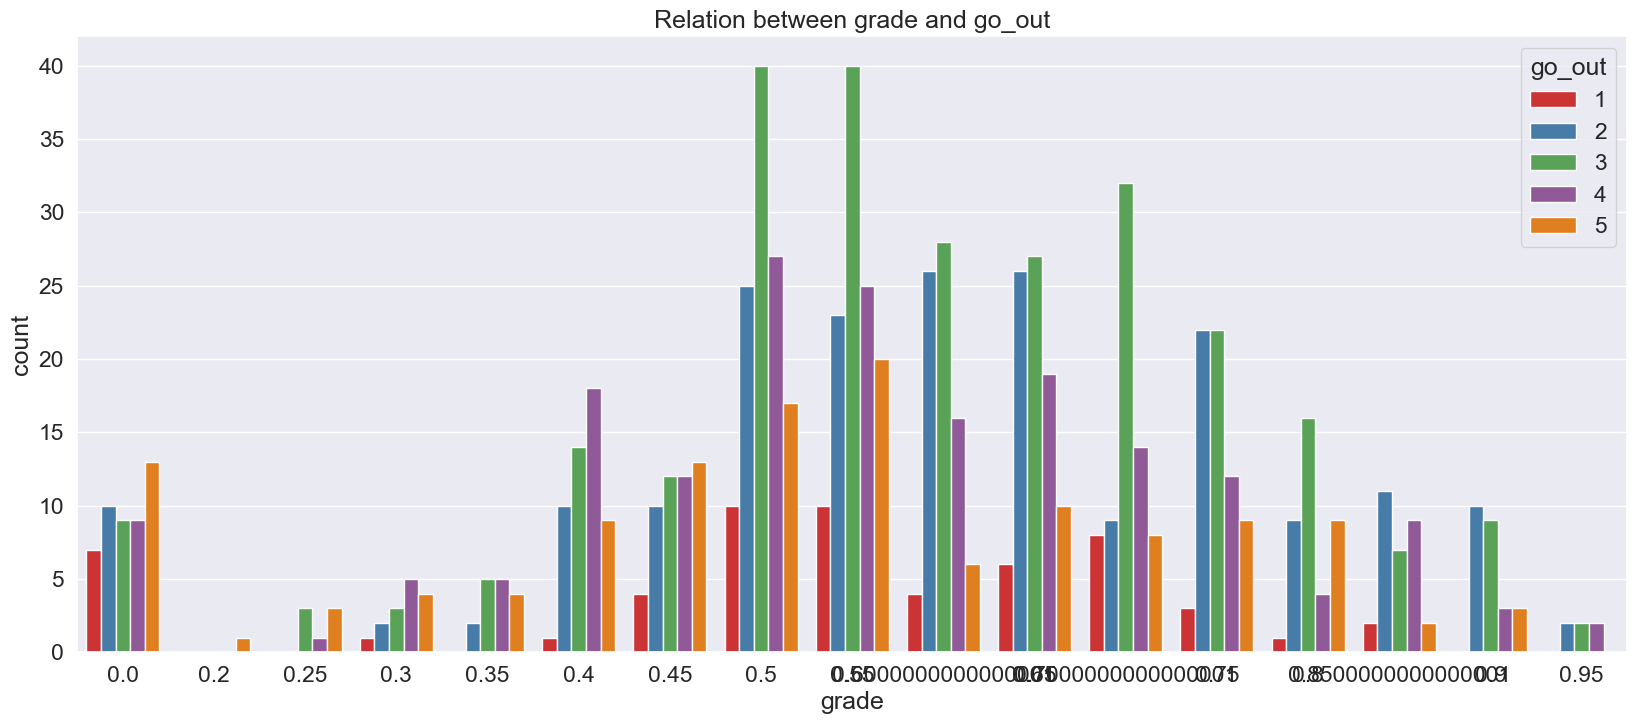

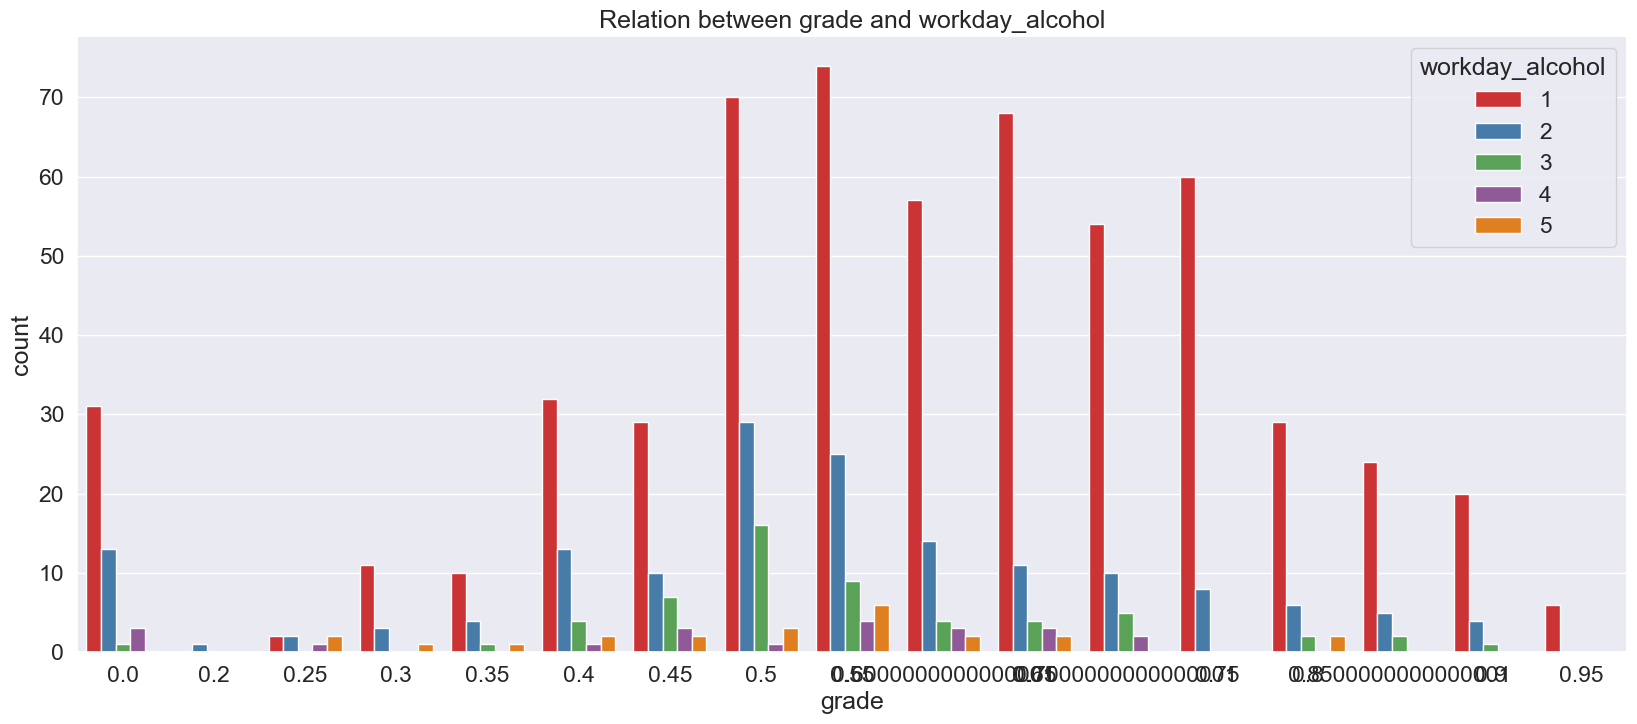

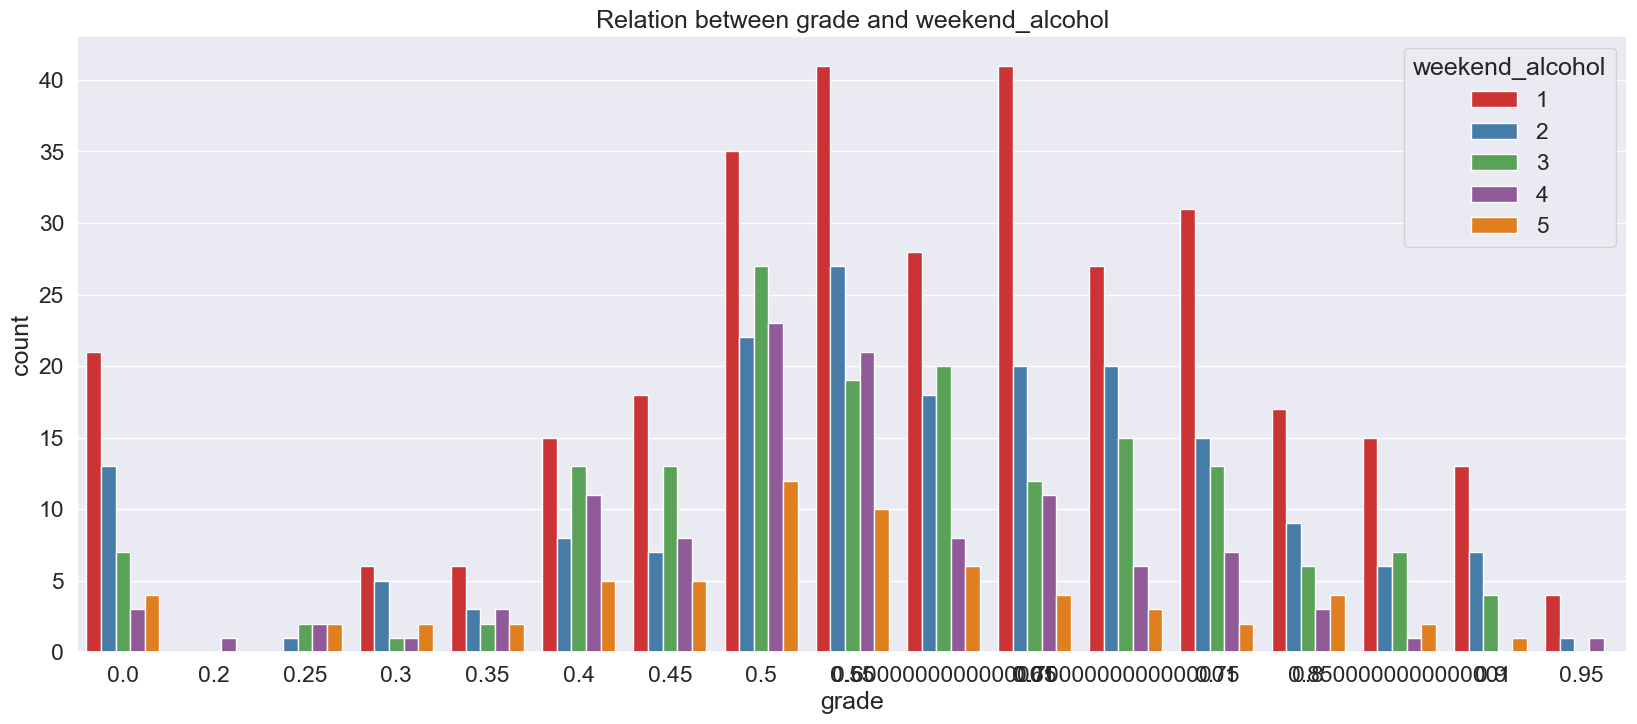

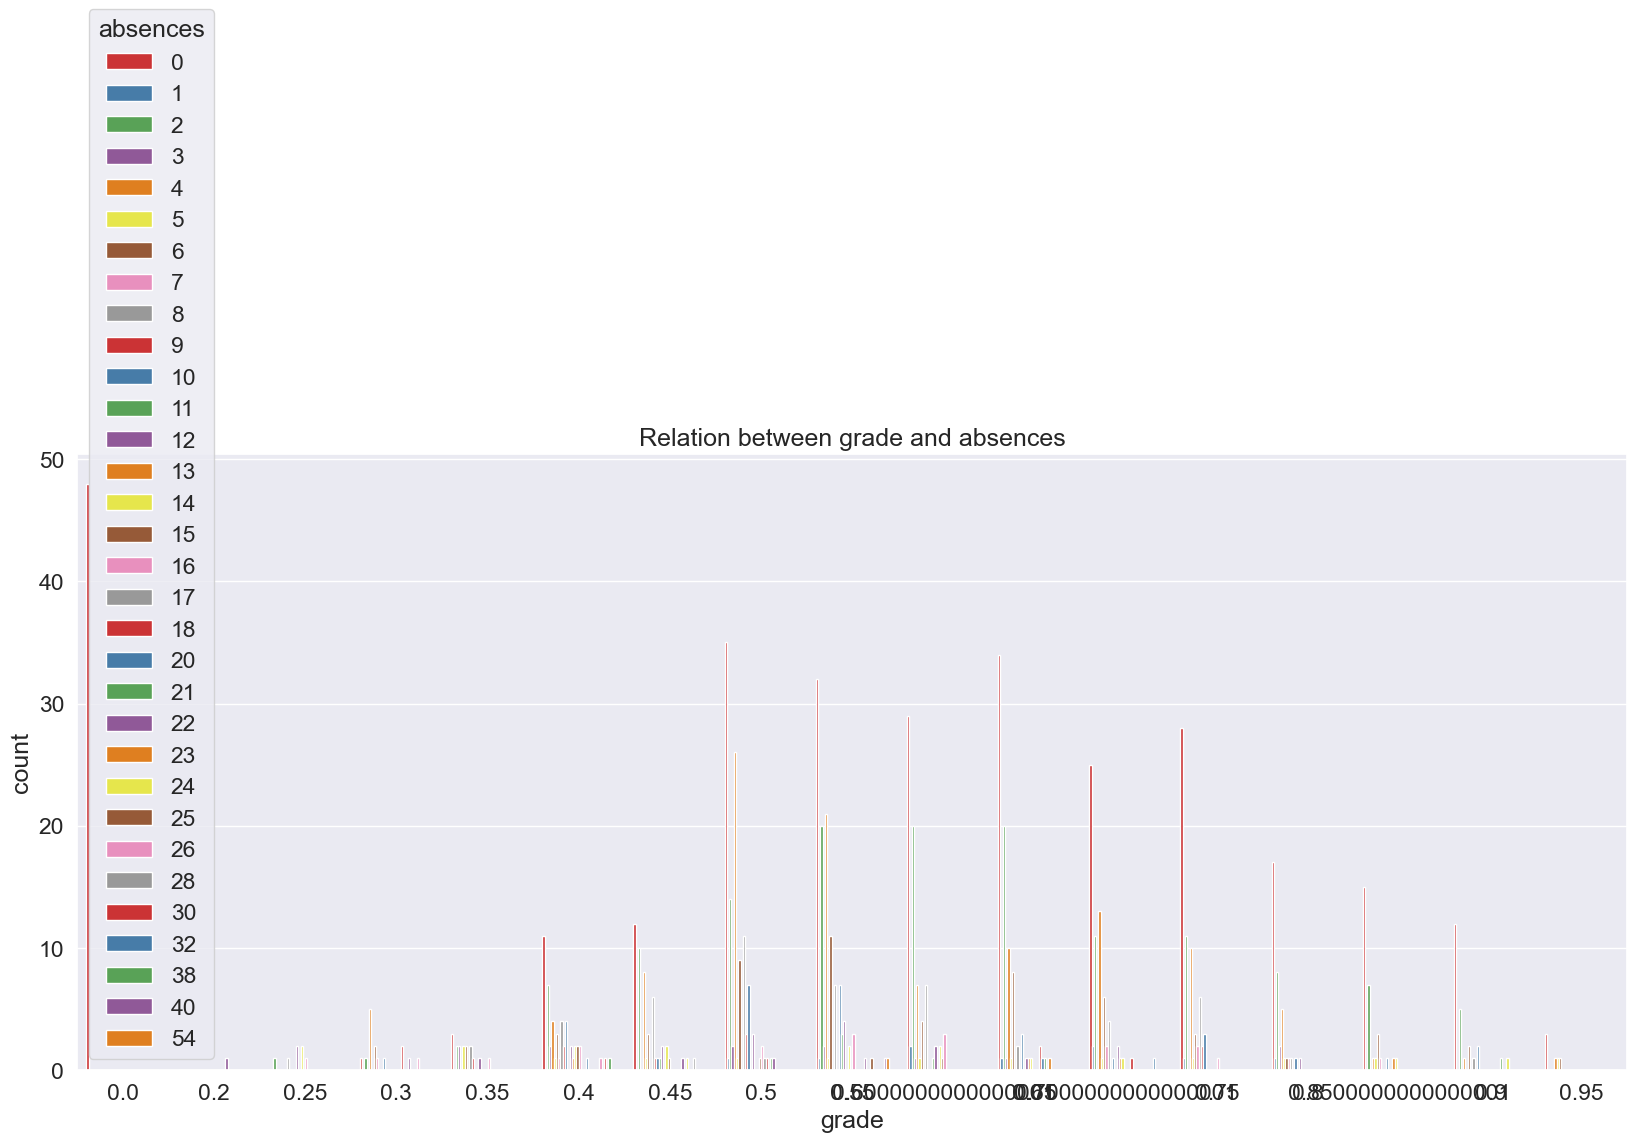

In [125]:
for metric in numeric_data.keys():
    if metric != "grade":
        get_relation(df, "grade", metric)

#### 1.2.4.3. Correlation matrix

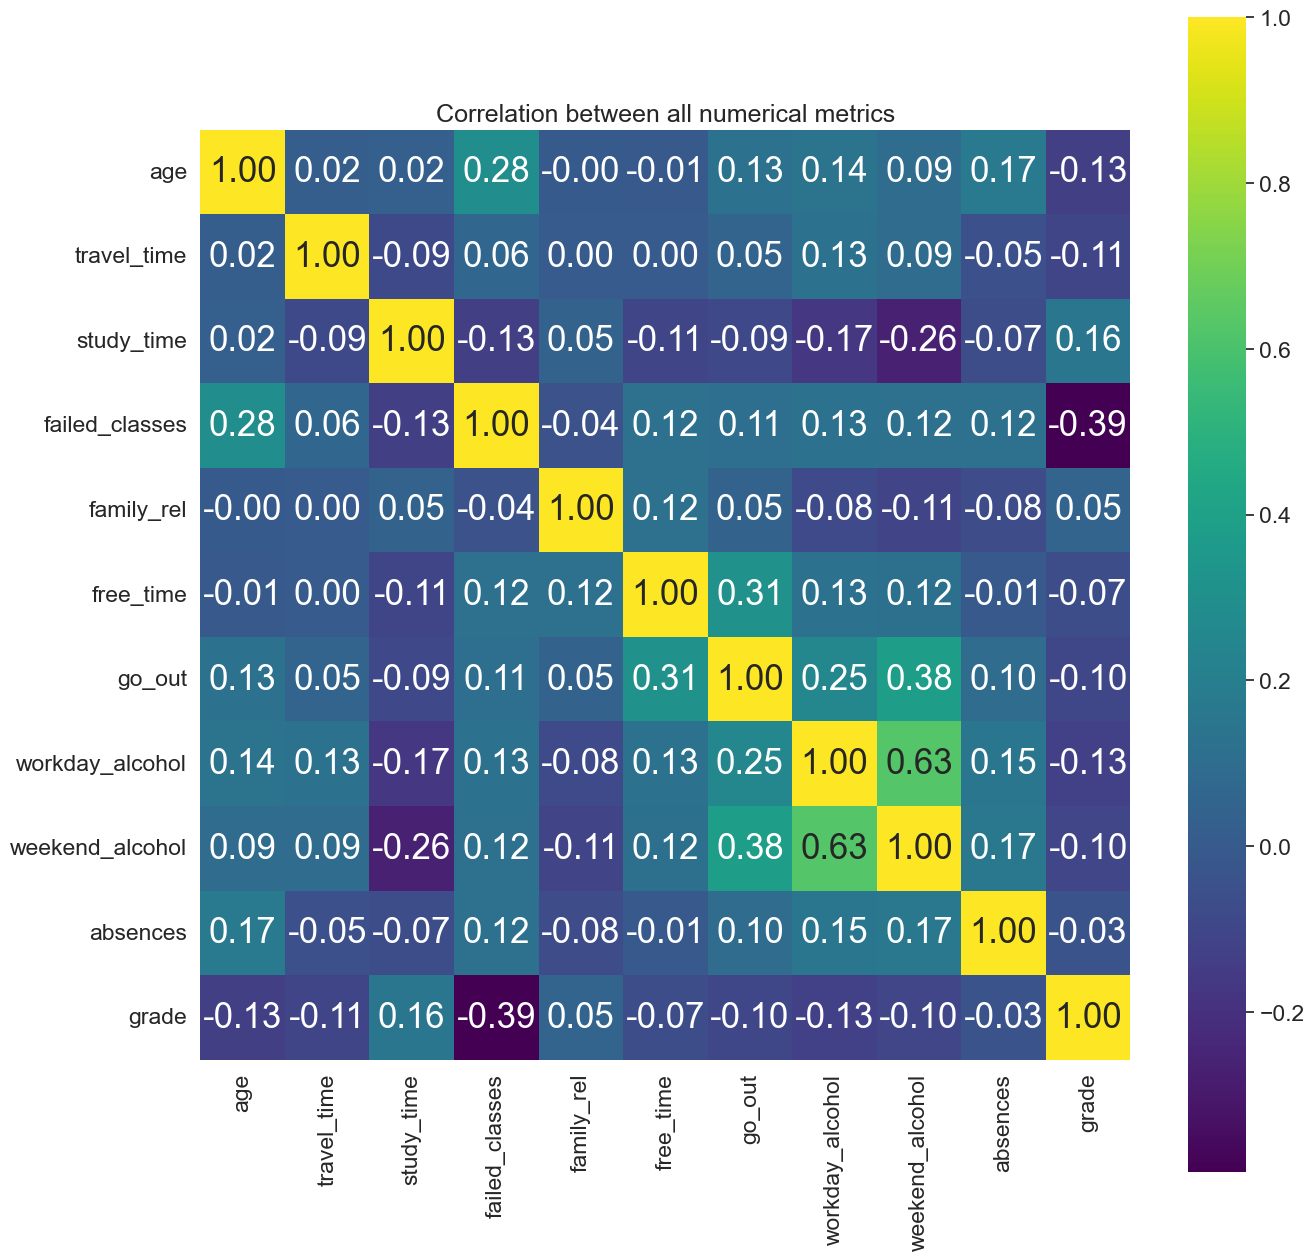

In [126]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_new = df.select_dtypes(include=numerics)
plt.figure(figsize=(15,15))
cm = np.corrcoef(df_new.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 25}, cmap='viridis',
                 yticklabels=df_new.columns, xticklabels=df_new.columns)
hm.set_title("Correlation between all numerical metrics")
plt.show()

#### 1.2.4.5. Correlation figure

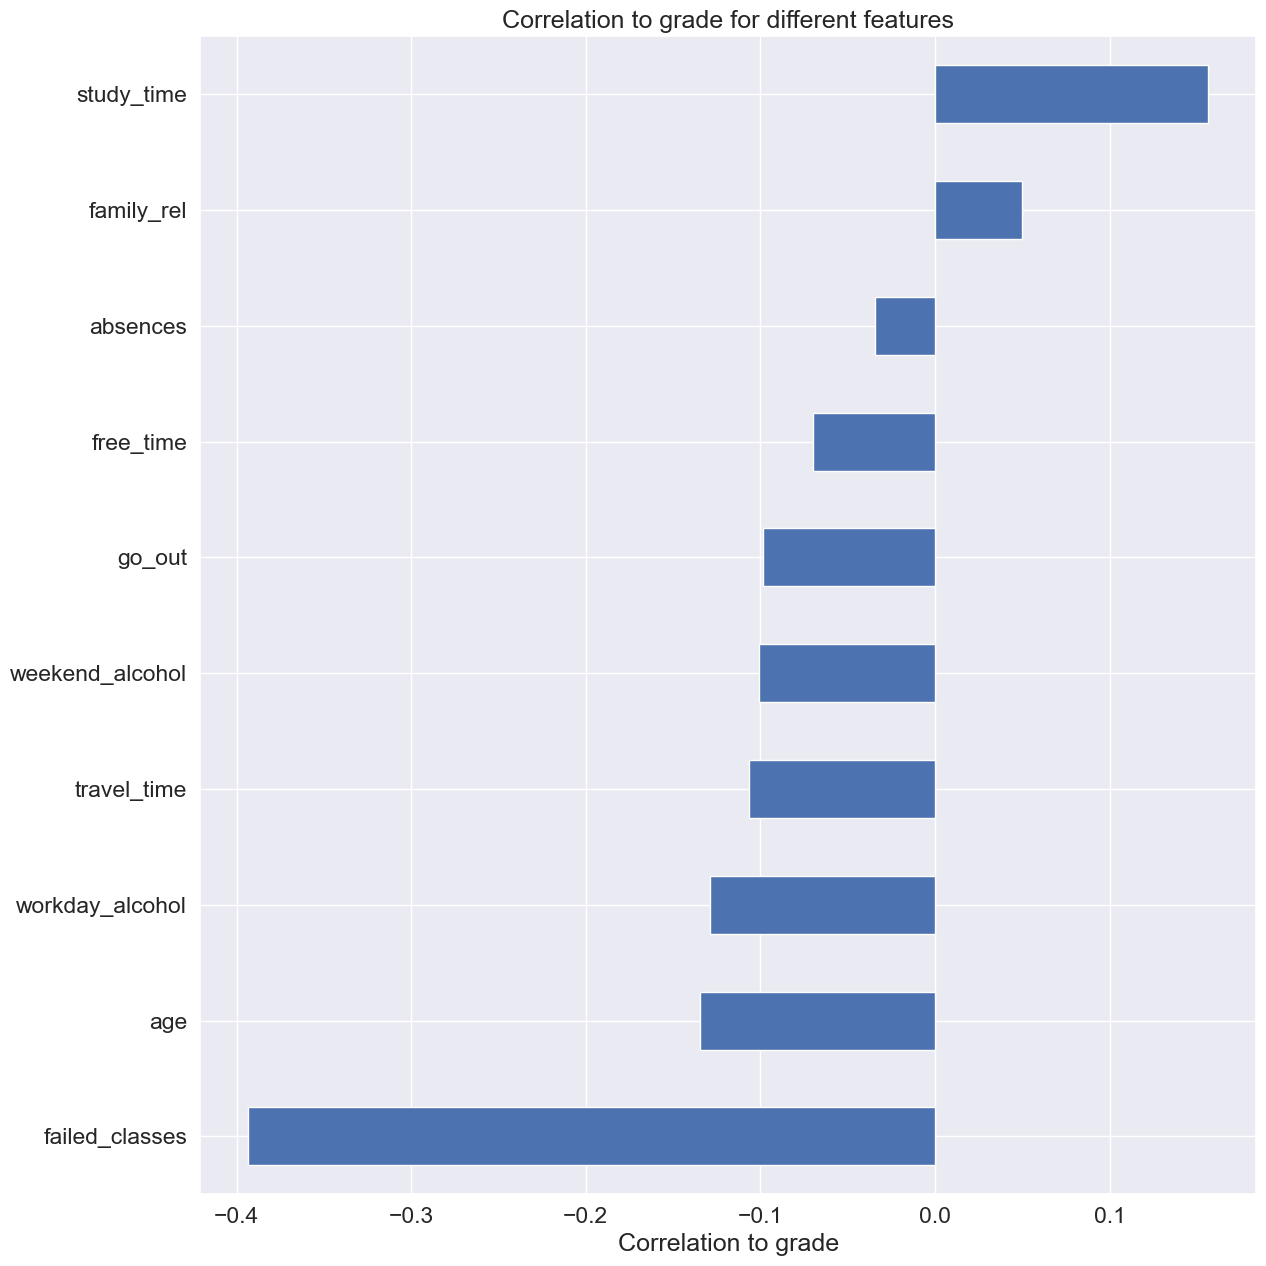

In [127]:
# Horizontal bar chart showing the correlation of features
_data = numeric_data + target_data
corr = df[_data.keys()].corr()
plt.figure(figsize=(13,13))
corr['grade'].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation to grade for different features")
plt.xlabel("Correlation to grade")
plt.tight_layout()
plt.show()

#### 1.2.4.6. Pair Plot

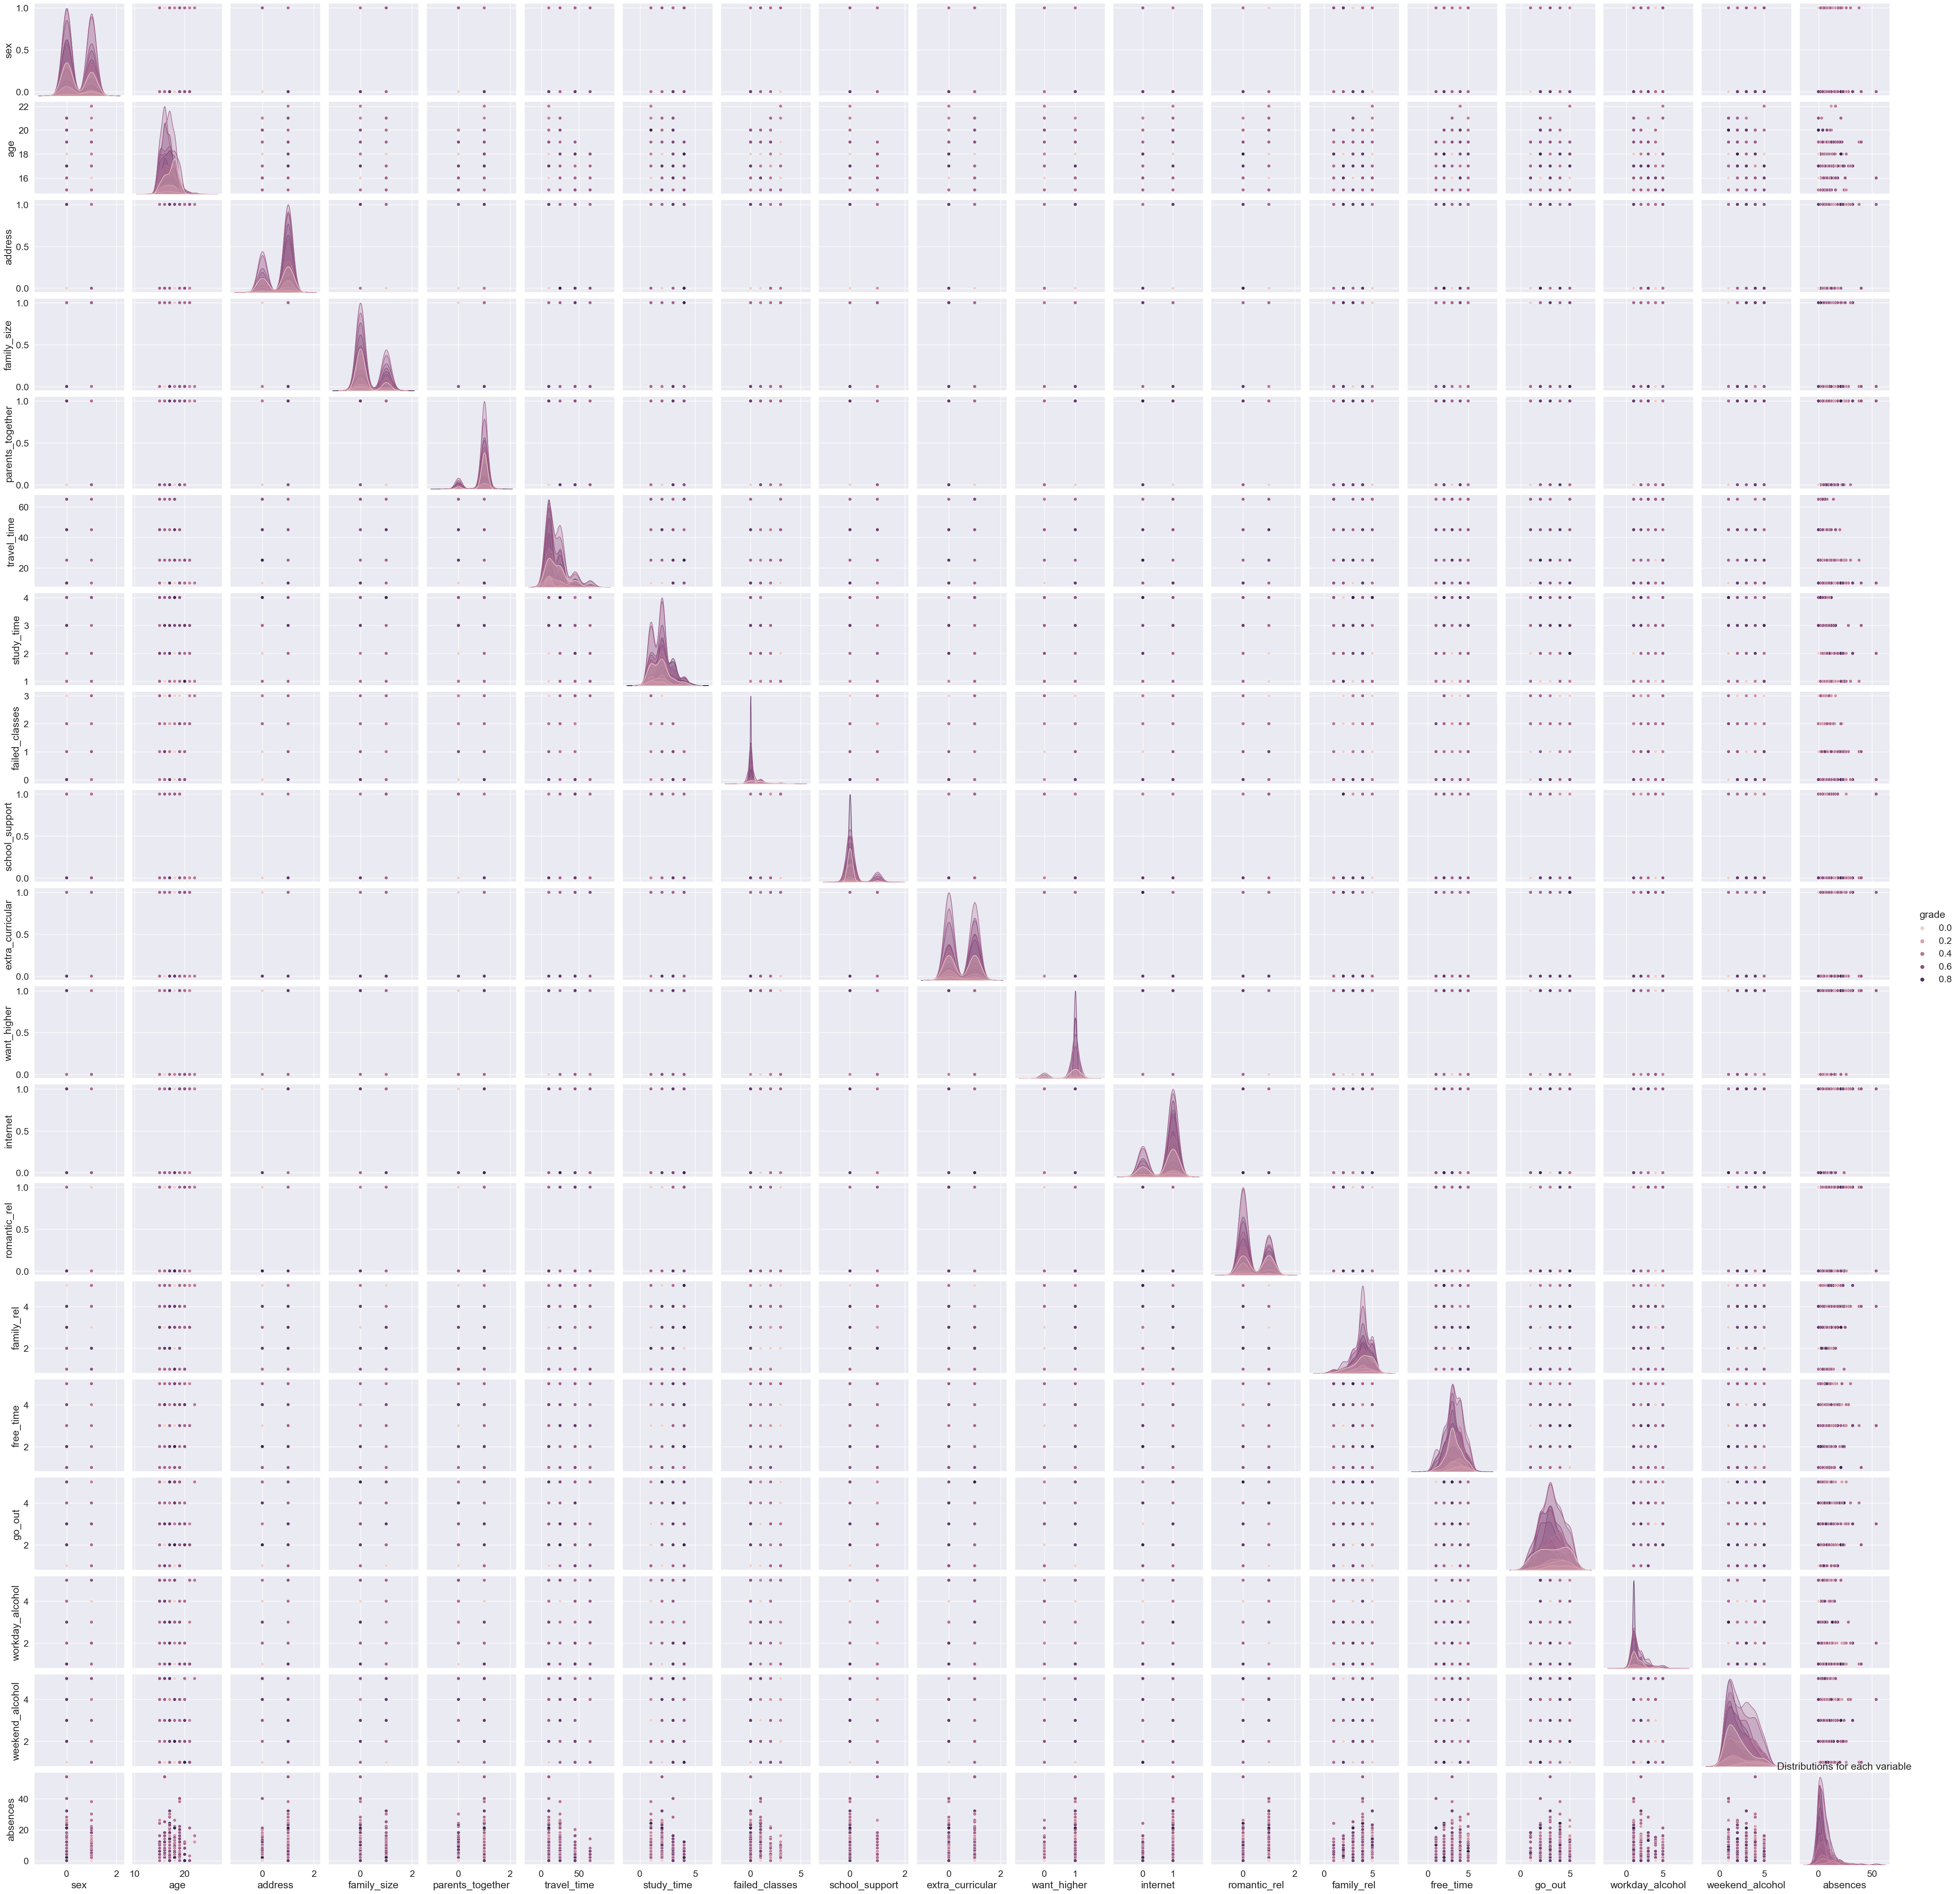

In [147]:
sns.pairplot(data=df, hue="grade")
plt.title('Distributions for each variable')
plt.show()

## 1.3. Data cleaning

### 1.3.1. Imputation

In [128]:
df.isnull().sum()

sex                 0
age                 0
address             0
family_size         0
parents_together    0
mother_job          0
father_job          0
guardian            0
travel_time         0
study_time          0
failed_classes      0
school_support      0
extra_curricular    0
want_higher         0
internet            0
romantic_rel        0
family_rel          0
free_time           0
go_out              0
workday_alcohol     0
weekend_alcohol     0
absences            0
grade               0
dtype: int64

### 1.3.2. Remove outlier

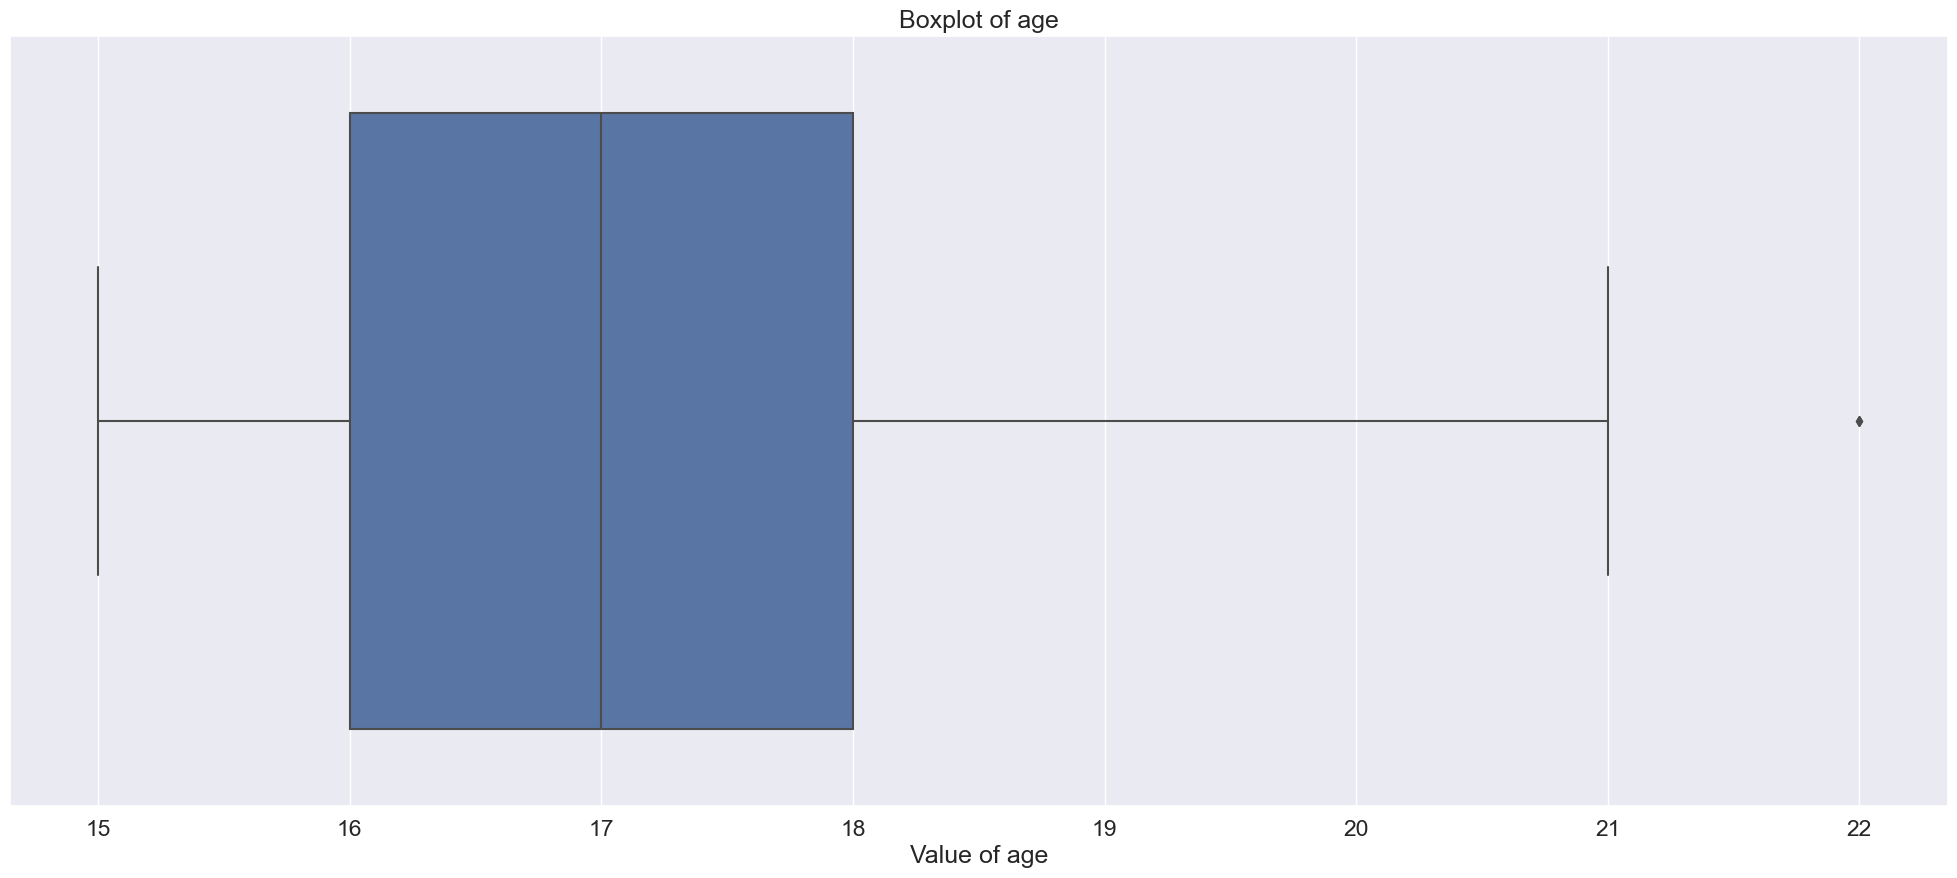

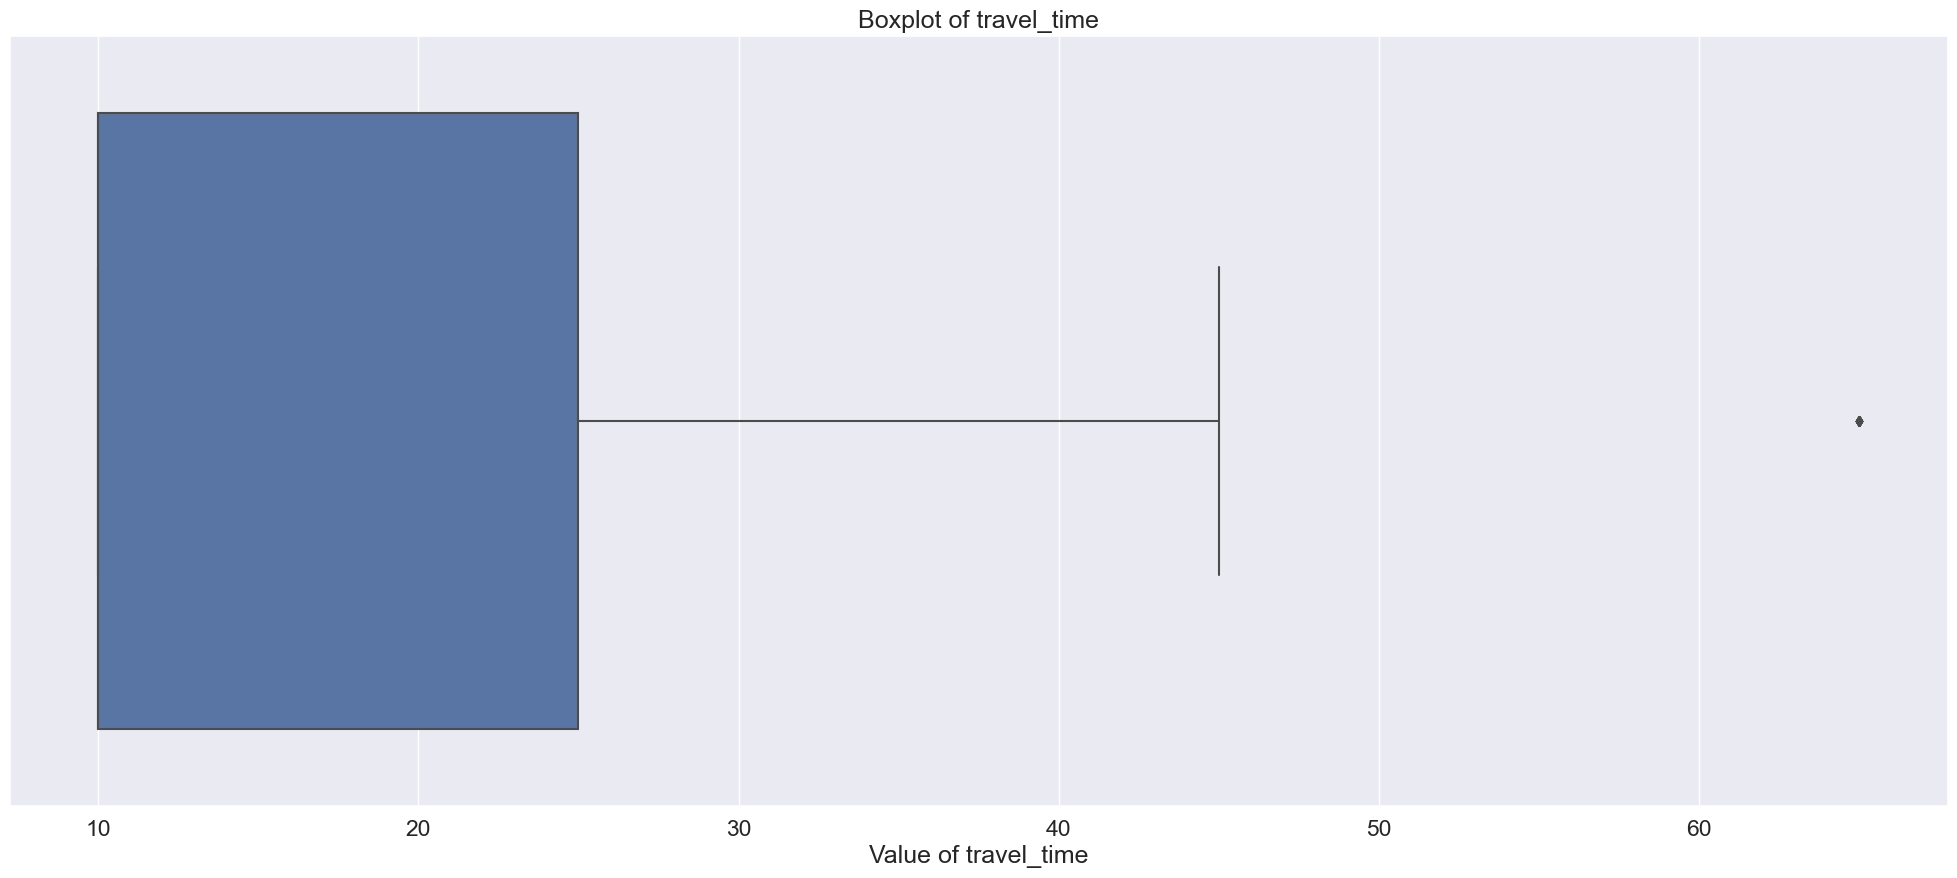

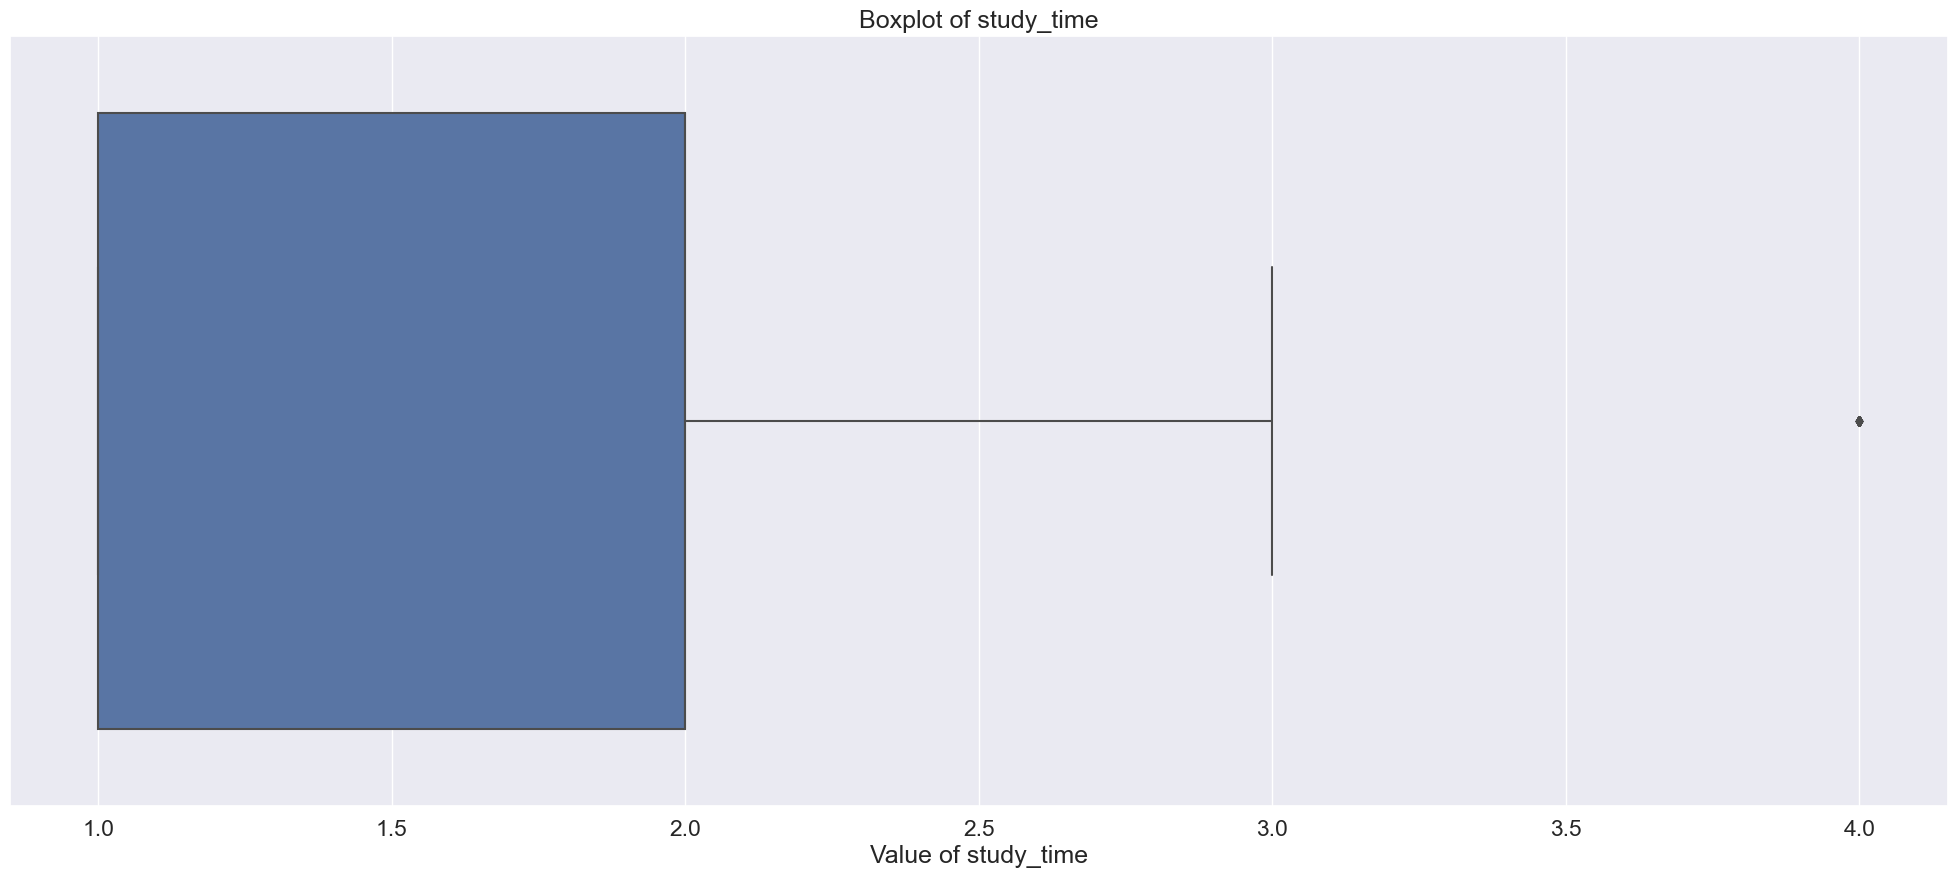

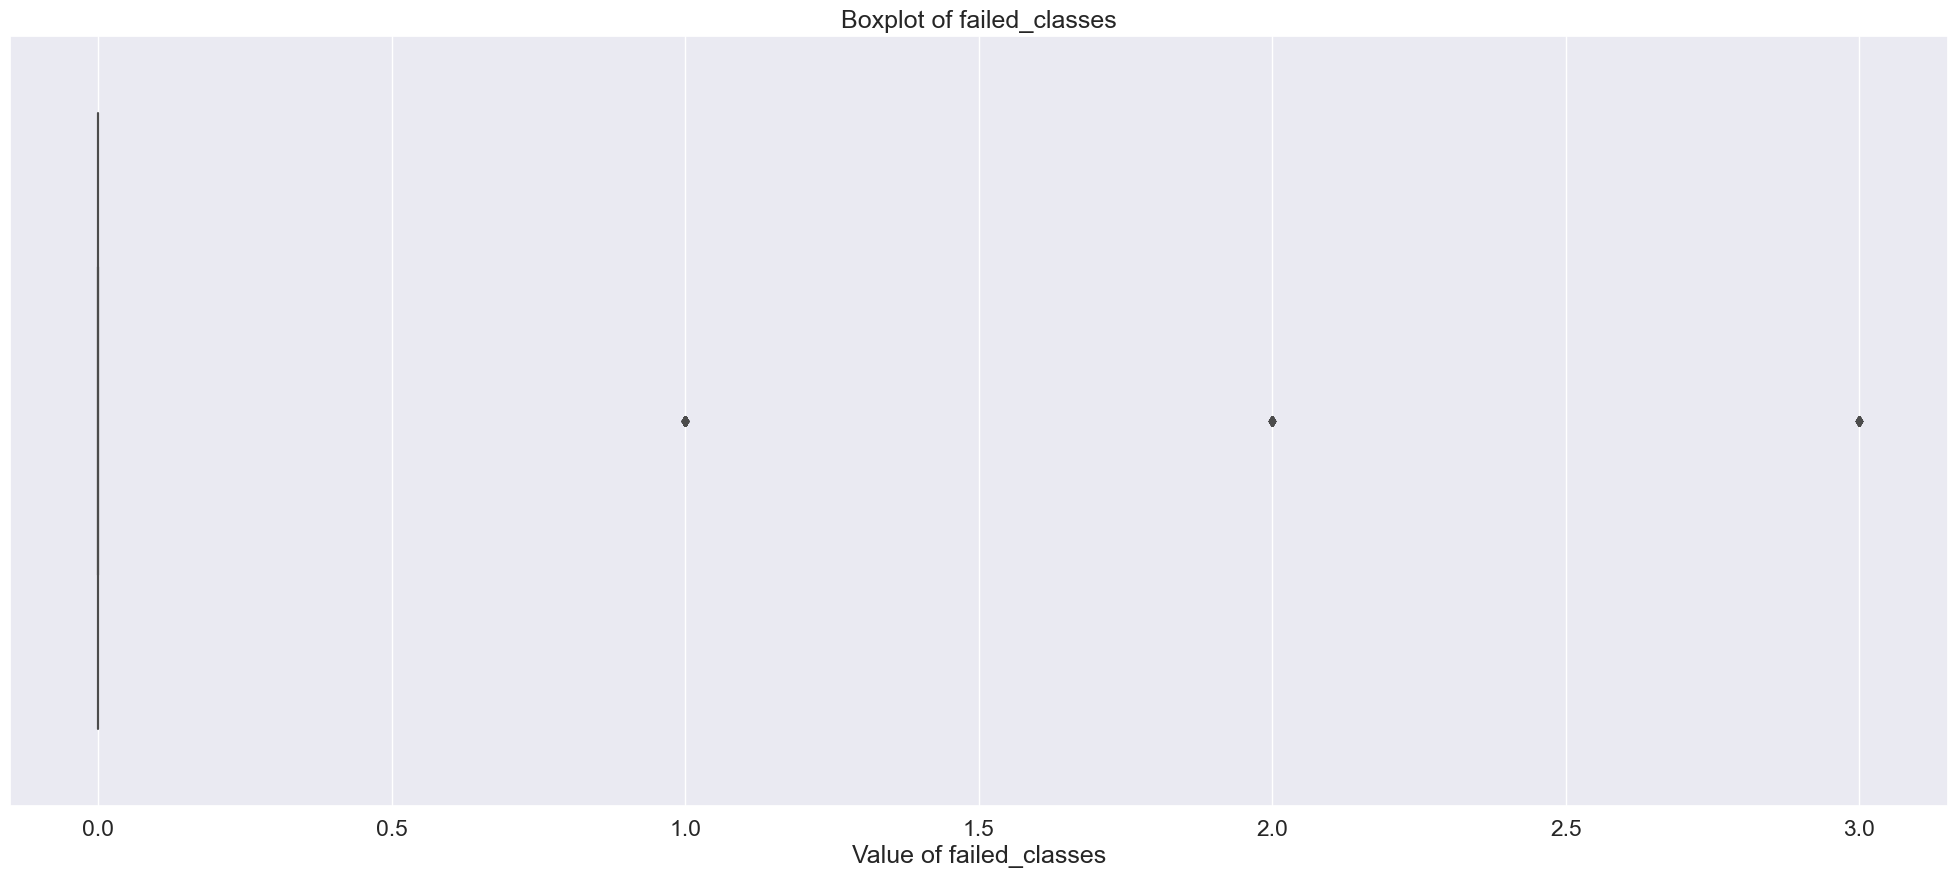

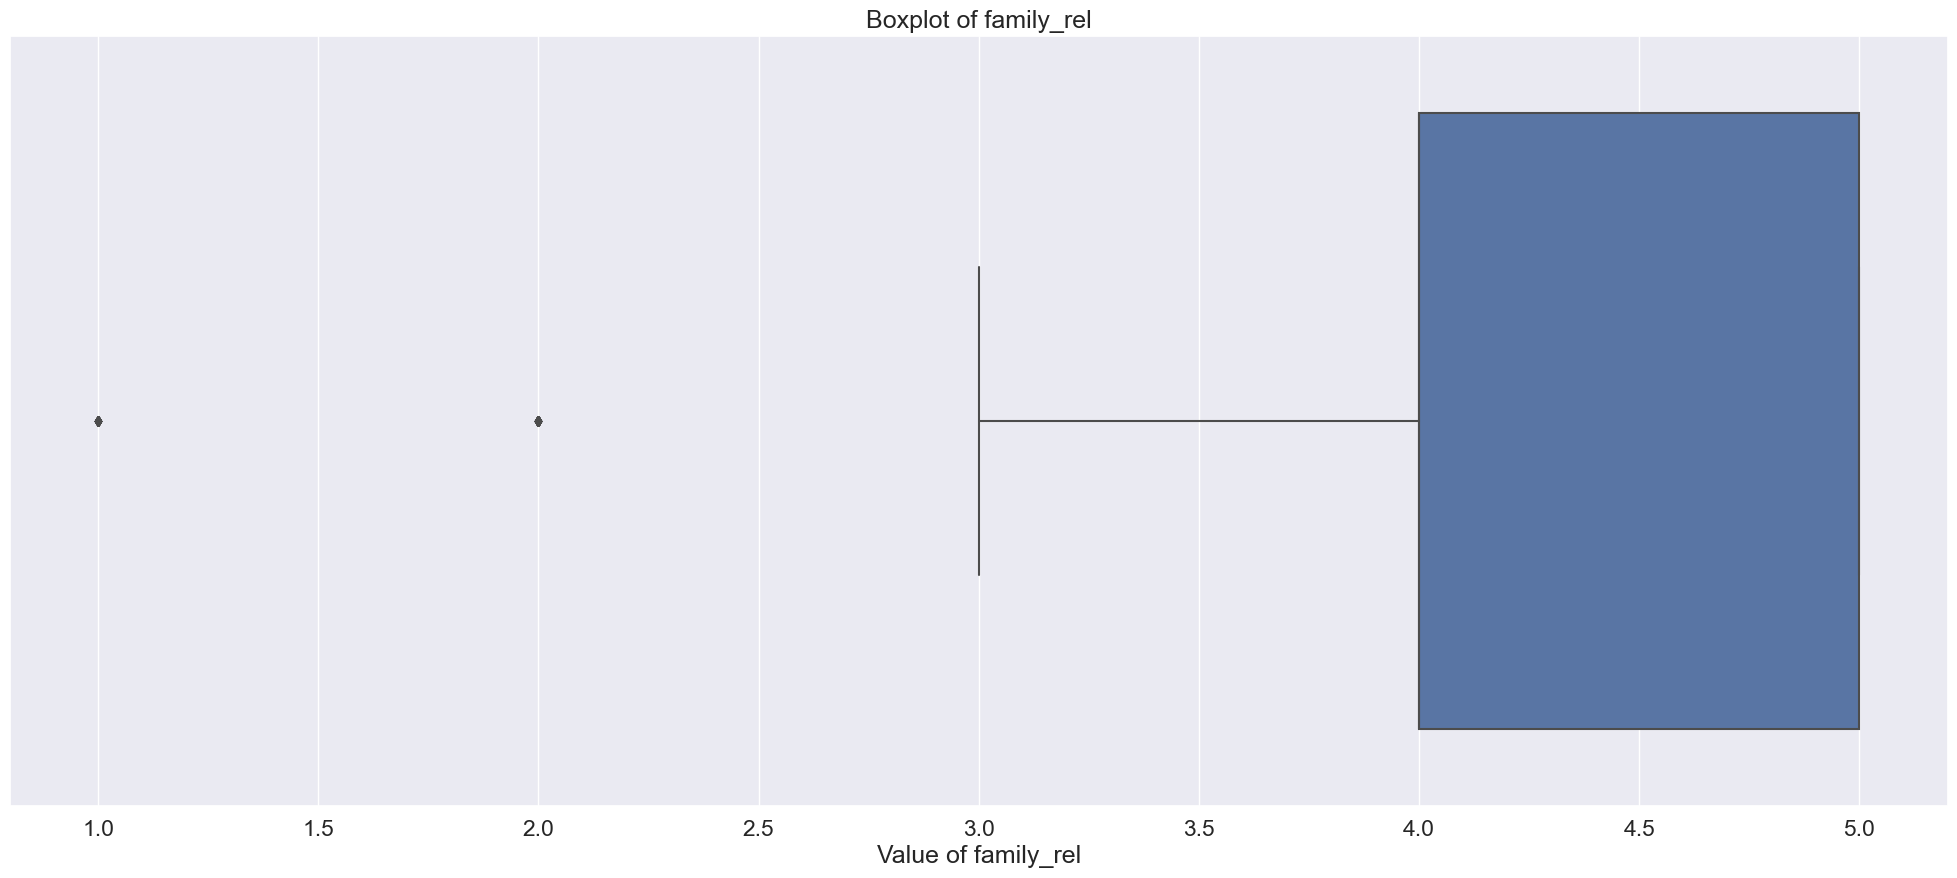

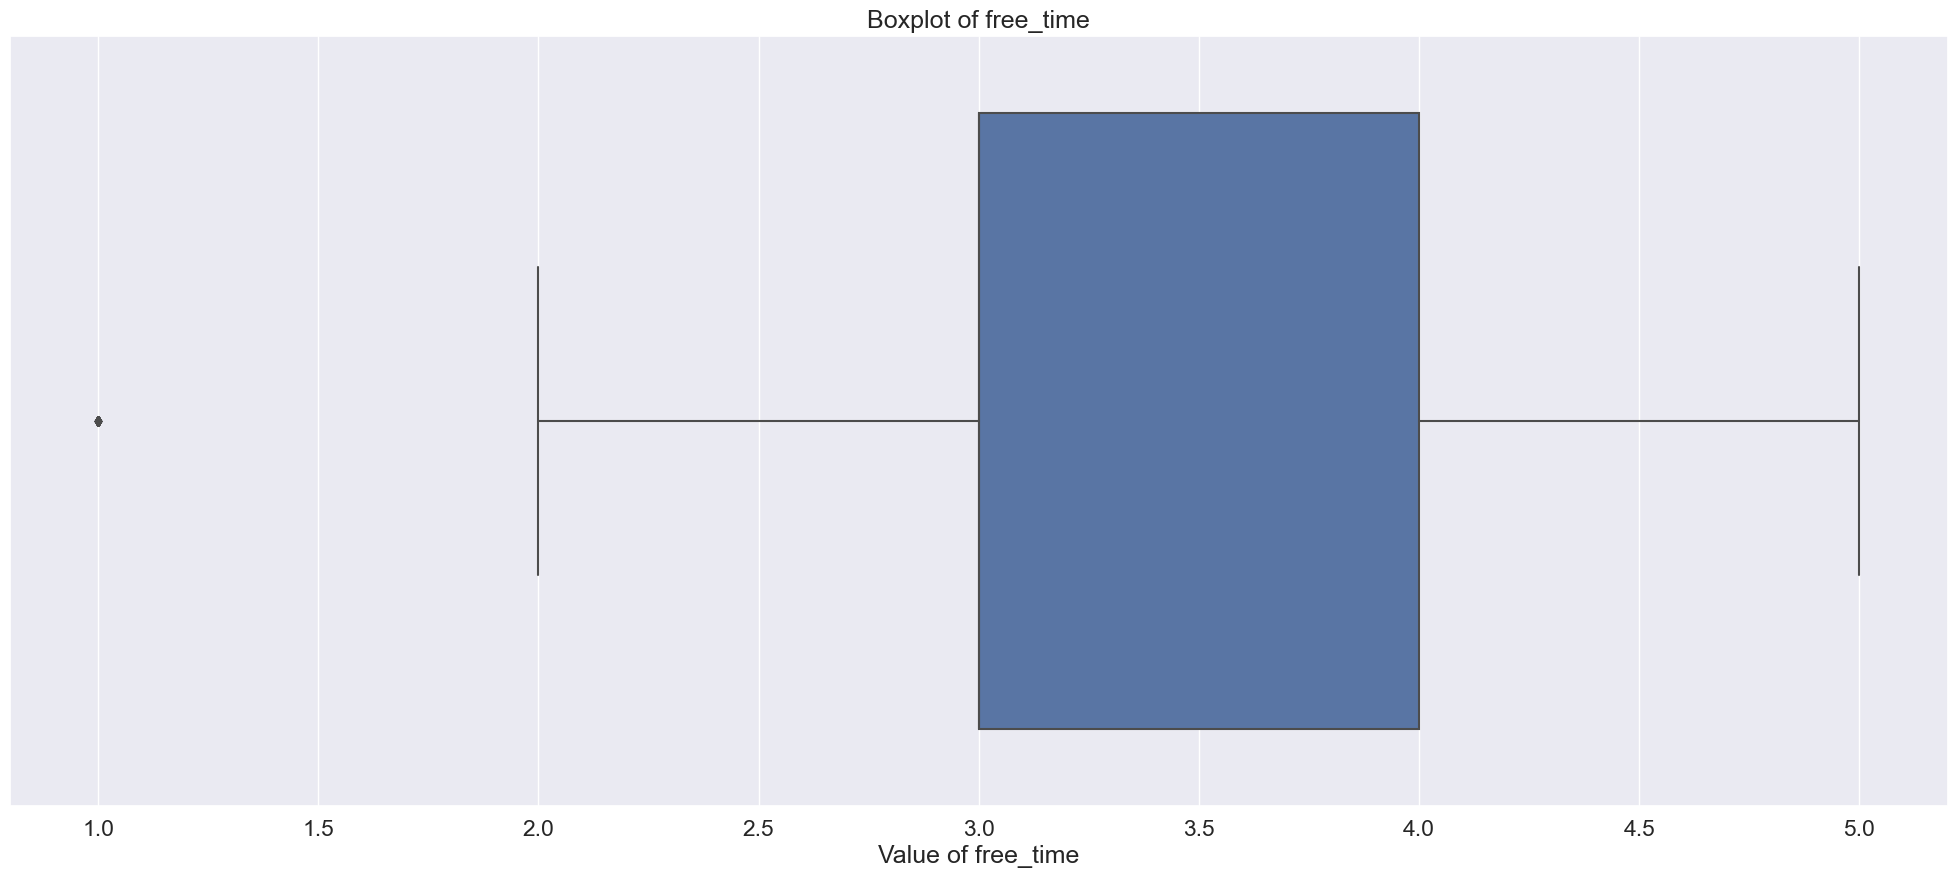

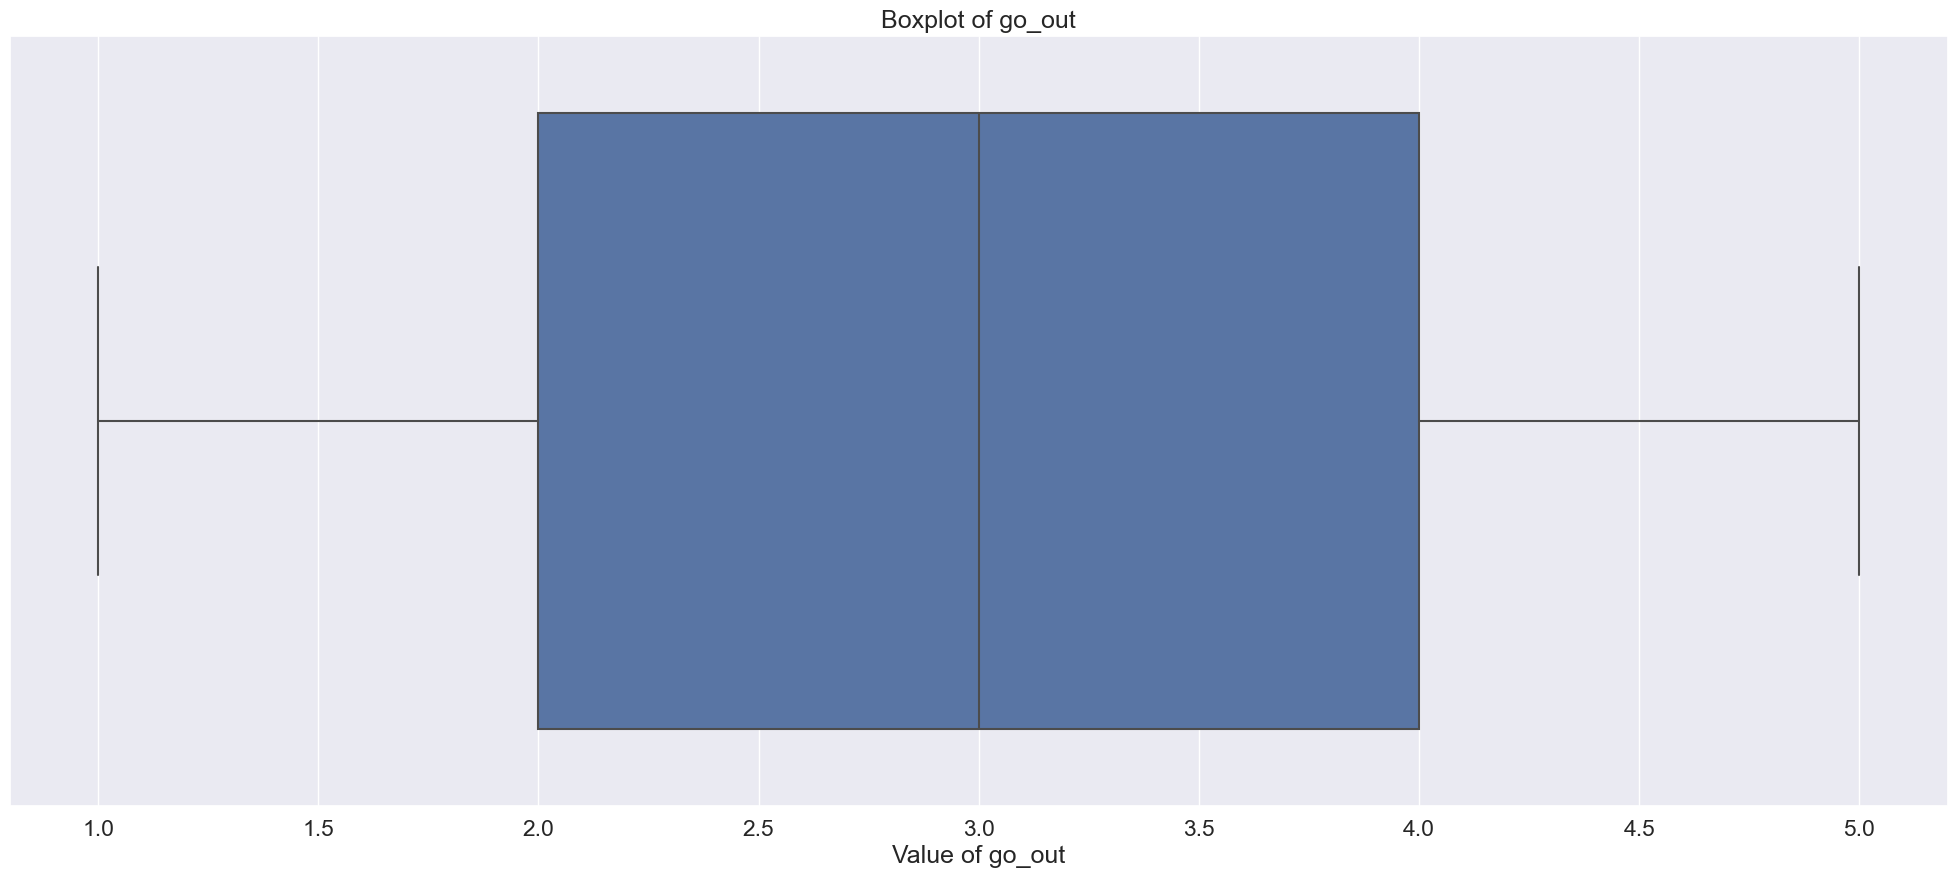

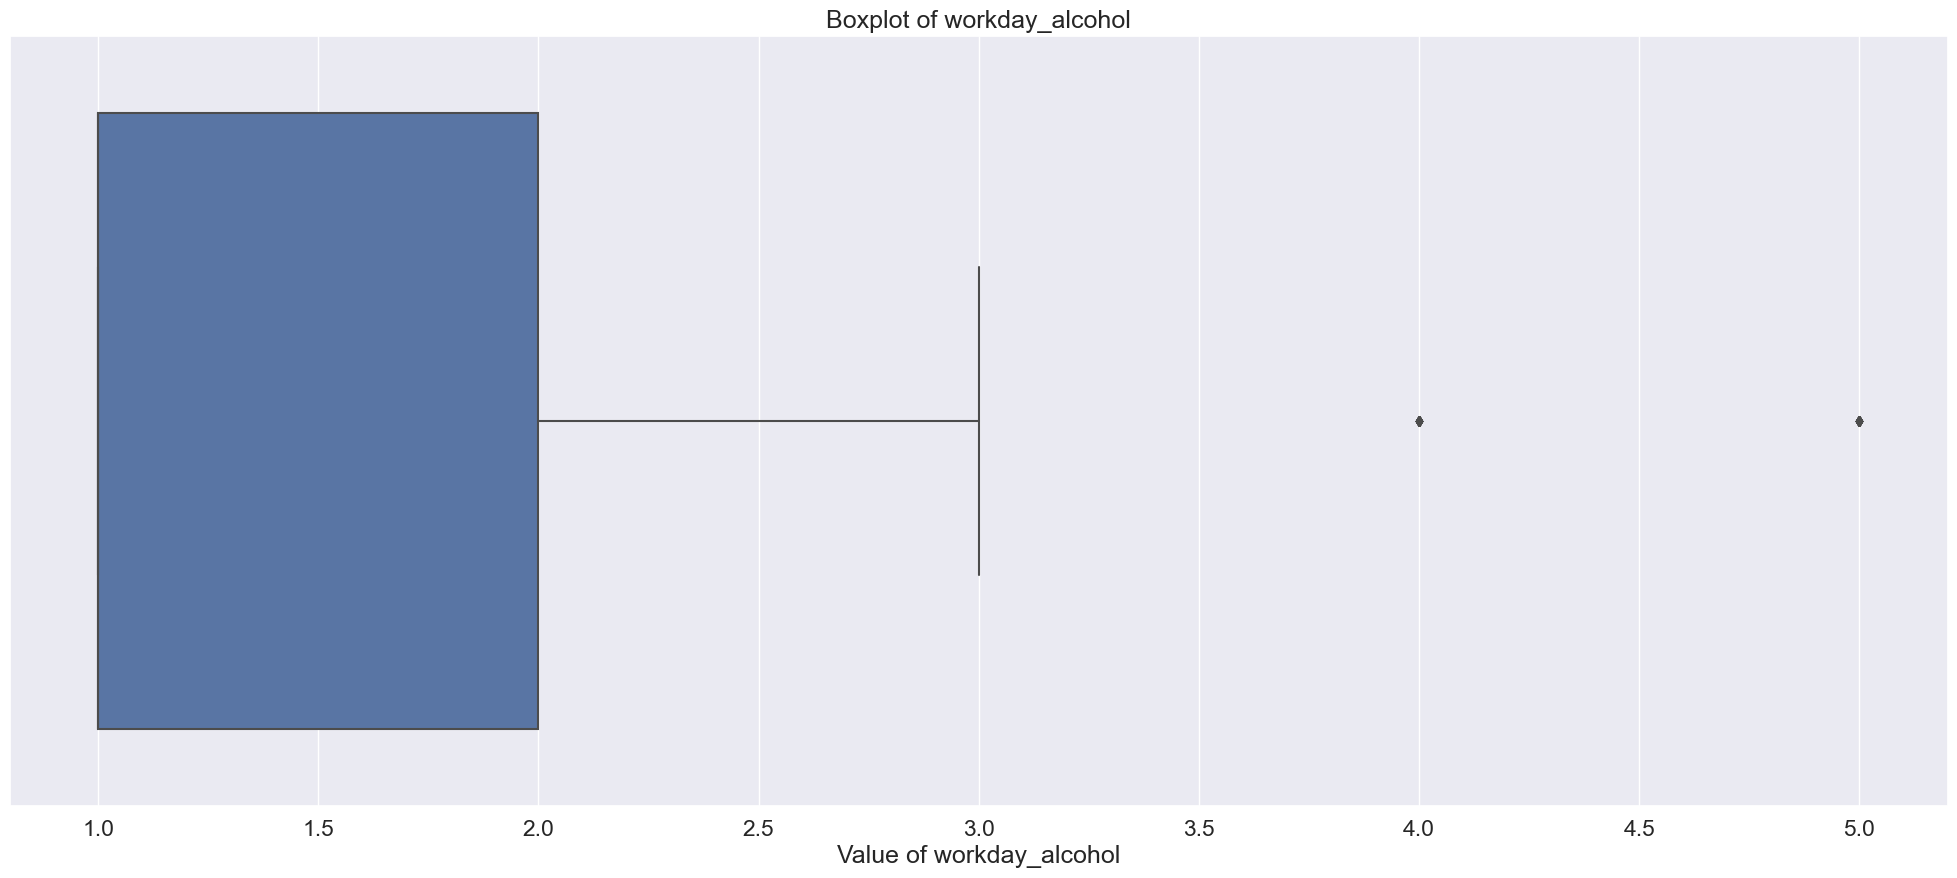

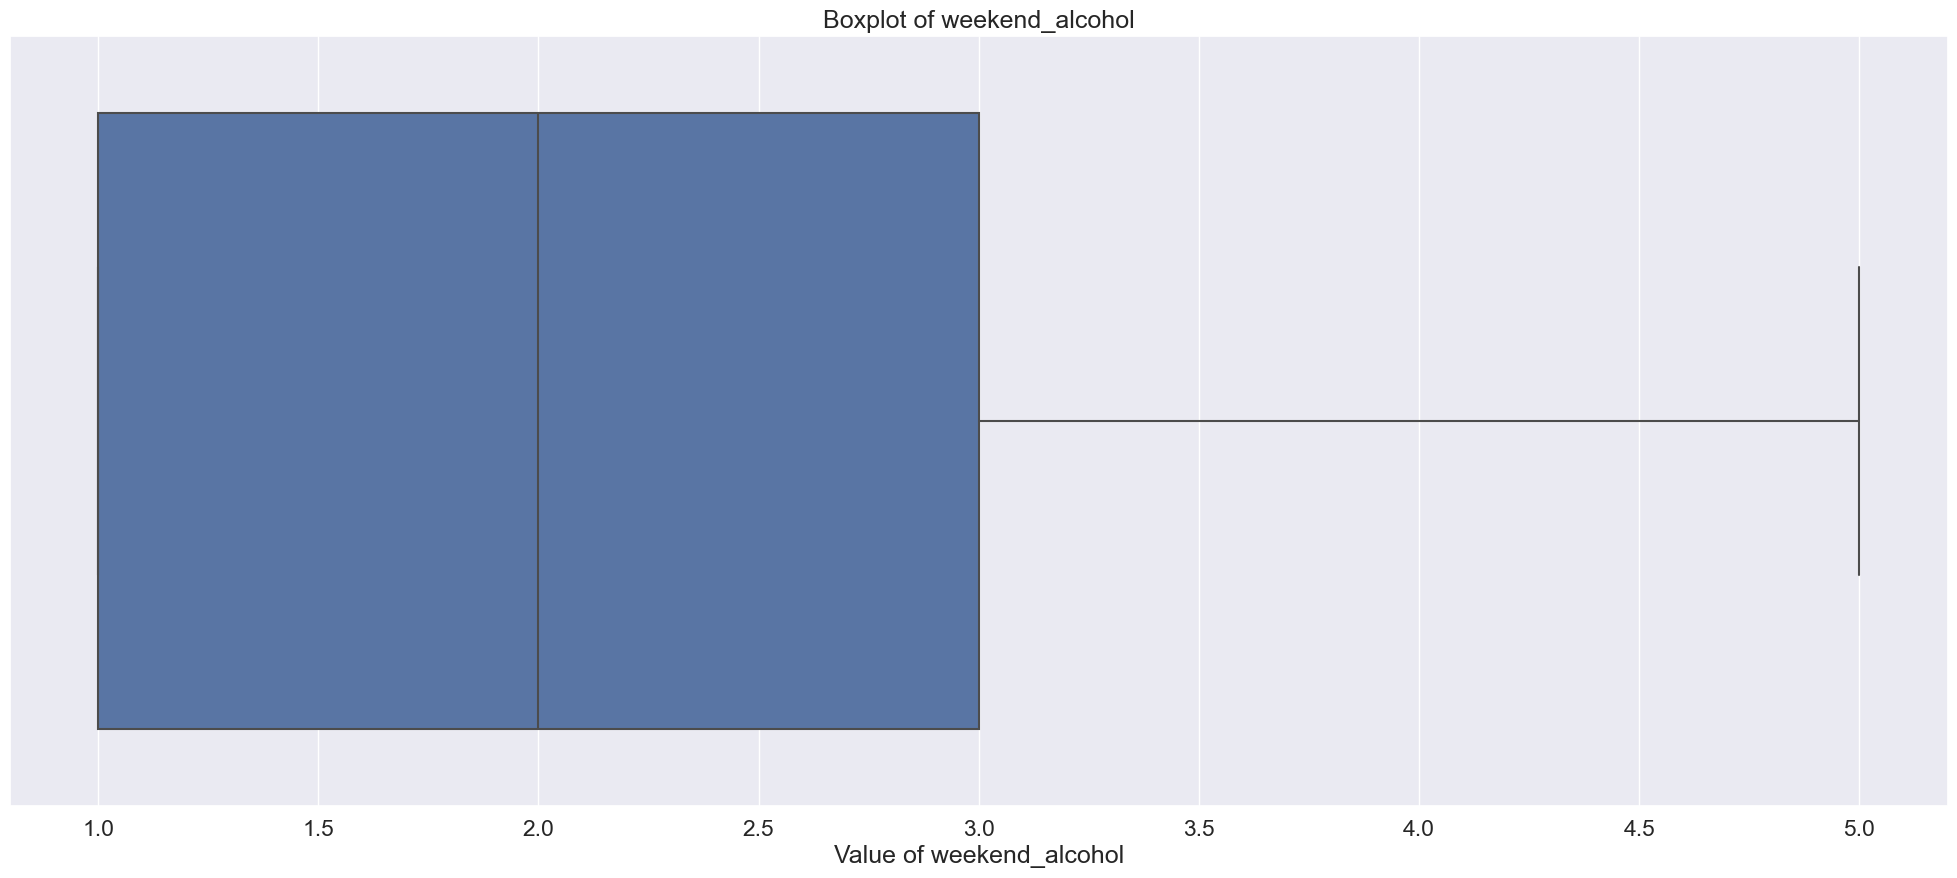

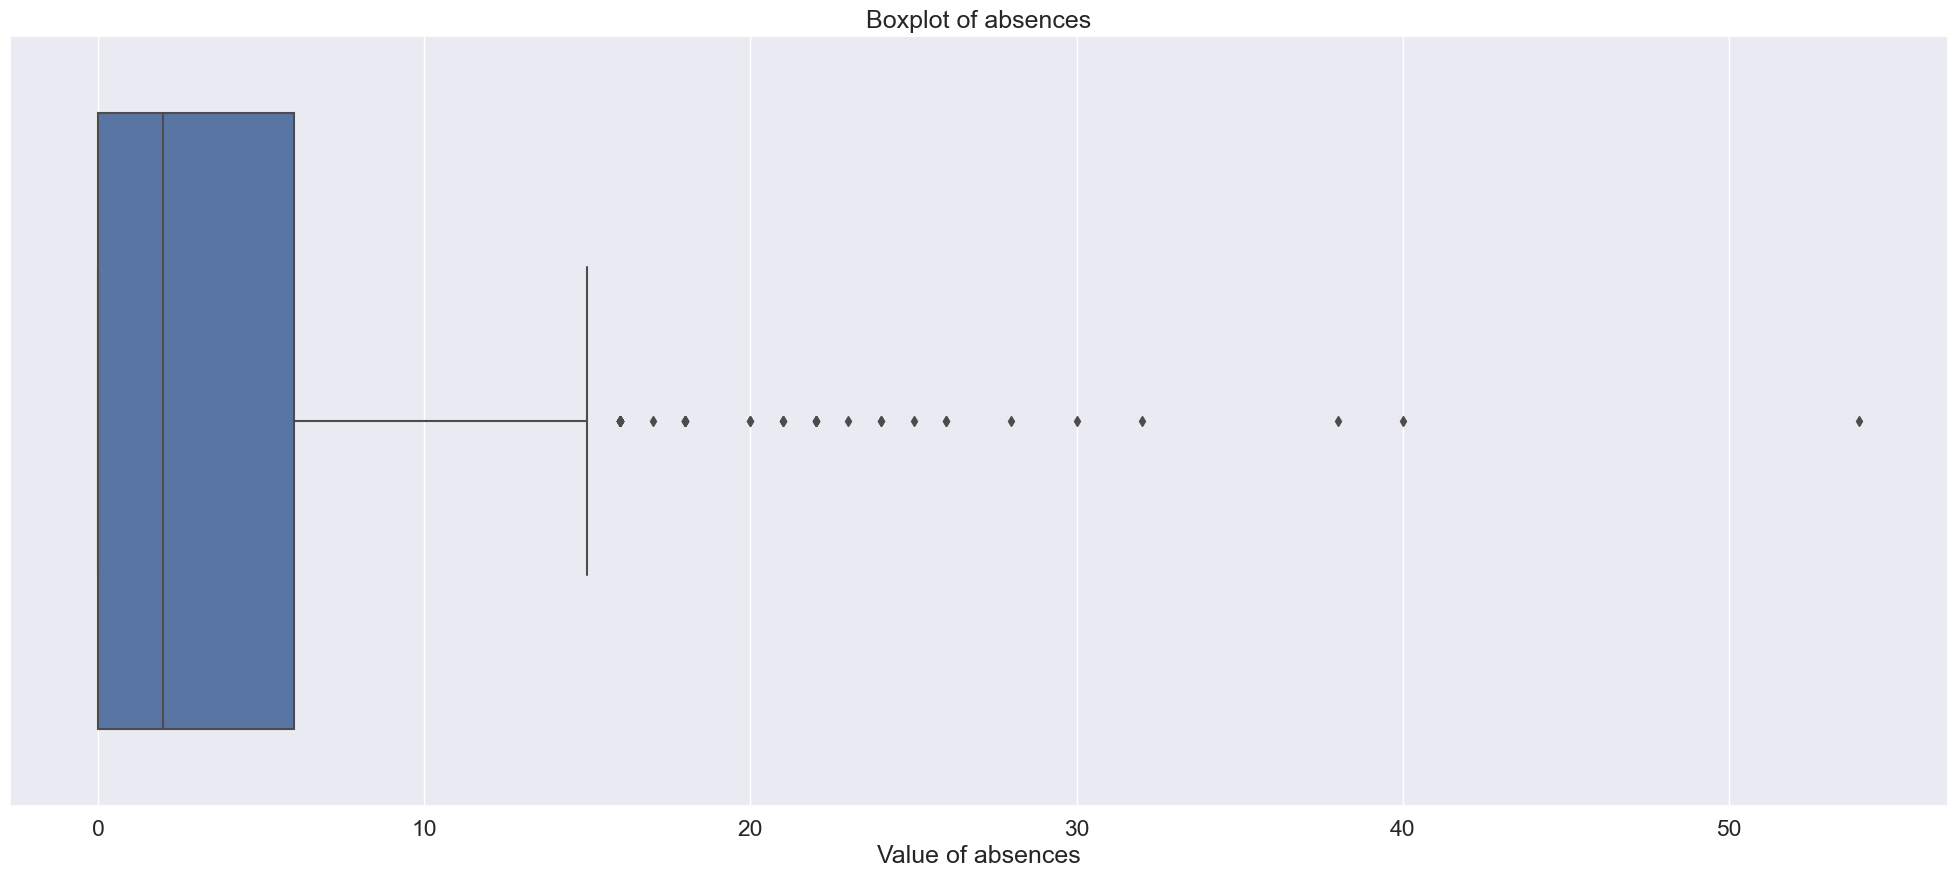

In [129]:
# Create boxchart for numeric data
for metric in numeric_data:
    plt.figure(figsize=(25,10))
    sns.boxplot(x=df[metric])
    plt.title(f'Boxplot of {metric}')
    plt.xlabel(f'Value of {metric}')
    plt.show()

<Axes: >

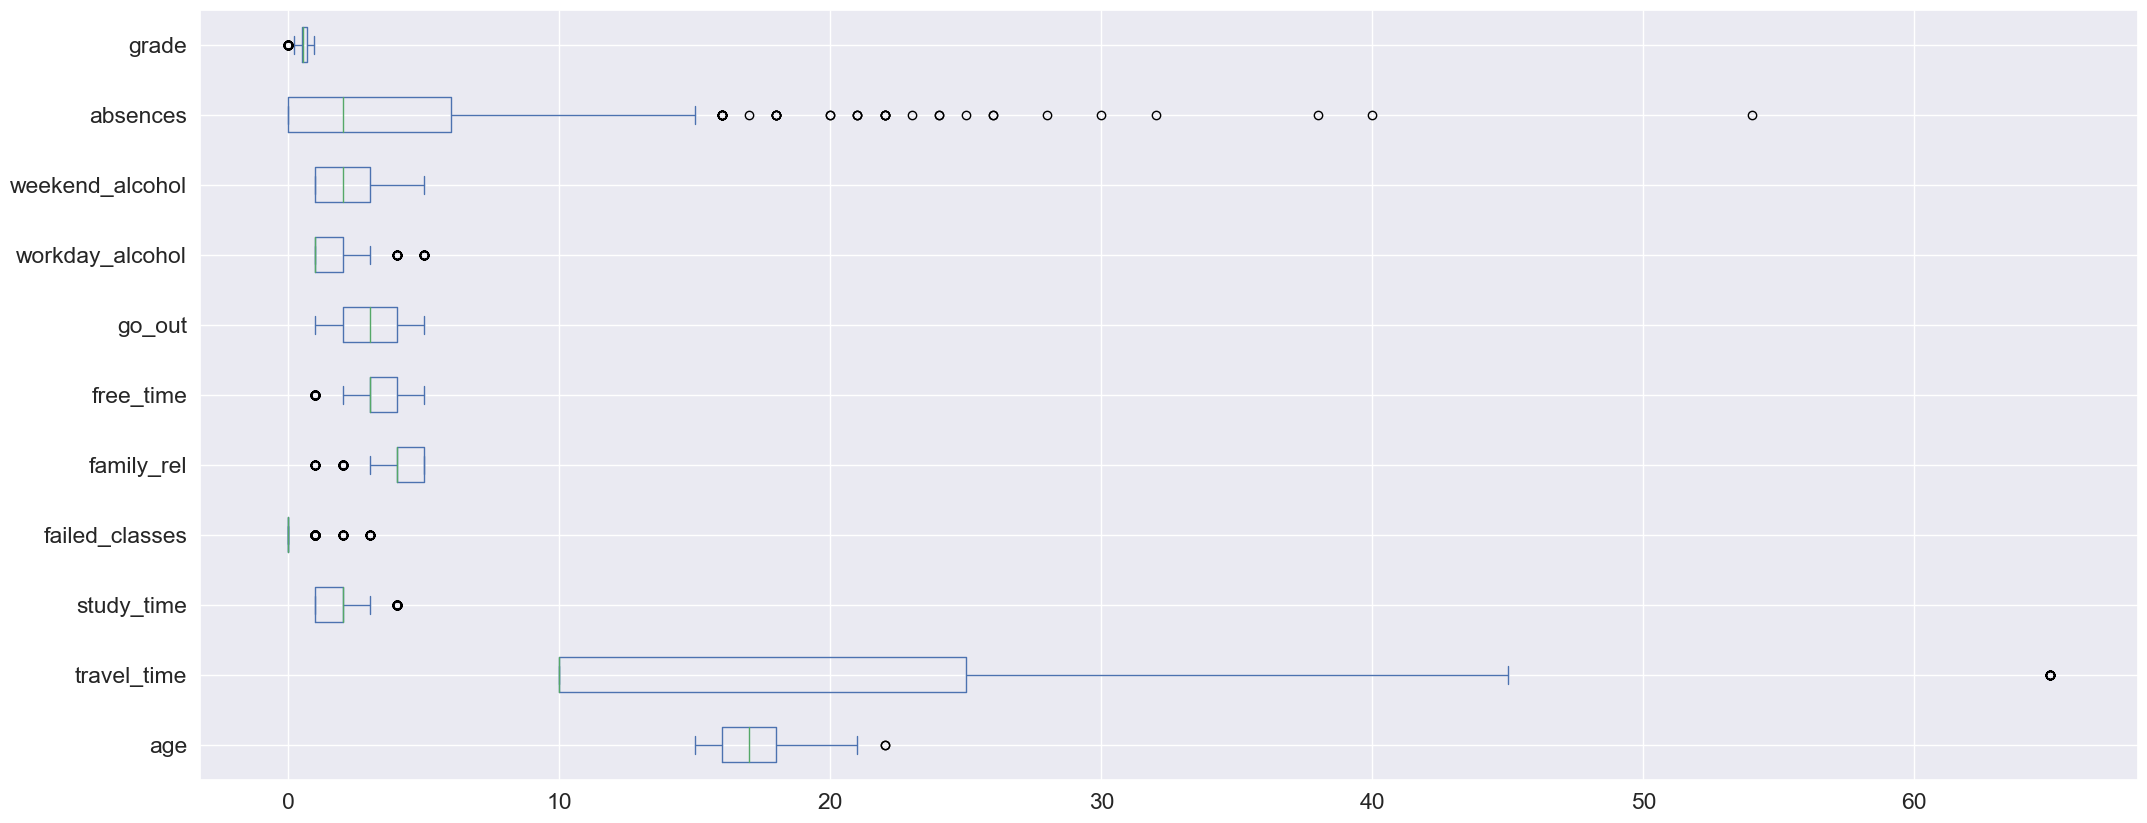

In [130]:
# Box plot for all the features after removing outlier
df.iloc[:,:].plot(kind='box',figsize=(25,10),vert=False)

## 2.1. Preprocess data

### 2.1.1 Encode data

In [131]:
class Dataloader:
    def __init__(self):
        self.binarizer = LabelBinarizer()
        self.normeliser = StandardScaler()

    def encode_data(self, dataframe):
        """
            Encode binary categorical features and one-hot encode multi-categorical features
        """
        feat_categorical = dataframe.select_dtypes(include = ['object'])
        for feat in feat_categorical.columns:
            if dataframe[feat].nunique() == 2:
                dataframe[feat] = self.binarizer.fit_transform(dataframe[feat])
        
        for feat in feat_categorical.columns:
            if dataframe[feat].nunique() > 2:
                feat_dummies = pd.get_dummies(dataframe[feat], drop_first=True, prefix=feat)
                dataframe = pd.concat([dataframe.drop(feat, axis = 1), feat_dummies], axis=1)
        return dataframe
    
    def get_label(self, dataframe):
        label = dataframe['grade']
        return label

    def normalize_data(self, x_train, x_test, y_train, y_test):
        x_train = self.normeliser.fit_transform(x_train)
        x_test = self.normeliser.fit_transform(x_test)
        return x_train, x_test, y_train, y_test

    def process(self, dataframe):
        data_encoded = self.encode_data(dataframe)
        label = self.get_label(dataframe)
        x_train, x_test, y_train, y_test = train_test_split(data_encoded, label, test_size=0.20, random_state=123, shuffle=False)
        x_train, x_test, y_train, y_test = self.normalize_data(x_train, x_test, y_train, y_test)
        return x_train, x_test, y_train, y_test

In [132]:
dataloader = Dataloader()
x_train, x_test, y_train, y_test = dataloader.process(df)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(668, 30) (167, 30) (668,) (167,)


## 2.2. Define model

### 2.2.1. Model

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor


model_dict = {
    'Linear Regression' : LinearRegression(),
    'SVM' : SVR(kernel='rbf', C=1),
    'RandromForest': RandomForestRegressor(n_estimators=100),
    'GradientBoost': GradientBoostingRegressor(n_estimators=100),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
}

### 2.2.2. Metrics

## 2.3. Train model

In [134]:
class Trainer:
    def __init__(self, model):
        self.model = model

    def train(self, x_train, y_train):
        self.model.fit(x_train, y_train.ravel())
        y_pred = self.model.predict(x_train)
        rmse = self.evaluate(y_train.ravel(), y_pred)
        return rmse

    def train_kfold(self, x_train, y_train, n_splits=5):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=456)
        rmse_scores = []

        for train_index, valid_index in kf.split(x_train):
            x_fold_train, x_fold_valid = x_train[train_index], x_train[valid_index]
            y_fold_train, y_fold_valid = y_train[train_index], y_train[valid_index]

            self.model.fit(x_fold_train, y_fold_train.ravel())
            y_fold_valid_pred = self.model.predict(x_fold_valid)
            rmse = self.evaluate(y_fold_valid.ravel(), y_fold_valid_pred)
            rmse_scores.append(rmse)

        RMSE_mean = np.mean(rmse_scores)
        return RMSE_mean

    def evaluate(self, y_label, y_pred):
        rmse = np.sqrt(mean_squared_error(y_label, y_pred))
        return rmse

In [135]:
class Tester:
    def __init__(self, model):
        self.model = model

    def test(self, x_test, y_test):
        y_test_pred = self.model.predict(x_test)
        rmse = self.evaluate(y_test.ravel(), y_test_pred)
        return rmse
    
    def evaluate(self, y_label, y_pred):
        rmse = np.sqrt(mean_squared_error(y_label, y_pred))
        return rmse
    
    def get_result(self, rmse):
        result = pd.DataFrame(index=['RMSE'], columns=['Test'])
        result['Test'] = [rmse]
        return result

In [148]:
log = {}
for model_name, model in model_dict.items():
    trainer = Trainer(model)
    rmse = trainer.train(x_train, y_train)
    rmse_mean = trainer.train_kfold(x_train, y_train)
    log[model_name] = {
        "1_fold": rmse,
        "k_folds": rmse,
    }
    print(f"Model (Train): {model_name}, RMSE: {rmse}, RMSE_mean: {rmse_mean}")
    
    # test
    tester = Tester(model)
    rmse = tester.test(x_test, y_test)
    print(f"Model (Test): {model_name}, RMSE: {rmse}")
    print()


Model (Train): Linear Regression, RMSE: 2.5031671643343426e-16, RMSE_mean: 3.3552990126340203e-16
Model (Test): Linear Regression, RMSE: 0.0038088735257038983

Model (Train): SVM, RMSE: 0.05808633278427397, RMSE_mean: 0.08819451238706054
Model (Test): SVM, RMSE: 0.07591295850971642

Model (Train): RandromForest, RMSE: 0.0009688254509925509, RMSE_mean: 0.002159591815112476
Model (Test): RandromForest, RMSE: 0.0015649606373347074

Model (Train): GradientBoost, RMSE: 8.615839315821616e-06, RMSE_mean: 0.0009323375841996349
Model (Test): GradientBoost, RMSE: 0.0022005043347921335

Model (Train): Lasso, RMSE: 0.19890889308929596, RMSE_mean: 0.19933777405042902
Model (Test): Lasso, RMSE: 0.2026196457200606

Model (Train): Ridge, RMSE: 0.0003358606569903545, RMSE_mean: 0.00046031166179751667
Model (Test): Ridge, RMSE: 0.004165565433388174

Model (Train): ElasticNet, RMSE: 0.19890889308929596, RMSE_mean: 0.19933777405042902
Model (Test): ElasticNet, RMSE: 0.2026196457200606



# Conclusion

Linear Regression is selected as the model for this dataset